<a href="https://colab.research.google.com/github/ivansudibyo14/GROUP_FINAL_PROJECT/blob/main/intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd                     #to perform advanced data analysis, import data quickly
import numpy as np                      #to perform arge mahematical operations and statistical operation
import matplotlib.pyplot as plt         # to perform simple interactive visualization
from datetime import datetime           #to perform manipulating dates and times
import seaborn as sb                  #to perform visualization with many color palettes, beatifull style and many statistical plots


In [ ]:
# import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/18wSQZDaAzDHQANzFq7oaMvoEGDMfez4pXXzZ8DbAHwg/edit#gid=1913172111'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
df1 = pd.read_csv(sheet_url_trf) #define df to read csv
pd.set_option('display.max.columns',None) #to display all column, not separate)
df1.head() #only show first of 5 rows (not based on shorting etc)

user_id registration_import_datetime user_gender  user_age user_occupation  \
0   162882          2021-09-17 14:10:44      Female        51          Swasta   
1  3485491          2021-10-09 11:11:34      Female        55          Others   
2  1071649           2021-10-08 1:27:30        Male        50          Swasta   
3  3816789           2021-08-12 7:19:32      Female        53             IRT   
4  3802293           2021-08-15 9:31:24      Female        47             PNS   

          user_income_range referral_code_used user_income_source  
0  > Rp 500 Juta - 1 Miliar                NaN               Gaji  
1   > Rp 50 Juta - 100 Juta                NaN               Gaji  
2      Rp 10 Juta - 50 Juta                NaN               Gaji  
3   > Rp 50 Juta - 100 Juta                NaN               Gaji  
4  > Rp 500 Juta - 1 Miliar      used referral               Gaji

In [ ]:
df_user = df1.copy() #make a copy dataframe so the original dataframe didnt change if we manipulate data in the future
df_user.info() #show data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


In [ ]:
# Check number of NaN Value in each column
df_user.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
dtype: int64

In [ ]:
# check number of duplicated data
df_user.duplicated().sum()

0

In [ ]:
# drop duplicated value
df_user.drop_duplicates(inplace=True)

In [ ]:
df_user.info() #show data information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.0+ MB


In [ ]:
#Convert String to Datetime
df_user['registration_import_datetime'] = pd.to_datetime(df_user['registration_import_datetime'])

# Convert Integer value to string
df_user['user_id'] = df_user['user_id'].astype(str)



# Check data information
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
del df_user['referral_code_used'] #sudah di run; referral_code_used column has been erased to simplify raw data

df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14712 entries, 0 to 14711
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 919.5+ KB


In [ ]:
Total_User = df_user.groupby(['user_gender'])['user_id'].count().reset_index()
Total_User

user_gender  user_id
0      Female     5735
1        Male     8977

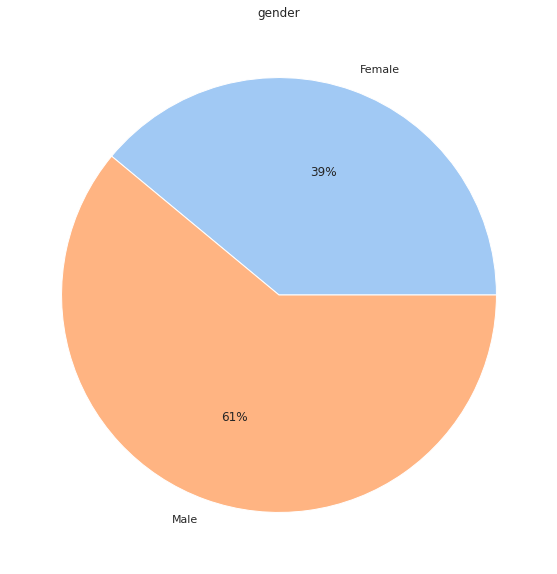

In [ ]:
data = Total_User['user_id']
keys = Total_User['user_gender']

colors = sb.color_palette('pastel')[0:5]
sb.set(rc={"figure.figsize":(20, 10)}) #width=20, height=10

plt.pie(data, labels = keys, colors = colors, autopct='%.0f%%')
plt.title('gender')
plt.show()

In [ ]:
Total_User1 = df_user.groupby(['user_occupation'])['user_id'].count().reset_index()
Total_User1


user_occupation  user_id
0            Guru      106
1             IRT      934
2          Others     1683
3             PNS      191
4         Pelajar     7887
5       Pengusaha      598
6       Pensiunan        5
7          Swasta     3263
8      TNI/Polisi       45

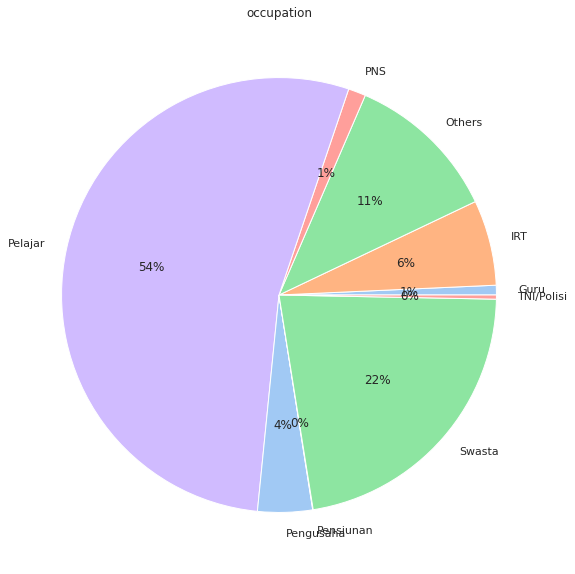

In [ ]:
data = Total_User1['user_id']
keys = Total_User1['user_occupation']

colors = sb.color_palette('pastel')[0:5]
sb.set(rc={"figure.figsize":(20, 10)}) #width=20, height=10

plt.pie(data, labels = keys, colors = colors, autopct='%.0f%%')
plt.title('occupation')
plt.show()

In [ ]:
Total_User2 = df_user.groupby(['user_income_range'])['user_id'].count().reset_index()
Total_User2

user_income_range  user_id
0                 < 10 Juta     6275
1             > Rp 1 Miliar       27
2  > Rp 100 Juta - 500 Juta     1114
3   > Rp 50 Juta - 100 Juta     2390
4  > Rp 500 Juta - 1 Miliar       90
5      Rp 10 Juta - 50 Juta     4816

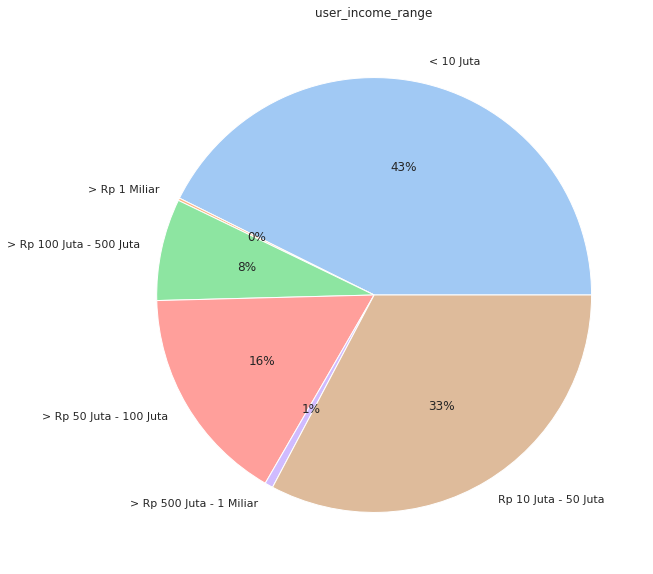

In [ ]:
data = Total_User2['user_id']
keys = Total_User2['user_income_range']

colors = sb.color_palette('pastel')[0:7]
sb.set(rc={"figure.figsize":(20, 10)}) #width=20, height=10

plt.pie(data, labels = keys, colors = colors, autopct='%.0f%%')
plt.title('user_income_range')
plt.show()


In [ ]:
Total_User3 = df_user.groupby(['user_income_source'])['user_id'].count().reset_index()
Total_User3


user_income_source  user_id
0         Bunga Simpanan       24
1  Dari Orang Tua / Anak     1307
2     Dari Suami / istri      300
3                   Gaji     9131
4        Hasil Investasi      165
5      Keuntungan Bisnis     1908
6                Lainnya      414
7               Tabungan      419
8                 Undian     1001
9                Warisan       43

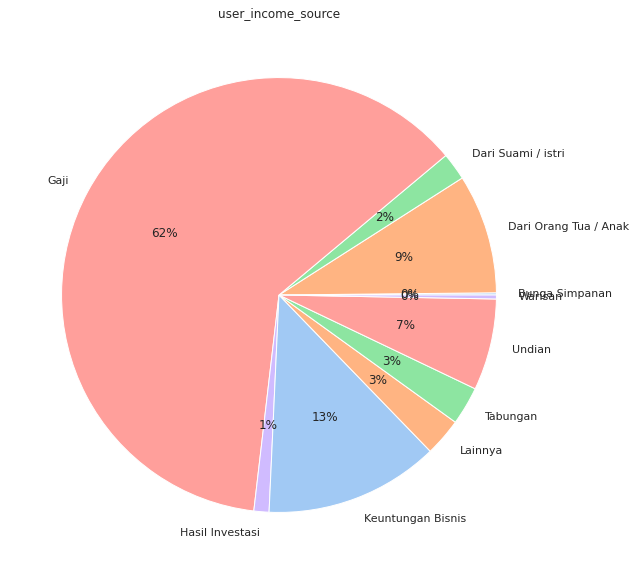

In [ ]:
data = Total_User3['user_id']
keys = Total_User3['user_income_source']

colors = sb.color_palette('pastel')[0:5]
sb.set(rc={"figure.figsize":(20, 10)}) #width=20, height=10

plt.pie(data, labels = keys, colors = colors, autopct='%.0f%%')
plt.title('user_income_source')
plt.show()

In [ ]:
# import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1ia4uIiE7rP-vos9WM2lMD0wUmjzgFzcfhRHxxy1i6jY/edit#gid=1557567935' 
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
df = pd.read_csv(sheet_url_trf) #define df to read csv
pd.set_option('display.max.columns',None) #to display all column, not separate)
df.head() #only show first of 5 rows (not based on shorting etc)

user_id       date      unique_value  Saham_AUM  Saham_transaction_amount  \
0    50701  30-Aug-21  50701 30-08-2021        NaN                       NaN   
1    50701  31-Aug-21  50701 31-08-2021        NaN                       NaN   
2    50701   1-Sep-21  50701 01-09-2021        NaN                       NaN   
3    50701   2-Sep-21  50701 02-09-2021        NaN                       NaN   
4    50701   3-Sep-21  50701 03-09-2021        NaN                       NaN   

   Pasar_Uang_AUM  Pasar_Uang_invested_amount  Pasar_Uang_transaction_amount  \
0             NaN                         NaN                            NaN   
1             NaN                         NaN                            NaN   
2             NaN                         NaN                            NaN   
3             NaN                         NaN                            NaN   
4             NaN                         NaN                            NaN   

   Pendapatan_Tetap_AUM  Pendapatan_Tetap_invested_amount  \
0                   NaN                               NaN   
1                   NaN                               NaN   
2                   NaN                               NaN   
3                   NaN                               NaN   
4                   NaN                               NaN   

   Saham_invested_amount  Pendapatan_Tetap_transaction_amount  Campuran_AUM  \
0                    NaN                                  NaN    10132277.0   
1                    NaN                                  NaN    10206945.0   
2                    NaN                                  NaN     9956556.0   
3                    NaN                                  NaN     9914858.0   
4                    NaN                                  NaN    10016360.0   

   Campuran_invested_amount  Campuran_transaction_amount  
0                10000000.0                          NaN  
1                10000000.0                          0.0  
2                10000000.0                          0.0  
3                10000000.0                          0.0  
4                10000000.0                          0.0

In [ ]:
df_ok = df.copy() #make a copy dataframe so the original dataframe didnt change if we manipulate data in the future
df_ok.info() #show data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   unique_value                         158811 non-null  object 
 3   Saham_AUM                            106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Saham_invested_amount                106292 non-null  float64
 11  Pendapatan_Te

In [ ]:
# Chek number of NaN Value
df_ok.isna().sum()

user_id                                     0
date                                        0
unique_value                                0
Saham_AUM                               52519
Saham_transaction_amount                57972
Pasar_Uang_AUM                          27730
Pasar_Uang_invested_amount              27730
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_AUM                    52865
Pendapatan_Tetap_invested_amount        52865
Saham_invested_amount                   52519
Pendapatan_Tetap_transaction_amount     58314
Campuran_AUM                           153459
Campuran_invested_amount               153459
Campuran_transaction_amount            153694
dtype: int64

In [ ]:
#Convert String to Datetime
df_ok['date'] = pd.to_datetime(df_ok['date'])
# Convert Integer value to string
df_ok['user_id'] = df_ok['user_id'].astype(str)
df_ok.info() #show data information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date                                 158811 non-null  datetime64[ns]
 2   unique_value                         158811 non-null  object        
 3   Saham_AUM                            106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

In [ ]:
df_ok.fillna(0)

user_id       date        unique_value  Saham_AUM  \
0         50701 2021-08-30    50701 30-08-2021        0.0   
1         50701 2021-08-31    50701 31-08-2021        0.0   
2         50701 2021-09-01    50701 01-09-2021        0.0   
3         50701 2021-09-02    50701 02-09-2021        0.0   
4         50701 2021-09-03    50701 03-09-2021        0.0   
...         ...        ...                 ...        ...   
158806  4165020 2021-09-30  4165020 30-09-2021        0.0   
158807  4165132 2021-09-30  4165132 30-09-2021        0.0   
158808  4165630 2021-09-30  4165630 30-09-2021    41625.0   
158809  4165704 2021-09-30  4165704 30-09-2021        0.0   
158810  4165830 2021-09-30  4165830 30-09-2021        0.0   

        Saham_transaction_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0                            0.0             0.0                         0.0   
1                            0.0             0.0                         0.0   
2                            0.0             0.0                         0.0   
3                            0.0             0.0                         0.0   
4                            0.0             0.0                         0.0   
...                          ...             ...                         ...   
158806                       0.0             0.0                         0.0   
158807                       0.0         10001.0                     10000.0   
158808                       0.0         10001.0                     10000.0   
158809                       0.0             0.0                         0.0   
158810                       0.0         10001.0                     10000.0   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 0.0                   0.0   
1                                 0.0                   0.0   
2                                 0.0                   0.0   
3                                 0.0                   0.0   
4                                 0.0                   0.0   
...                               ...                   ...   
158806                            0.0                   0.0   
158807                            0.0                   0.0   
158808                            0.0               49869.0   
158809                            0.0                9987.0   
158810                            0.0                   0.0   

        Pendapatan_Tetap_invested_amount  Saham_invested_amount  \
0                                    0.0                    0.0   
1                                    0.0                    0.0   
2                                    0.0                    0.0   
3                                    0.0                    0.0   
4                                    0.0                    0.0   
...                                  ...                    ...   
158806                               0.0                    0.0   
158807                               0.0                    0.0   
158808                           50000.0                40000.0   
158809                           10000.0                    0.0   
158810                               0.0                    0.0   

        Pendapatan_Tetap_transaction_amount  Campuran_AUM  \
0                                       0.0    10132277.0   
1                                       0.0    10206945.0   
2                                       0.0     9956556.0   
3                                       0.0     9914858.0   
4                                       0.0    10016360.0   
...                                     ...           ...   
158806                                  0.0           0.0   
158807                                  0.0           0.0   
158808                                  0.0           0.0   
158809                                  0.0           0.0   
158810                                  0.0           0.0   

        Campuran_in

In [ ]:
df_ok.info() #show data information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date                                 158811 non-null  datetime64[ns]
 2   unique_value                         158811 non-null  object        
 3   Saham_AUM                            106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

In [ ]:
# check number of duplicated data
df_ok.duplicated().sum()

0

In [ ]:
# Joining data
merge_1 = df_user.merge(df_ok, how = 'inner', on='user_id')
merge_1.fillna(0, inplace=True)

In [ ]:
merge_1.round(2)
merge_1.info()
merge_1.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   registration_import_datetime         158811 non-null  datetime64[ns]
 2   user_gender                          158811 non-null  object        
 3   user_age                             158811 non-null  int64         
 4   user_occupation                      158811 non-null  object        
 5   user_income_range                    158811 non-null  object        
 6   user_income_source                   158811 non-null  object        
 7   date                                 158811 non-null  datetime64[ns]
 8   unique_value                         158811 non-null  object        
 9   Saham_AUM                            158811 non-null  float64       
 

user_age    Saham_AUM  Saham_transaction_amount  Pasar_Uang_AUM  \
count  158811.00    158811.00                 158811.00    1.588110e+05   
mean       27.20    297497.81                   7110.49    6.955849e+05   
std         8.58   1770372.24                 271019.99    1.284331e+07   
min        17.00         0.00              -11766799.00    0.000000e+00   
25%        21.00         0.00                      0.00    0.000000e+00   
50%        25.00     10083.00                      0.00    1.001900e+04   
75%        31.00    100506.00                      0.00    1.001110e+05   
max        83.00  64454332.00               50000000.00    1.016171e+09   

       Pasar_Uang_invested_amount  Pasar_Uang_transaction_amount  \
count                1.588110e+05                   1.588110e+05   
mean                 6.940755e+05                   1.705964e+04   
std                  1.281471e+07                   1.301468e+06   
min                  0.000000e+00                  -1.850000e+08   
25%                  0.000000e+00                   0.000000e+00   
50%                  1.000000e+04                   0.000000e+00   
75%                  1.000000e+05                   0.000000e+00   
max                  1.012200e+09                   2.892000e+08   

       Pendapatan_Tetap_AUM  Pendapatan_Tetap_invested_amount  \
count          1.588110e+05                      1.588110e+05   
mean           1.193030e+06                      1.189113e+06   
std            1.921726e+07                      1.913287e+07   
min            0.000000e+00                      0.000000e+00   
25%            0.000000e+00                      0.000000e+00   
50%            2.501700e+04                      2.500000e+04   
75%            1.101590e+05                      1.100000e+05   
max            9.797670e+08                      9.700000e+08   

       Saham_invested_amount  Pendapatan_Tetap_transaction_amount  \
count              158811.00                         1.588110e+05   
mean               296057.59                         3.640097e+04   
std               1759649.37                         2.346995e+06   
min                     0.00                        -9.271240e+07   
25%                     0.00                         0.000000e+00   
50%                 10000.00                         0.000000e+00   
75%                100000.00                         0.000000e+00   
max              61840000.00                         4.000000e+08   

       Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  
count  1.588110e+05              1.588110e+05                    158811.00  
mean   2.532126e+05              2.632041e+05                      2227.48  
std    4.573587e+06              4.815056e+06                    289253.59  
min    0.000000e+00              0.000000e+00                 -50000000.00  
25%    0.000000e+00              0.000000e+00                         0.00  
50%    0.000000e+00              0.000000e+00                         0.00  
75%    0.000000e+00              0.000000e+00                         0.00  
max    2.878238e+08              3.000000e+08                  50000000.00

In [ ]:
merge_1['week'] = merge_1['date'].dt.week
merge_1['month'] = merge_1['date'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
merge_1

user_id registration_import_datetime user_gender  user_age  \
0       3816789          2021-08-12 07:19:32      Female        53   
1       3816789          2021-08-12 07:19:32      Female        53   
2       3816789          2021-08-12 07:19:32      Female        53   
3       3816789          2021-08-12 07:19:32      Female        53   
4       3816789          2021-08-12 07:19:32      Female        53   
...         ...                          ...         ...       ...   
158806  3881981          2021-08-22 19:27:20      Female        49   
158807  3881981          2021-08-22 19:27:20      Female        49   
158808  3881981          2021-08-22 19:27:20      Female        49   
158809  3881981          2021-08-22 19:27:20      Female        49   
158810  3881981          2021-08-22 19:27:20      Female        49   

       user_occupation         user_income_range user_income_source  \
0                  IRT   > Rp 50 Juta - 100 Juta               Gaji   
1                  IRT   > Rp 50 Juta - 100 Juta               Gaji   
2                  IRT   > Rp 50 Juta - 100 Juta               Gaji   
3                  IRT   > Rp 50 Juta - 100 Juta               Gaji   
4                  IRT   > Rp 50 Juta - 100 Juta               Gaji   
...                ...                       ...                ...   
158806       Pengusaha  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis   
158807       Pengusaha  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis   
158808       Pengusaha  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis   
158809       Pengusaha  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis   
158810       Pengusaha  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis   

             date        unique_value   Saham_AUM  Saham_transaction_amount  \
0      2021-08-17  3816789 17-08-2021    189109.0                       0.0   
1      2021-08-18  3816789 18-08-2021    188542.0                       0.0   
2      2021-08-19  3816789 19-08-2021    185228.0                       0.0   
3      2021-08-20  3816789 20-08-2021    184354.0                       0.0   
4      2021-08-23  3816789 23-08-2021    186365.0                       0.0   
...           ...                 ...         ...                       ...   
158806 2021-09-24  3881981 24-09-2021   9900685.0                       0.0   
158807 2021-09-27  3881981 27-09-2021   9911149.0                       0.0   
158808 2021-09-28  3881981 28-09-2021  10018447.0                       0.0   
158809 2021-09-29  3881981 29-09-2021  20161402.0                10000000.0   
158810 2021-09-30  3881981 30-09-2021  20552649.0                       0.0   

        Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0              40012.0                     40000.0   
1              40022.0                     40000.0   
2              40028.0                     40000.0   
3              40034.0                     40000.0   
4              40047.0                     40000.0   
...                ...                         ...   
158806      10112541.0                  10100000.0   
158807      10116412.0                  10100000.0   
158808      10117871.0                  10100000.0   
158809      10119204.0                  10100000.0   
158810      10120409.0                  10100000.0   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 0.0              270084.0   
1                                 0.0              270399.0   
2                                 0.0              270426.0   
3                                 0.0              270175.0   
4                                 0.0              270315.0   
...                               ...                   ...   
158806                            0.0            40989215.0   
158807                            0.0            41010237.0   
158808                            0.0            41013869.0   
158809                            0.0            40998525.0   
158810                 

outliers are not removed because they break the data structure sequentially from transaction, to invested and AUM. The outliers were natural part of the population you are studying; you should not remove it. In addition, the author has tried to run the data if the outlier data is removed.

In [ ]:
merge_1.head() #only show first of 5 rows (not based on shorting etc)

user_id registration_import_datetime user_gender  user_age user_occupation  \
0  3816789          2021-08-12 07:19:32      Female        53             IRT   
1  3816789          2021-08-12 07:19:32      Female        53             IRT   
2  3816789          2021-08-12 07:19:32      Female        53             IRT   
3  3816789          2021-08-12 07:19:32      Female        53             IRT   
4  3816789          2021-08-12 07:19:32      Female        53             IRT   

         user_income_range user_income_source       date        unique_value  \
0  > Rp 50 Juta - 100 Juta               Gaji 2021-08-17  3816789 17-08-2021   
1  > Rp 50 Juta - 100 Juta               Gaji 2021-08-18  3816789 18-08-2021   
2  > Rp 50 Juta - 100 Juta               Gaji 2021-08-19  3816789 19-08-2021   
3  > Rp 50 Juta - 100 Juta               Gaji 2021-08-20  3816789 20-08-2021   
4  > Rp 50 Juta - 100 Juta               Gaji 2021-08-23  3816789 23-08-2021   

   Saham_AUM  Saham_transaction_amount  Pasar_Uang_AUM  \
0   189109.0                       0.0         40012.0   
1   188542.0                       0.0         40022.0   
2   185228.0                       0.0         40028.0   
3   184354.0                       0.0         40034.0   
4   186365.0                       0.0         40047.0   

   Pasar_Uang_invested_amount  Pasar_Uang_transaction_amount  \
0                     40000.0                            0.0   
1                     40000.0                            0.0   
2                     40000.0                            0.0   
3                     40000.0                            0.0   
4                     40000.0                            0.0   

   Pendapatan_Tetap_AUM  Pendapatan_Tetap_invested_amount  \
0              270084.0                          270000.0   
1              270399.0                          270000.0   
2              270426.0                          270000.0   
3              270175.0                          270000.0   
4              270315.0                          270000.0   

   Saham_invested_amount  Pendapatan_Tetap_transaction_amount  Campuran_AUM  \
0               190000.0                                  0.0           0.0   
1               190000.0                                  0.0           0.0   
2               190000.0                                  0.0           0.0   
3               190000.0                                  0.0           0.0   
4               190000.0                                  0.0           0.0   

   Campuran_invested_amount  Campuran_transaction_amount  week  month  
0                       0.0                          0.0    33      8  
1                       0.0                          0.0    33      8  
2                       0.0                          0.0    33      8  
3                       0.0                          0.0    33      8  
4                       0.0                          0.0    34      8

In [ ]:
merge_1.describe()

user_age     Saham_AUM  Saham_transaction_amount  Pasar_Uang_AUM  \
count  158811.000000  1.588110e+05              1.588110e+05    1.588110e+05   
mean       27.201774  2.974978e+05              7.110494e+03    6.955849e+05   
std         8.579667  1.770372e+06              2.710200e+05    1.284331e+07   
min        17.000000  0.000000e+00             -1.176680e+07    0.000000e+00   
25%        21.000000  0.000000e+00              0.000000e+00    0.000000e+00   
50%        25.000000  1.008300e+04              0.000000e+00    1.001900e+04   
75%        31.000000  1.005060e+05              0.000000e+00    1.001110e+05   
max        83.000000  6.445433e+07              5.000000e+07    1.016171e+09   

       Pasar_Uang_invested_amount  Pasar_Uang_transaction_amount  \
count                1.588110e+05                   1.588110e+05   
mean                 6.940755e+05                   1.705964e+04   
std                  1.281471e+07                   1.301468e+06   
min                  0.000000e+00                  -1.850000e+08   
25%                  0.000000e+00                   0.000000e+00   
50%                  1.000000e+04                   0.000000e+00   
75%                  1.000000e+05                   0.000000e+00   
max                  1.012200e+09                   2.892000e+08   

       Pendapatan_Tetap_AUM  Pendapatan_Tetap_invested_amount  \
count          1.588110e+05                      1.588110e+05   
mean           1.193030e+06                      1.189113e+06   
std            1.921726e+07                      1.913287e+07   
min            0.000000e+00                      0.000000e+00   
25%            0.000000e+00                      0.000000e+00   
50%            2.501700e+04                      2.500000e+04   
75%            1.101590e+05                      1.100000e+05   
max            9.797670e+08                      9.700000e+08   

       Saham_invested_amount  Pendapatan_Tetap_transaction_amount  \
count           1.588110e+05                         1.588110e+05   
mean            2.960576e+05                         3.640097e+04   
std             1.759649e+06                         2.346995e+06   
min             0.000000e+00                        -9.271240e+07   
25%             0.000000e+00                         0.000000e+00   
50%             1.000000e+04                         0.000000e+00   
75%             1.000000e+05                         0.000000e+00   
max             6.184000e+07                         4.000000e+08   

       Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  \
count  1.588110e+05              1.588110e+05                 1.588110e+05   
mean   2.532126e+05              2.632041e+05                 2.227484e+03   
std    4.573587e+06              4.815056e+06                 2.892536e+05   
min    0.000000e+00              0.000000e+00                -5.000000e+07   
25%    0.000000e+00              0.000000e+00                 0.000000e+00   
50%    0.000000e+00              0.000000e+00                 0.000000e+00   
75%    0.000000e+00              0.000000e+00                 0.000000e+00   
max    2.878238e+08              3.000000e+08                 5.000000e+07   

                week          month  
count  158811.000000  158811.000000  
mean       36.665886       8.804516  
std         1.937605       0.396574  
min        31.000000       8.000000  
25%        35.000000       9.000000  
50%        37.000000       9.000000  
75%        38.000000       9.000000  
max        39.000000       9.000000

In [ ]:
merge_1.info() #only show first of 5 rows (not based on shorting etc)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   registration_import_datetime         158811 non-null  datetime64[ns]
 2   user_gender                          158811 non-null  object        
 3   user_age                             158811 non-null  int64         
 4   user_occupation                      158811 non-null  object        
 5   user_income_range                    158811 non-null  object        
 6   user_income_source                   158811 non-null  object        
 7   date                                 158811 non-null  datetime64[ns]
 8   unique_value                         158811 non-null  object        
 9   Saham_AUM                            158811 non-null  float64       
 

In [ ]:
df2 = pd.pivot_table(merge_1, values=['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM'], index='user_id', aggfunc=np.mean)
print(df2.round(2))

         Campuran_AUM  Pasar_Uang_AUM  Pendapatan_Tetap_AUM  Saham_AUM
user_id                                                               
1004326           0.0        20035.13              90335.48   91066.42
1005053           0.0        10001.50              39948.00  152188.00
1005165           0.0        20025.10              70008.33    9996.33
1018814           0.0      1076219.43                  0.00       0.00
1023627           0.0            0.00                  0.00  100399.24
...               ...             ...                   ...        ...
988940            0.0       290200.17             160128.58   49814.42
989618            0.0       170249.60             956814.30  802144.87
990466            0.0       100217.58             521930.54  397633.62
99245             0.0       500547.82             500992.64       0.00
997938            0.0       110548.28                  0.00   49077.95

[8277 rows x 4 columns]


#last AUM 

In [ ]:
df21 = pd.pivot_table(merge_1, values=['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM'], index=['user_id','month'], aggfunc='last')
print(df21.round(2))

               Campuran_AUM  Pasar_Uang_AUM  Pendapatan_Tetap_AUM  Saham_AUM
user_id month                                                               
1004326 8               0.0         20022.0               90365.0    91378.0
        9               0.0         20065.0               90558.0    94396.0
1005053 9               0.0         10002.0               39940.0   153729.0
1005165 9               0.0         20044.0               70149.0    10330.0
1018814 8               0.0       1300639.0                   0.0        0.0
...                     ...             ...                   ...        ...
990466  8               0.0         50032.0              190270.0   262502.0
        9               0.0        200447.0              769542.0  1065663.0
99245   9               0.0        500940.0              501670.0        0.0
997938  8               0.0         50163.0                   0.0        0.0
        9               0.0        200752.0                   0.0   206161.0

# last invested amount

In [ ]:
df22 = pd.pivot_table(merge_1, values=['Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount'], index=['user_id','month'], aggfunc='last')
print(df22.round(2))

               Campuran_invested_amount  Pasar_Uang_invested_amount  \
user_id month                                                         
1004326 8                           0.0                     20000.0   
        9                           0.0                     20000.0   
1005053 9                           0.0                     10000.0   
1005165 9                           0.0                     20000.0   
1018814 8                           0.0                   1300000.0   
...                                 ...                         ...   
990466  8                           0.0                     50000.0   
        9                           0.0                    200000.0   
99245   9                           0.0                    500000.0   
997938  8                           0.0                     50000.0   
        9                           0.0                    200000.0   

               Pendapatan_Tetap_invested_amount  Saham_invested_amount  
use

#Pivot

In [ ]:
df3 = pd.pivot_table(merge_1, values=['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM'], index='user_gender', aggfunc=np.mean)
print(df3.round(2))

             Campuran_AUM  Pasar_Uang_AUM  Pendapatan_Tetap_AUM  Saham_AUM
user_gender                                                               
Female          273395.60      1218666.53            1529622.00  310794.02
Male            240402.08       363576.83             979389.11  289058.50


In [ ]:
df4 = pd.pivot_table(merge_1, values=['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM'], index='user_occupation', aggfunc=np.mean)
print(df4.round(2))

                 Campuran_AUM  Pasar_Uang_AUM  Pendapatan_Tetap_AUM  \
user_occupation                                                       
Guru                  1271.25       145216.25             231979.56   
IRT                 360134.75      3671362.74            2183884.46   
Others              155491.52       316930.91             830040.41   
PNS                  39923.97       983948.61            1261070.10   
Pelajar             140396.91       352416.49             383000.37   
Pengusaha          2430405.83      2048813.90            5365836.38   
Pensiunan                0.00      1794444.69            8979782.51   
Swasta              224859.17       820495.52            2471748.53   
TNI/Polisi               0.00       105666.08             294687.53   

                  Saham_AUM  
user_occupation              
Guru              120326.40  
IRT               374380.39  
Others            340786.26  
PNS               721856.19  
Pelajar           169922.56  
Pengusah

In [ ]:
df5 = pd.pivot_table(merge_1, values=['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM'], index='user_income_range', aggfunc=np.mean)
print(df5.round(2))

                          Campuran_AUM  Pasar_Uang_AUM  Pendapatan_Tetap_AUM  \
user_income_range                                                              
< 10 Juta                     53059.80       201641.11             433001.06   
> Rp 1 Miliar                786239.54      8102608.86           11761890.99   
> Rp 100 Juta - 500 Juta    1701395.37      2809503.45            3864111.72   
> Rp 50 Juta - 100 Juta      326368.99      1450791.13            2175176.19   
> Rp 500 Juta - 1 Miliar     895298.09      1452773.49           11431145.51   
Rp 10 Juta - 50 Juta         105630.81       370126.83             763360.50   

                           Saham_AUM  
user_income_range                     
< 10 Juta                   92369.64  
> Rp 1 Miliar             4338145.44  
> Rp 100 Juta - 500 Juta  1124205.98  
> Rp 50 Juta - 100 Juta    507370.76  
> Rp 500 Juta - 1 Miliar  1865049.43  
Rp 10 Juta - 50 Juta       199162.98  


In [ ]:
df6 = pd.pivot_table(merge_1, values=['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'], index='user_id', aggfunc='count')
print(df6.round(2))

         Campuran_transaction_amount  Pasar_Uang_transaction_amount  \
user_id                                                               
1004326                           31                             31   
1005053                            2                              2   
1005165                           21                             21   
1018814                           23                             23   
1023627                           34                             34   
...                              ...                            ...   
988940                            12                             12   
989618                            30                             30   
990466                            24                             24   
99245                             11                             11   
997938                            39                             39   

         Pendapatan_Tetap_transaction_amount  Saham_transaction_amount  
use

In [ ]:
merge_1['month'] = pd.DatetimeIndex(merge_1['date']).month
merge_1['week'] = merge_1['date'].dt.week
merge_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


user_id registration_import_datetime user_gender  user_age user_occupation  \
0  3816789          2021-08-12 07:19:32      Female        53             IRT   
1  3816789          2021-08-12 07:19:32      Female        53             IRT   
2  3816789          2021-08-12 07:19:32      Female        53             IRT   
3  3816789          2021-08-12 07:19:32      Female        53             IRT   
4  3816789          2021-08-12 07:19:32      Female        53             IRT   

         user_income_range user_income_source       date        unique_value  \
0  > Rp 50 Juta - 100 Juta               Gaji 2021-08-17  3816789 17-08-2021   
1  > Rp 50 Juta - 100 Juta               Gaji 2021-08-18  3816789 18-08-2021   
2  > Rp 50 Juta - 100 Juta               Gaji 2021-08-19  3816789 19-08-2021   
3  > Rp 50 Juta - 100 Juta               Gaji 2021-08-20  3816789 20-08-2021   
4  > Rp 50 Juta - 100 Juta               Gaji 2021-08-23  3816789 23-08-2021   

   Saham_AUM  Saham_transaction_amount  Pasar_Uang_AUM  \
0   189109.0                       0.0         40012.0   
1   188542.0                       0.0         40022.0   
2   185228.0                       0.0         40028.0   
3   184354.0                       0.0         40034.0   
4   186365.0                       0.0         40047.0   

   Pasar_Uang_invested_amount  Pasar_Uang_transaction_amount  \
0                     40000.0                            0.0   
1                     40000.0                            0.0   
2                     40000.0                            0.0   
3                     40000.0                            0.0   
4                     40000.0                            0.0   

   Pendapatan_Tetap_AUM  Pendapatan_Tetap_invested_amount  \
0              270084.0                          270000.0   
1              270399.0                          270000.0   
2              270426.0                          270000.0   
3              270175.0                          270000.0   
4              270315.0                          270000.0   

   Saham_invested_amount  Pendapatan_Tetap_transaction_amount  Campuran_AUM  \
0               190000.0                                  0.0           0.0   
1               190000.0                                  0.0           0.0   
2               190000.0                                  0.0           0.0   
3               190000.0                                  0.0           0.0   
4               190000.0                                  0.0           0.0   

   Campuran_invested_amount  Campuran_transaction_amount  week  month  
0                       0.0                          0.0    33      8  
1                       0.0                          0.0    33      8  
2                       0.0                          0.0    33      8  
3                       0.0                          0.0    33      8  
4                       0.0                          0.0    34      8

In [ ]:
df7 = pd.pivot_table(merge_1, values=['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'], index='user_id',columns='month', aggfunc='count')
df7.fillna(0, inplace=True)
df7.head()

Campuran_transaction_amount       Pasar_Uang_transaction_amount        \
month                             8     9                             8     9   
user_id                                                                         
1004326                         9.0  22.0                           9.0  22.0   
1005053                         0.0   2.0                           0.0   2.0   
1005165                         0.0  21.0                           0.0  21.0   
1018814                         1.0  22.0                           1.0  22.0   
1023627                        12.0  22.0                          12.0  22.0   

        Pendapatan_Tetap_transaction_amount       Saham_transaction_amount  \
month                                     8     9                        8   
user_id                                                                      
1004326                                 9.0  22.0                      9.0   
1005053                                 0.0   2.0                      0.0   
1005165                                 0.0  21.0                      0.0   
1018814                                 1.0  22.0                      1.0   
1023627                                12.0  22.0                     12.0   

               
month       9  
user_id        
1004326  22.0  
1005053   2.0  
1005165  21.0  
1018814  22.0  
1023627  22.0

In [ ]:
merge_1['profit_saham']=merge_1['Saham_AUM']-merge_1['Saham_invested_amount']
merge_1['profit_pendapatan_tetap']=merge_1['Pendapatan_Tetap_AUM']-merge_1['Pendapatan_Tetap_invested_amount']
merge_1['profit_pasar_uang']=merge_1['Pasar_Uang_AUM']-merge_1['Pasar_Uang_invested_amount']
merge_1['profit_campuran']=merge_1['Campuran_AUM']-merge_1['Campuran_invested_amount']
merge_1['profit']=(merge_1['profit_saham']+merge_1['profit_pendapatan_tetap']+merge_1['profit_pasar_uang']+merge_1['profit_campuran'])

merge_1=merge_1.drop(['registration_import_datetime'], axis=1)
merge_1.head()

user_id user_gender  user_age user_occupation        user_income_range  \
0  3816789      Female        53             IRT  > Rp 50 Juta - 100 Juta   
1  3816789      Female        53             IRT  > Rp 50 Juta - 100 Juta   
2  3816789      Female        53             IRT  > Rp 50 Juta - 100 Juta   
3  3816789      Female        53             IRT  > Rp 50 Juta - 100 Juta   
4  3816789      Female        53             IRT  > Rp 50 Juta - 100 Juta   

  user_income_source       date        unique_value  Saham_AUM  \
0               Gaji 2021-08-17  3816789 17-08-2021   189109.0   
1               Gaji 2021-08-18  3816789 18-08-2021   188542.0   
2               Gaji 2021-08-19  3816789 19-08-2021   185228.0   
3               Gaji 2021-08-20  3816789 20-08-2021   184354.0   
4               Gaji 2021-08-23  3816789 23-08-2021   186365.0   

   Saham_transaction_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0                       0.0         40012.0                     40000.0   
1                       0.0         40022.0                     40000.0   
2                       0.0         40028.0                     40000.0   
3                       0.0         40034.0                     40000.0   
4                       0.0         40047.0                     40000.0   

   Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                            0.0              270084.0   
1                            0.0              270399.0   
2                            0.0              270426.0   
3                            0.0              270175.0   
4                            0.0              270315.0   

   Pendapatan_Tetap_invested_amount  Saham_invested_amount  \
0                          270000.0               190000.0   
1                          270000.0               190000.0   
2                          270000.0               190000.0   
3                          270000.0               190000.0   
4                          270000.0               190000.0   

   Pendapatan_Tetap_transaction_amount  Campuran_AUM  \
0                                  0.0           0.0   
1                                  0.0           0.0   
2                                  0.0           0.0   
3                                  0.0           0.0   
4                                  0.0           0.0   

   Campuran_invested_amount  Campuran_transaction_amount  week  month  \
0                       0.0                          0.0    33      8   
1                       0.0                          0.0    33      8   
2                       0.0                          0.0    33      8   
3                       0.0                          0.0    33      8   
4                       0.0                          0.0    34      8   

   profit_saham  profit_pendapatan_tetap  profit_pasar_uang  profit_campuran  \
0        -891.0                     84.0               12.0              0.0   
1       -1458.0                    399.0               22.0              0.0   
2       -4772.0                    426.0               28.0              0.0   
3       -5646.0                    175.0               34.0              0.0   
4       -3635.0                    315.0               47.0              0.0   

   profit  
0  -795.0  
1 -1037.0  
2 -4318.0  
3 -5437.0  
4 -3273.0

In [ ]:
df8 = pd.pivot_table(merge_1, values=['user_id'], index='date', aggfunc=pd.Series.nunique)
print(df8)

            user_id
date               
2021-08-04      117
2021-08-05      204
2021-08-06      315
2021-08-09      426
2021-08-10      577
2021-08-11      991
2021-08-12      991
2021-08-13     1117
2021-08-16     1350
2021-08-17     1474
2021-08-18     1474
2021-08-19     1768
2021-08-20     1973
2021-08-23     2095
2021-08-24     2227
2021-08-25     2528
2021-08-26     2643
2021-08-27     2774
2021-08-30     2926
2021-08-31     3075
2021-09-01     3428
2021-09-02     3584
2021-09-03     3830
2021-09-06     4032
2021-09-07     4200
2021-09-08     4674
2021-09-09     4862
2021-09-10     5038
2021-09-13     5237
2021-09-14     5405
2021-09-15     5841
2021-09-16     6024
2021-09-17     6190
2021-09-20     6368
2021-09-21     6488
2021-09-22     6921
2021-09-23     7094
2021-09-24     7257
2021-09-27     7416
2021-09-28     7593
2021-09-29     8007
2021-09-30     8277


In [ ]:
df81 = pd.pivot_table(merge_1, values=['user_id'], index='week', aggfunc=pd.Series.nunique)
print(df81)

      user_id
week         
31        315
32       1117
33       1973
34       2774
35       3830
36       5038
37       6190
38       7257
39       8277


#last users transaction


In [ ]:
#last user transaction
last_row = df8.iloc[-1]
print(last_row)

user_id    8277
Name: 2021-09-30 00:00:00, dtype: int64


#last profit

In [ ]:
df91 =pd.pivot_table(merge_1, values=['profit_saham','profit_pasar_uang','profit_pendapatan_tetap','profit_campuran'], index= ['user_id','month'], aggfunc='last')
print(df91.round(2))

               profit_campuran  profit_pasar_uang  profit_pendapatan_tetap  \
user_id month                                                                
1004326 8                  0.0               22.0                    365.0   
        9                  0.0               65.0                    558.0   
1005053 9                  0.0                2.0                    -60.0   
1005165 9                  0.0               44.0                    149.0   
1018814 8                  0.0              639.0                      0.0   
...                        ...                ...                      ...   
990466  8                  0.0               32.0                    270.0   
        9                  0.0              447.0                   -458.0   
99245   9                  0.0              940.0                   1670.0   
997938  8                  0.0              163.0                      0.0   
        9                  0.0              752.0               

In [ ]:
df92 =pd.pivot_table(merge_1, values=['profit_saham','profit_pasar_uang','profit_pendapatan_tetap','profit_campuran'], index= ['user_id','month'], aggfunc='first')
print(df92.round(2))

               profit_campuran  profit_pasar_uang  profit_pendapatan_tetap  \
user_id month                                                                
1004326 8                  0.0                4.0                     99.0   
        9                  0.0               23.0                    368.0   
1005053 9                  0.0                1.0                    -44.0   
1005165 9                  0.0                3.0                    -12.0   
1018814 8                  0.0              639.0                      0.0   
...                        ...                ...                      ...   
990466  8                  0.0               24.0                    -59.0   
        9                  0.0               53.0                    149.0   
99245   9                  0.0              128.0                    244.0   
997938  8                  0.0               23.0                      0.0   
        9                  0.0              169.0               

In [ ]:
df93=df92/df91*100
df93.fillna(0, inplace=True)
df93.round(2)

profit_campuran  profit_pasar_uang  profit_pendapatan_tetap  \
user_id month                                                                
1004326 8                  0.0              18.18                    27.12   
        9                  0.0              35.38                    65.95   
1005053 9                  0.0              50.00                    73.33   
1005165 9                  0.0               6.82                    -8.05   
1018814 8                  0.0             100.00                     0.00   
...                        ...                ...                      ...   
990466  8                  0.0              75.00                   -21.85   
        9                  0.0              11.86                   -32.53   
99245   9                  0.0              13.62                    14.61   
997938  8                  0.0              14.11                     0.00   
        9                  0.0              22.47                     0.00   

               profit_saham  
user_id month                
1004326 8            -11.97  
        9             17.11  
1005053 9             17.35  
1005165 9            -10.61  
1018814 8              0.00  
...                     ...  
990466  8            109.87  
        9              1.86  
99245   9              0.00  
997938  8              0.00  
        9              0.00  

[11352 rows x 4 columns]

In [ ]:
df9 =pd.pivot_table(merge_1, values=['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'], index= ['month','week'], aggfunc=np.mean)
print(df9.round(2))

            Campuran_transaction_amount  Pasar_Uang_transaction_amount  \
month week                                                               
8     31                       14150.94                        5511.01   
      32                       11725.99                       31520.35   
      33                       -7308.90                       20625.36   
      34                        4664.29                       19047.78   
      35                        4364.48                        8329.68   
9     35                        4574.80                       50724.75   
      36                        4471.41                       18079.27   
      37                         464.03                       10843.65   
      38                        2070.35                        7246.07   
      39                        1164.77                       19373.56   

            Pendapatan_Tetap_transaction_amount  Saham_transaction_amount  
month week                         

In [ ]:
df10 = pd.pivot_table(merge_1, values=['profit_saham','profit_pendapatan_tetap','profit_pasar_uang','profit_campuran'], index='user_id', aggfunc=np.mean)
print(df10.round(2))

         profit_campuran  profit_pasar_uang  profit_pendapatan_tetap  \
user_id                                                                
1004326              0.0              35.13                   335.48   
1005053              0.0               1.50                   -52.00   
1005165              0.0              25.10                     8.33   
1018814              0.0            2306.39                     0.00   
1023627              0.0               0.00                     0.00   
...                  ...                ...                      ...   
988940               0.0             200.17                   128.58   
989618               0.0             249.60                  -519.03   
990466               0.0             217.58                   263.88   
99245                0.0             547.82                   992.64   
997938               0.0             291.87                     0.00   

         profit_saham  
user_id                
1004326       1

#user vintage

In [ ]:
user_vintage1=pd.pivot_table(merge_1, values=['month'], index= ['user_id'], aggfunc='first')

In [ ]:
user_vintage2=pd.pivot_table(merge_1, values=['month'], index= ['user_id'], aggfunc='last')

In [ ]:
user_vintage_sep=user_vintage2-user_vintage1
user_vintage_sep = user_vintage_sep.sort_values('month', ascending=False)
user_vintage_sep

month
user_id       
1004326      1
3819565      1
3818578      1
3818760      1
3818780      1
...        ...
3951387      0
3951343      0
3951266      0
3951245      0
3915120      0

[8277 rows x 1 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


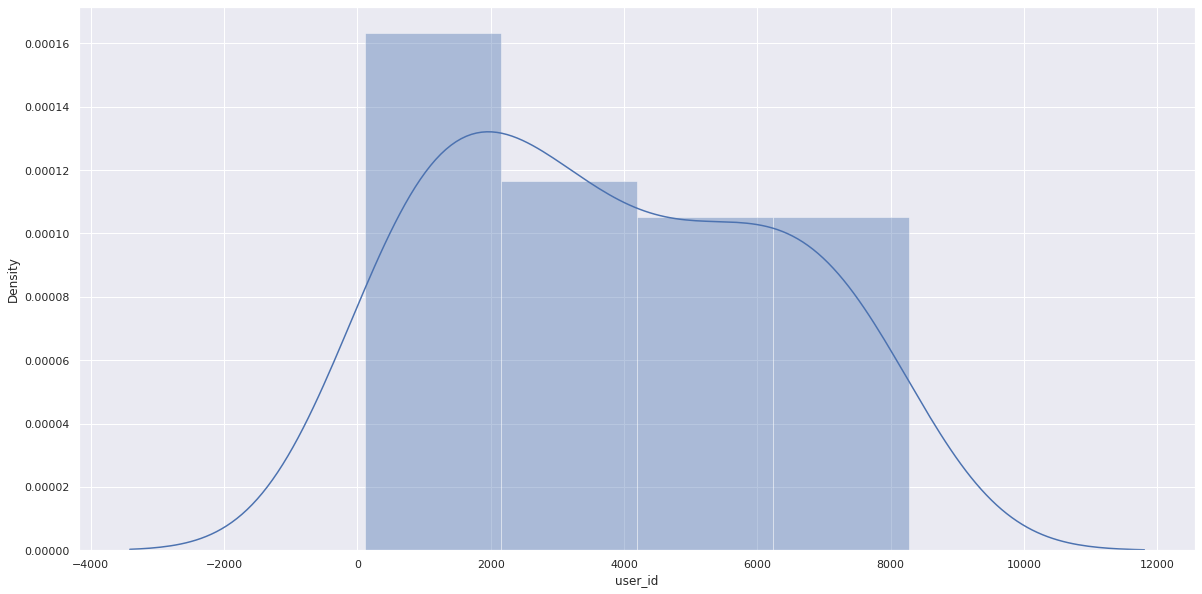

In [ ]:
import seaborn as sb
plt.figure(figsize=(20,10))
sb.distplot(df8['user_id'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


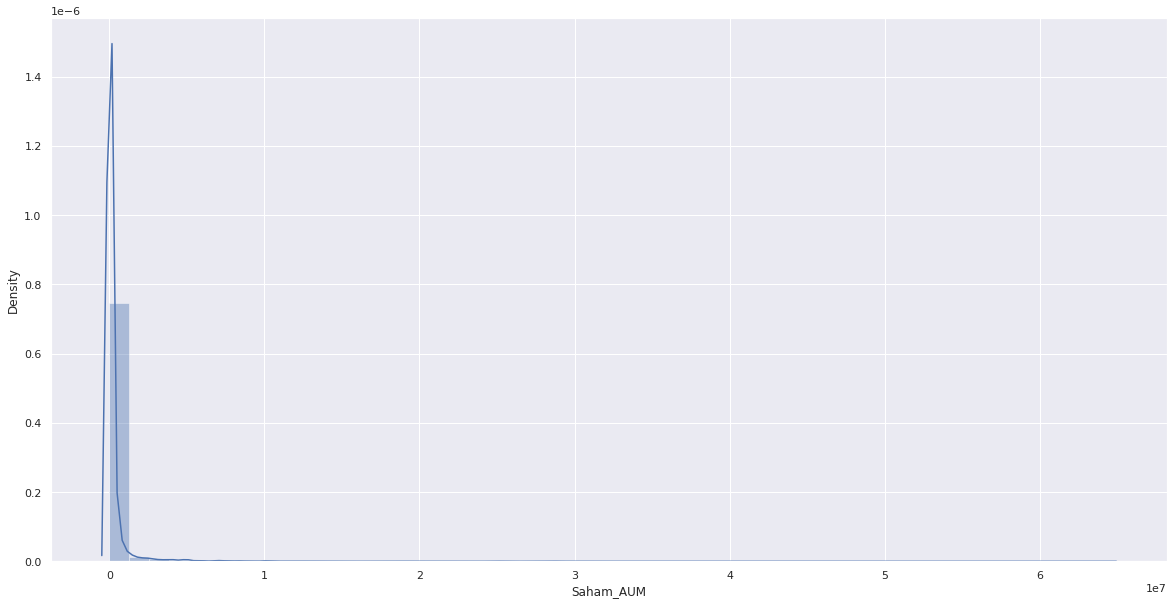

In [ ]:
plt.figure(figsize=(20,10))
sb.distplot(merge_1['Saham_AUM'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


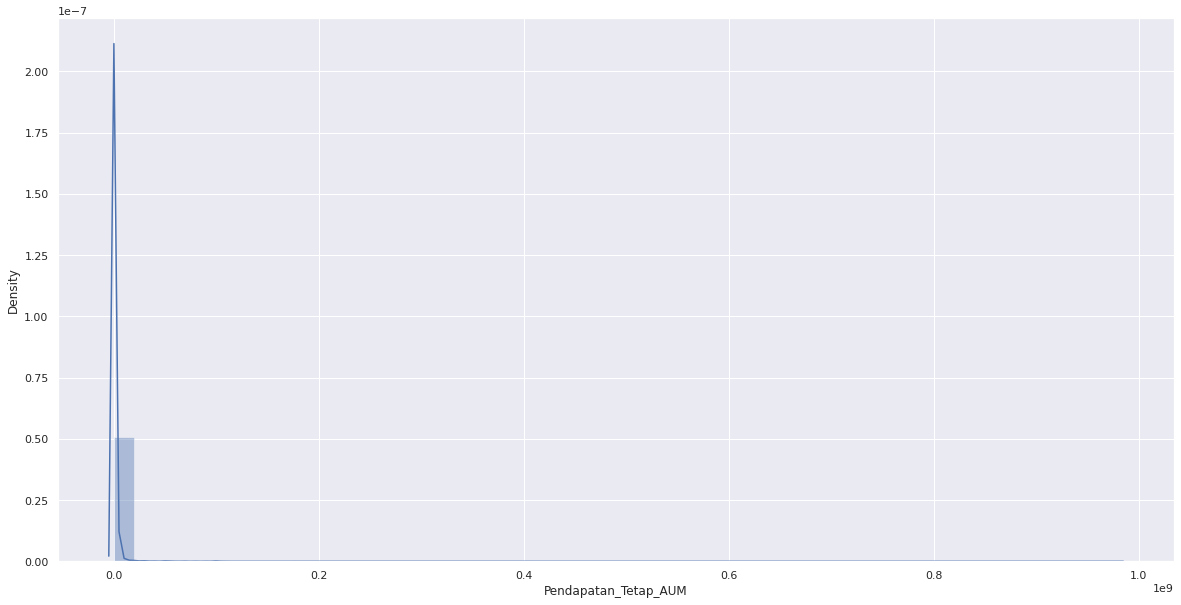

In [ ]:
plt.figure(figsize=(20,10))
sb.distplot(merge_1['Pendapatan_Tetap_AUM'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


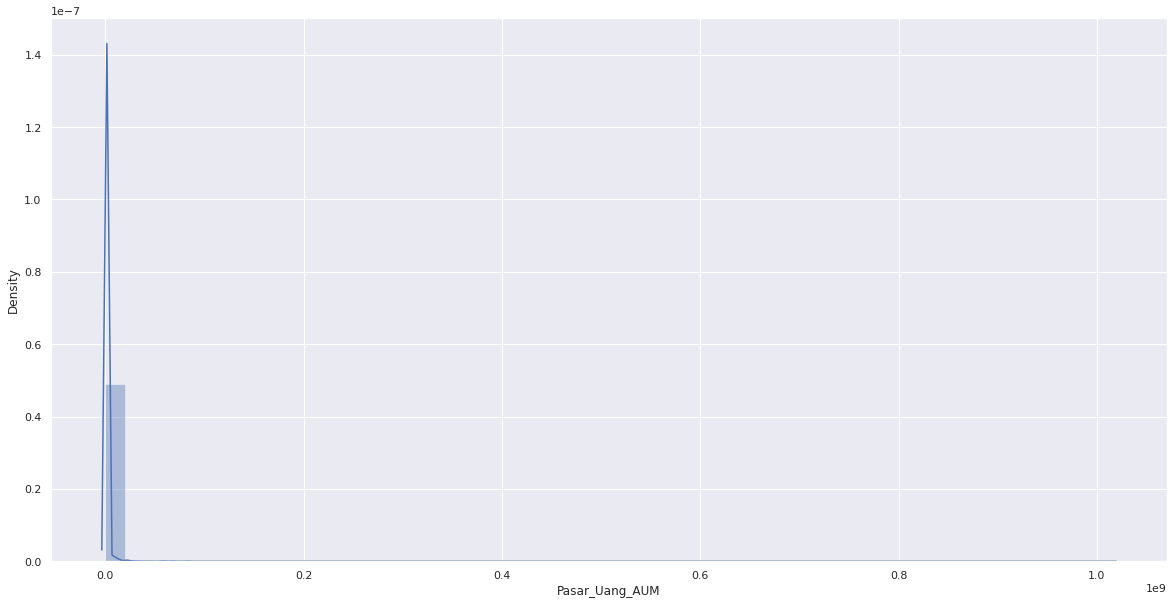

In [ ]:
plt.figure(figsize=(20,10))
sb.distplot(merge_1['Pasar_Uang_AUM'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


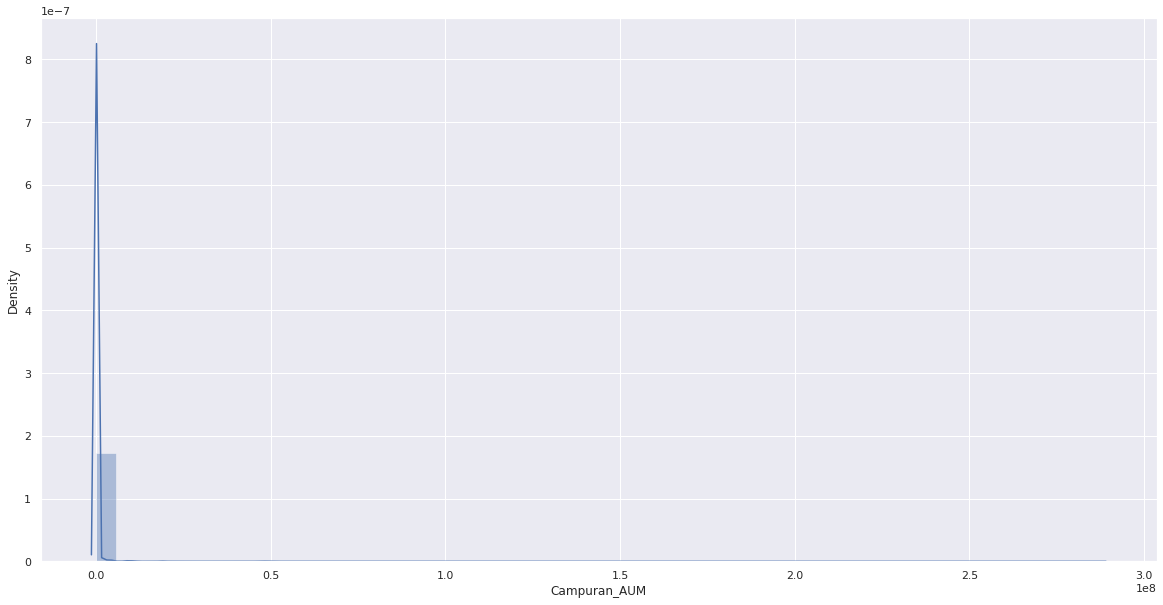

In [ ]:
plt.figure(figsize=(20,10))
sb.distplot(merge_1['Campuran_AUM'])

#aum trend line

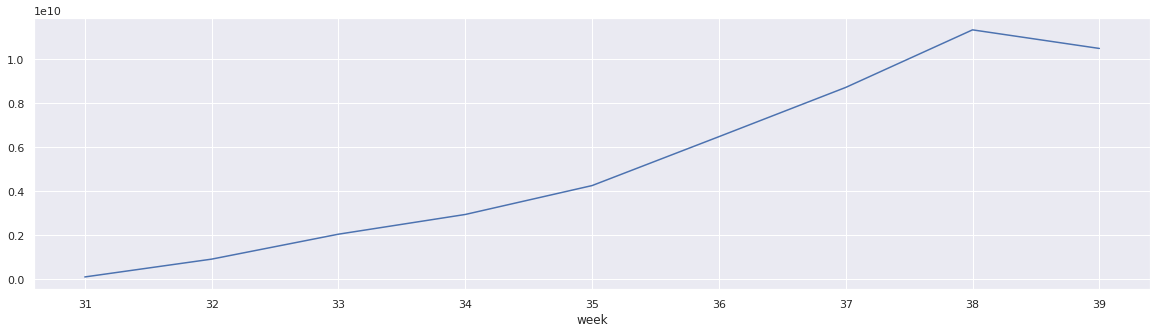

In [ ]:
plt.figure(figsize=(20, 5))
merge_1.groupby(['week'])['Saham_AUM'].sum().plot()
plt.show()

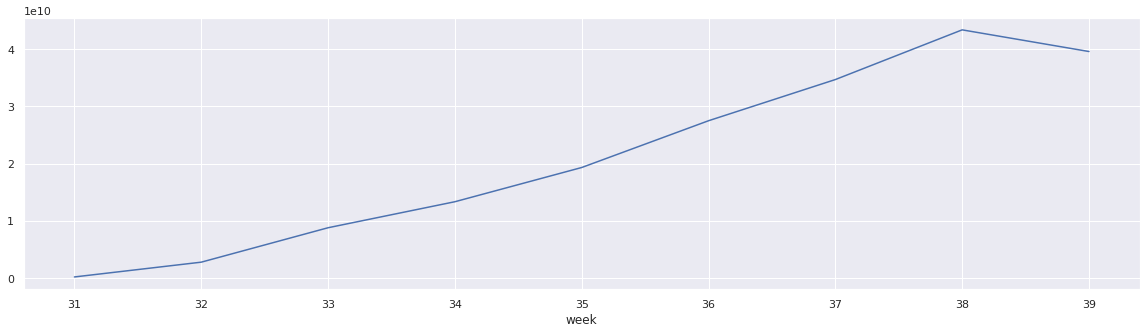

In [ ]:
plt.figure(figsize=(20, 5))
merge_1.groupby(['week'])['Pendapatan_Tetap_AUM'].sum().plot()
plt.show()

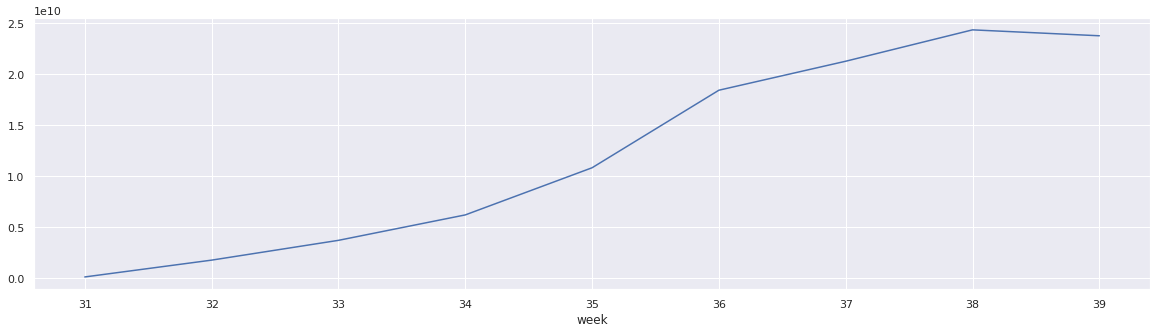

In [ ]:
plt.figure(figsize=(20, 5))
merge_1.groupby(['week'])['Pasar_Uang_AUM'].sum().plot()
plt.show()

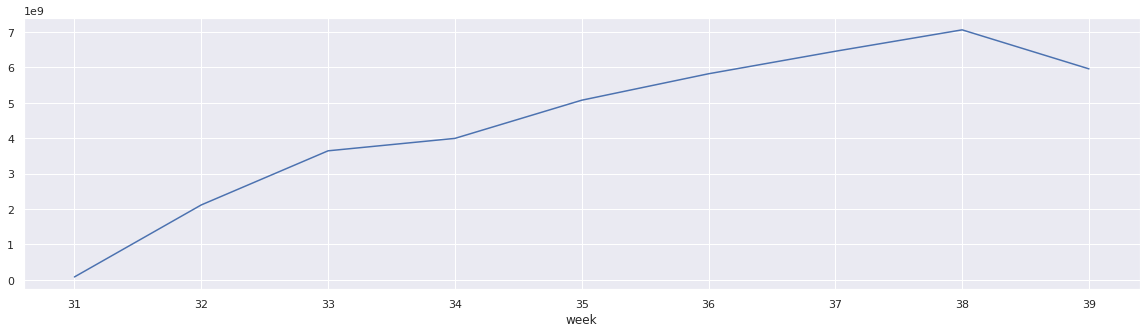

In [ ]:
plt.figure(figsize=(20, 5))
merge_1.groupby(['week'])['Campuran_AUM'].sum().plot()
plt.show()

#profit trend line

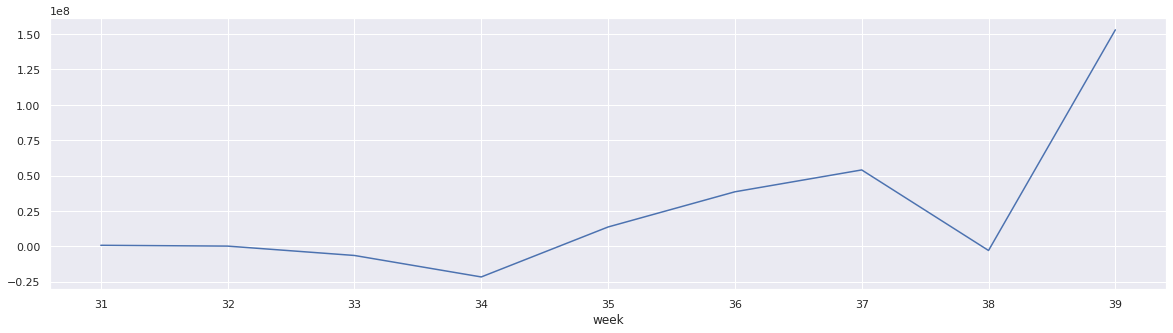

In [ ]:
plt.figure(figsize=(20, 5))
merge_1.groupby(['week'])['profit_saham'].sum().plot()
plt.show()

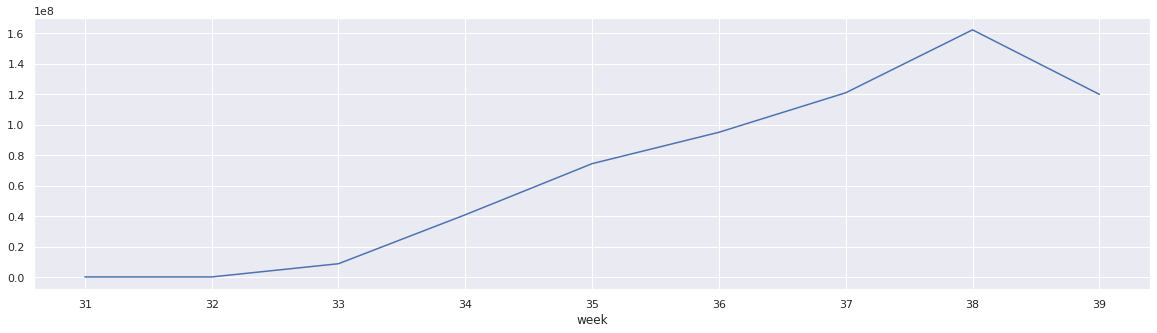

In [ ]:
plt.figure(figsize=(20, 5))
merge_1.groupby(['week'])['profit_pendapatan_tetap'].sum().plot()
plt.show()

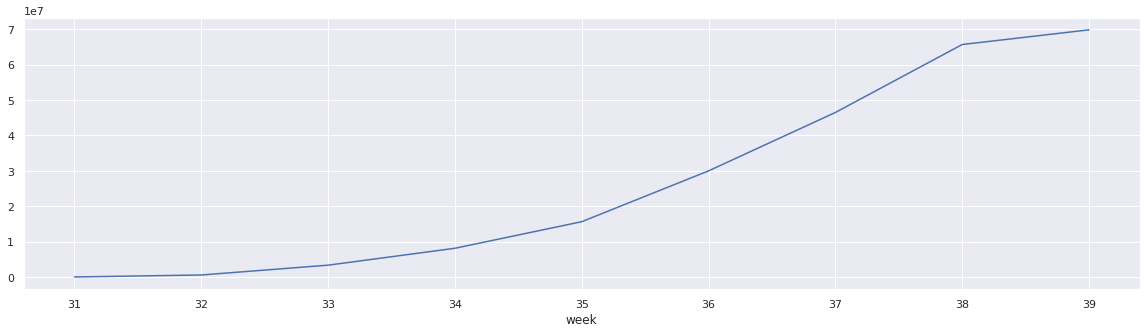

In [ ]:
plt.figure(figsize=(20, 5))
merge_1.groupby(['week'])['profit_pasar_uang'].sum().plot()
plt.show()

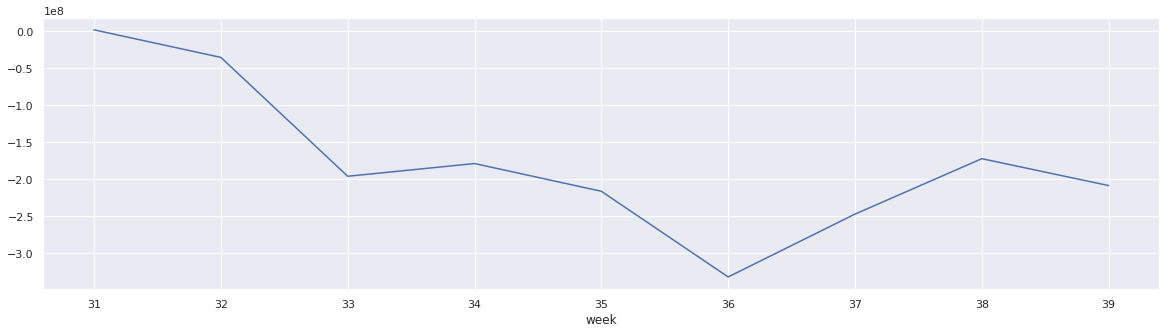

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
merge_1.groupby(['week'])['profit_campuran'].sum().plot()
plt.show()

#transaction amount

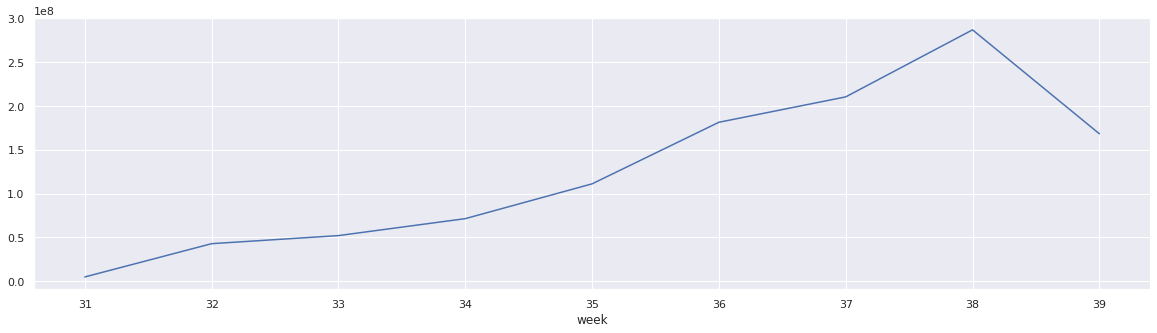

In [ ]:
plt.figure(figsize=(20, 5))
merge_1.groupby(['week'])['Saham_transaction_amount'].sum().plot()
plt.show()

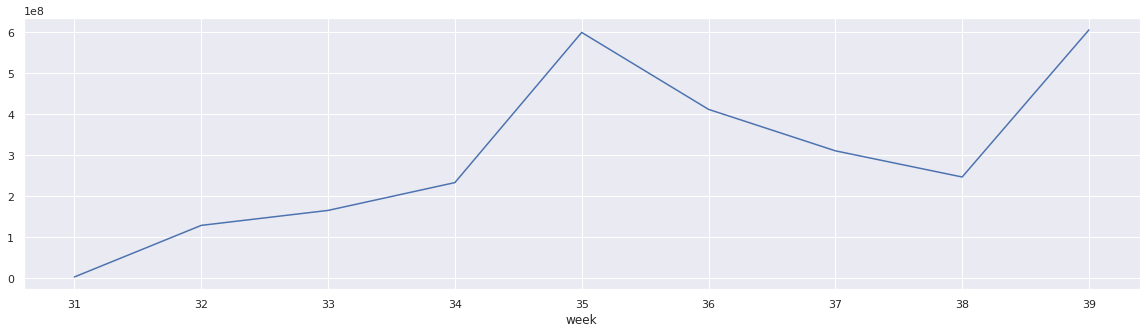

In [ ]:
plt.figure(figsize=(20, 5))
merge_1.groupby(['week'])['Pasar_Uang_transaction_amount'].sum().plot()
plt.show()

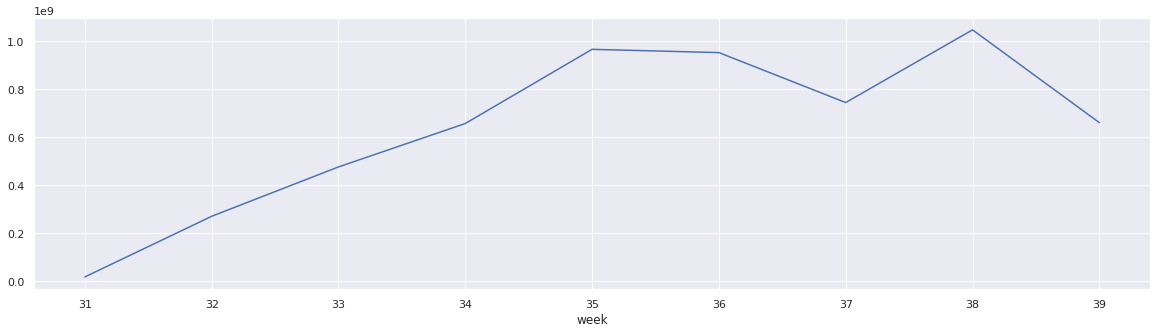

In [ ]:
plt.figure(figsize=(20, 5))
merge_1.groupby(['week'])['Pendapatan_Tetap_transaction_amount'].sum().plot()
plt.show()

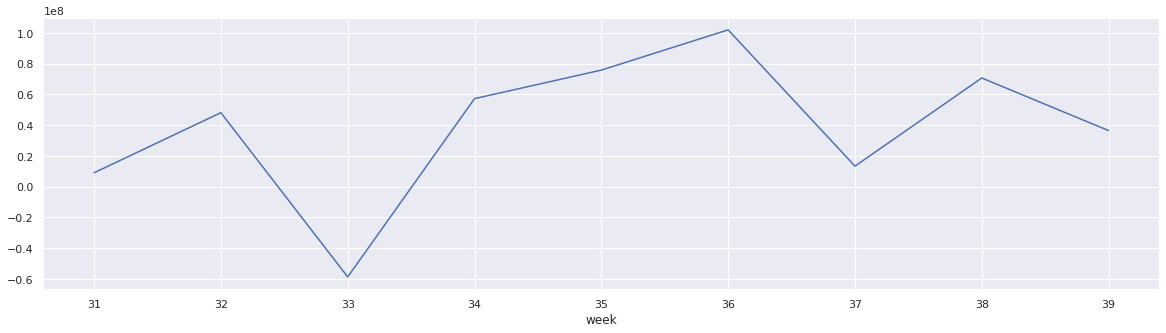

In [ ]:
plt.figure(figsize=(20, 5))
merge_1.groupby(['week'])['Campuran_transaction_amount'].sum().plot()
plt.show()

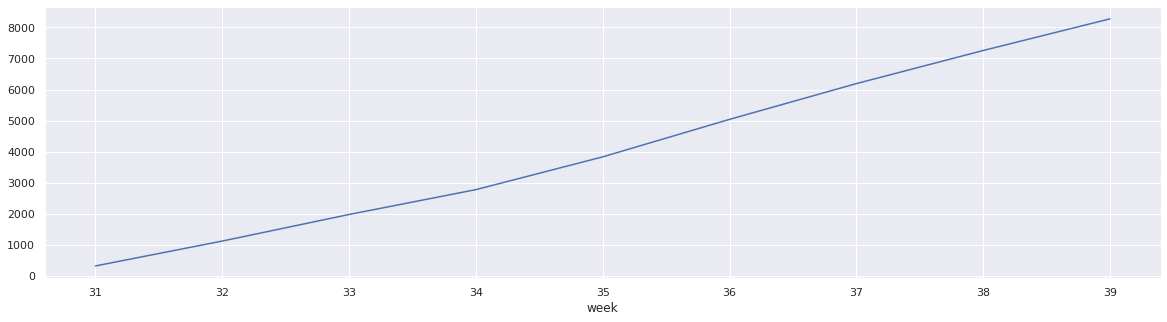

In [ ]:
plt.figure(figsize=(20, 5))
merge_1.groupby(['week'])['user_id'].nunique().plot()
plt.show()

#chart

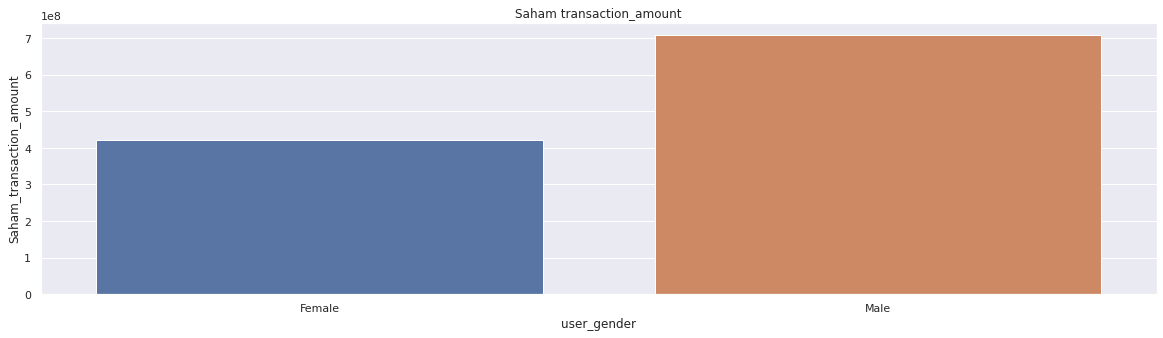

In [ ]:
plt.figure(figsize=(20, 5))
mg1= merge_1.groupby(['user_gender'])['Saham_transaction_amount'].sum()
mg1=mg1.reset_index()
sb.barplot(x='user_gender',
           y='Saham_transaction_amount',
           data=mg1)
plt.title("Saham transaction_amount")
plt.show()

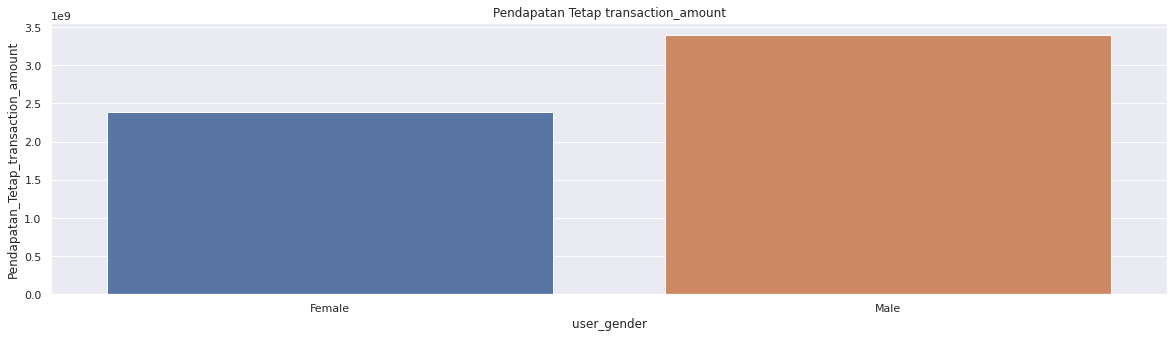

In [ ]:
plt.figure(figsize=(20, 5))
mg2= merge_1.groupby(['user_gender'])['Pendapatan_Tetap_transaction_amount'].sum()
mg2=mg2.reset_index()
sb.barplot(x='user_gender',
           y='Pendapatan_Tetap_transaction_amount',
           data=mg2)
plt.title("Pendapatan Tetap transaction_amount")
plt.show()

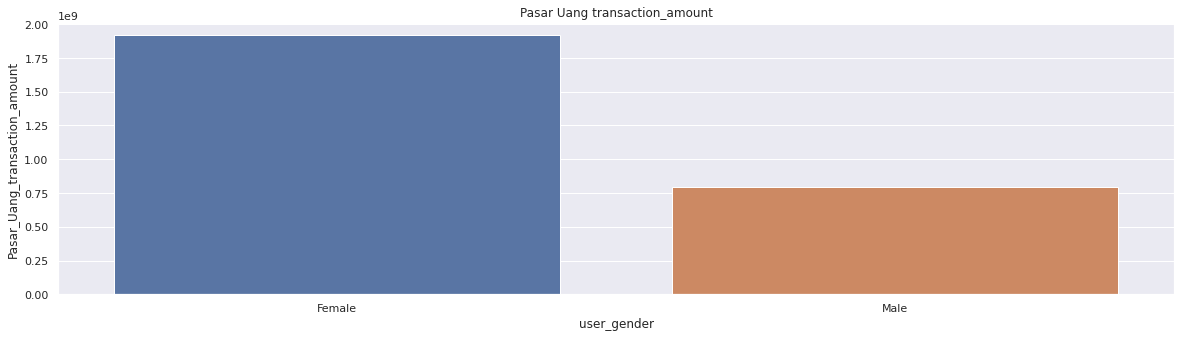

In [ ]:
plt.figure(figsize=(20, 5))
mg3= merge_1.groupby(['user_gender'])['Pasar_Uang_transaction_amount'].sum()
mg3=mg3.reset_index()
sb.barplot(x='user_gender',
           y='Pasar_Uang_transaction_amount',
           data=mg3)

plt.title("Pasar Uang transaction_amount")
plt.show()



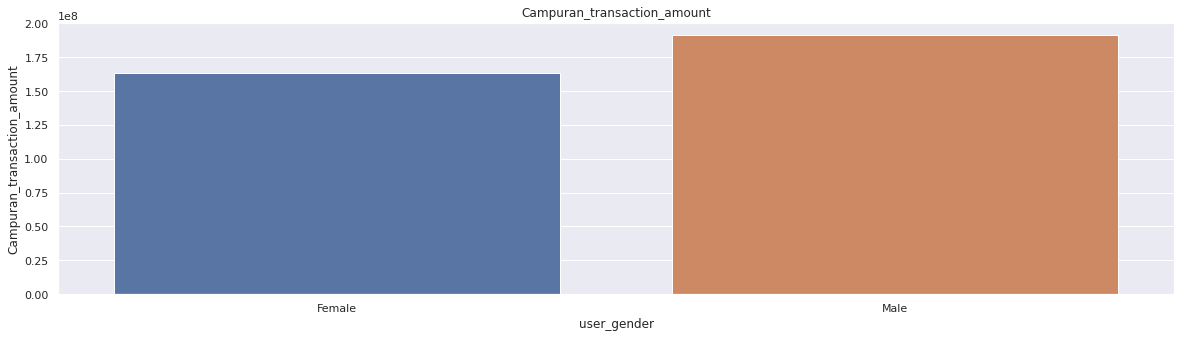

In [ ]:
plt.figure(figsize=(20, 5))
mg4= merge_1.groupby(['user_gender'])['Campuran_transaction_amount'].sum()
mg4=mg4.reset_index()
sb.barplot(x='user_gender',
           y='Campuran_transaction_amount',
           data=mg4)
plt.title("Campuran_transaction_amount")
plt.show()


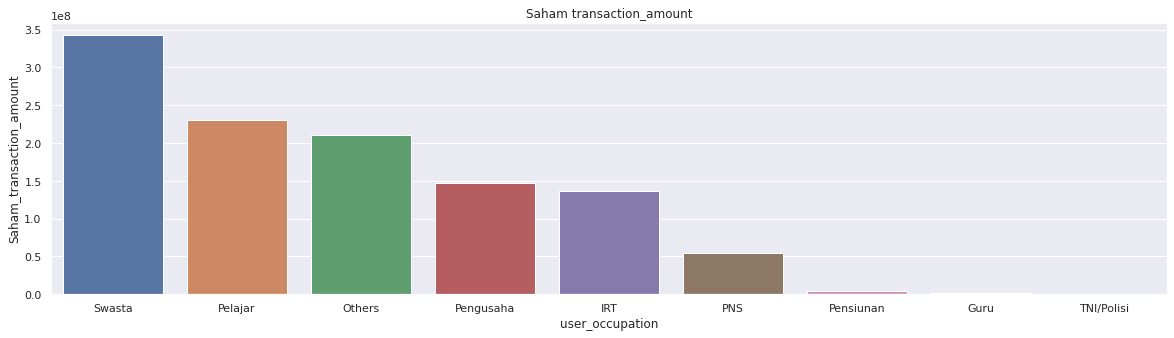

In [ ]:
plt.figure(figsize=(20, 5))
mo1= merge_1.groupby(['user_occupation'])['Saham_transaction_amount'].sum()
mo1=mo1.reset_index()
ax= sb.barplot(x='user_occupation',
           y='Saham_transaction_amount',
           data=mo1, order=mo1.sort_values('Saham_transaction_amount',ascending = False).user_occupation)

plt.title("Saham transaction_amount")
plt.show()


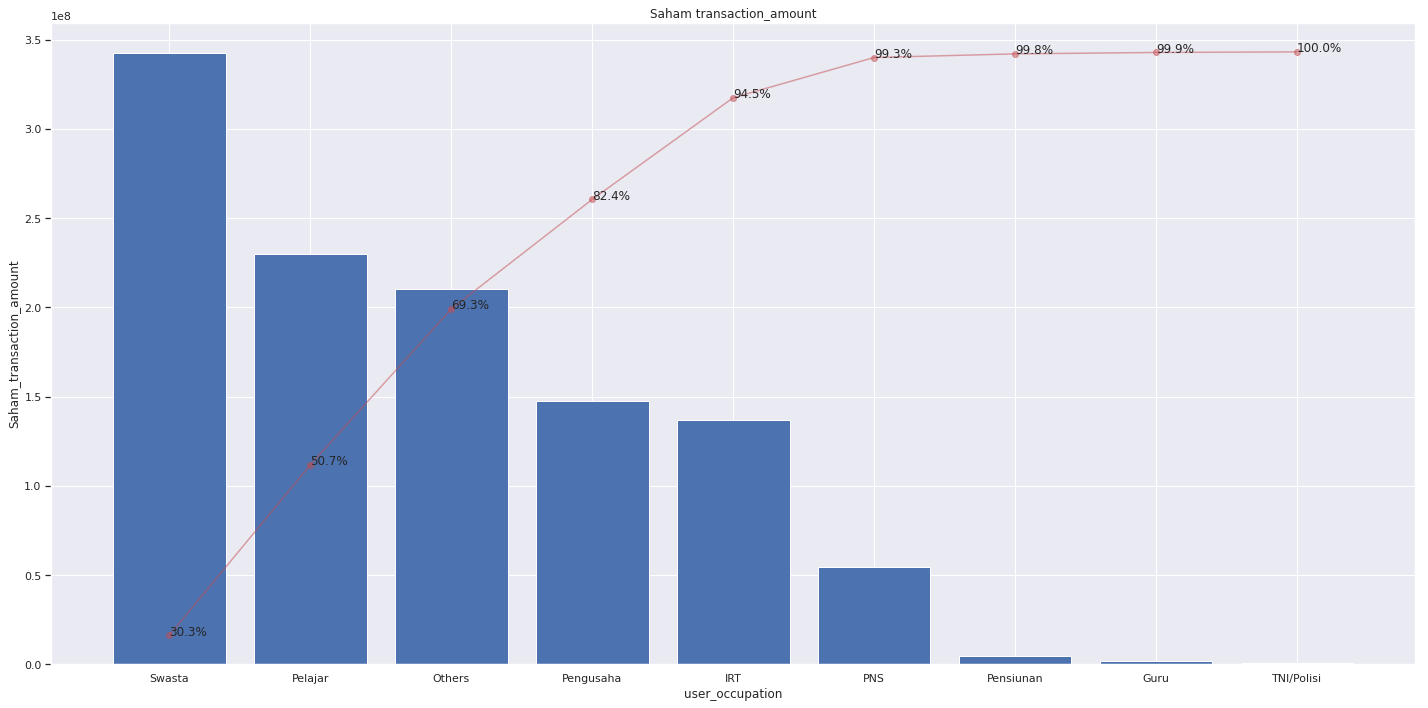

In [ ]:
def pareto_plot(mo1, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0000001%}'):
    xlabel = x
    ylabel = y
    tmp = mo1.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.02%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]))    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

pareto_plot(mo1, x='user_occupation', y='Saham_transaction_amount', title='Saham transaction_amount')

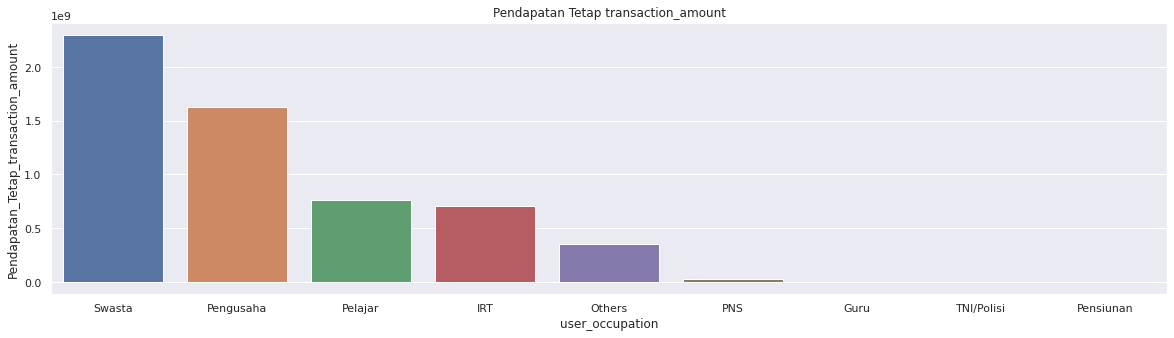

In [ ]:
plt.figure(figsize=(20, 5))
mo2=merge_1.groupby(['user_occupation'])['Pendapatan_Tetap_transaction_amount'].sum()
mo2= merge_1.groupby(['user_occupation'])['Pendapatan_Tetap_transaction_amount'].sum()
mo2=mo2.reset_index()
sb.barplot(x='user_occupation',
           y='Pendapatan_Tetap_transaction_amount',
           data=mo2,order=mo2.sort_values('Pendapatan_Tetap_transaction_amount',ascending = False).user_occupation)


plt.title("Pendapatan Tetap transaction_amount")
plt.show()

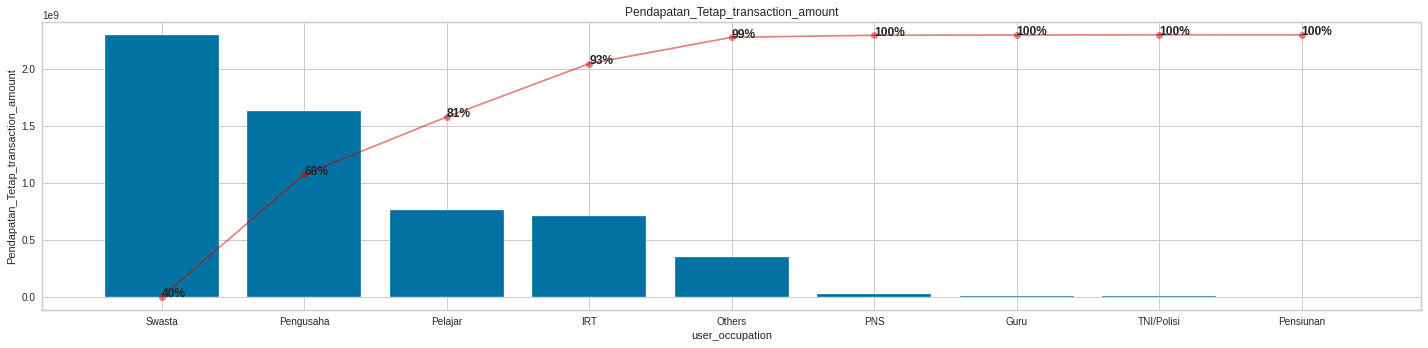

In [ ]:
def pareto_plot(mo2, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = mo2.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 5))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(mo2, x='user_occupation', y='Pendapatan_Tetap_transaction_amount', title='Pendapatan_Tetap_transaction_amount')

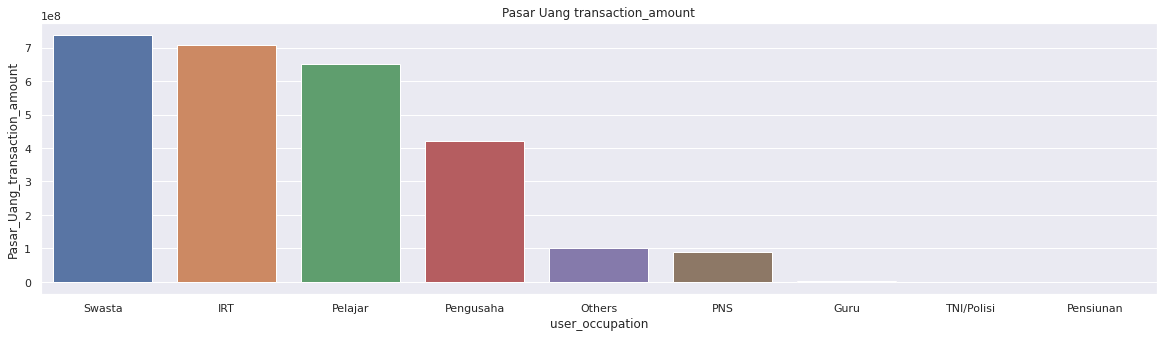

In [ ]:
plt.figure(figsize=(20, 5))
mo3= merge_1.groupby(['user_occupation'])['Pasar_Uang_transaction_amount'].sum()
mo3=mo3.reset_index()
sb.barplot(x='user_occupation',
           y='Pasar_Uang_transaction_amount', 
           data=mo3,order=mo3.sort_values('Pasar_Uang_transaction_amount',ascending = False).user_occupation)
plt.title("Pasar Uang transaction_amount")
plt.show()

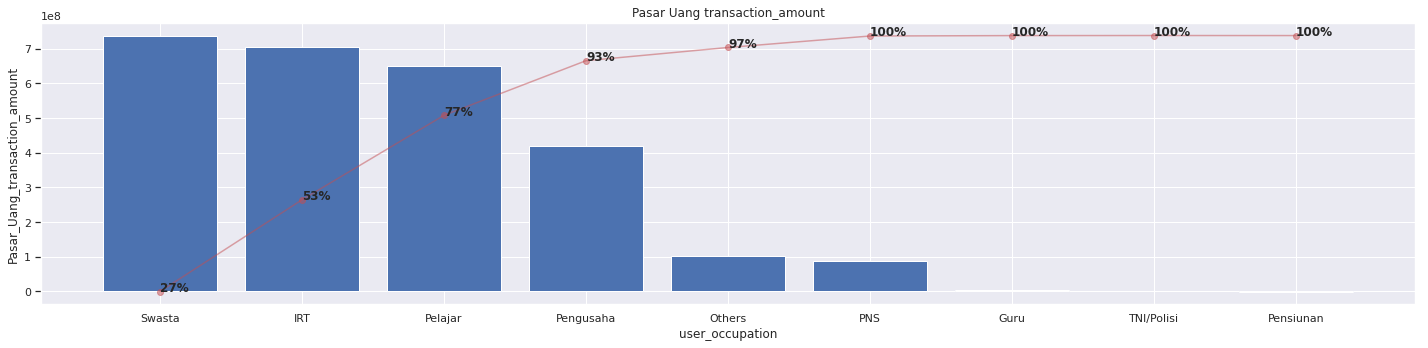

In [ ]:
def pareto_plot(mo3, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = mo3.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 5))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(mo3, x='user_occupation', y='Pasar_Uang_transaction_amount', title='Pasar Uang transaction_amount')

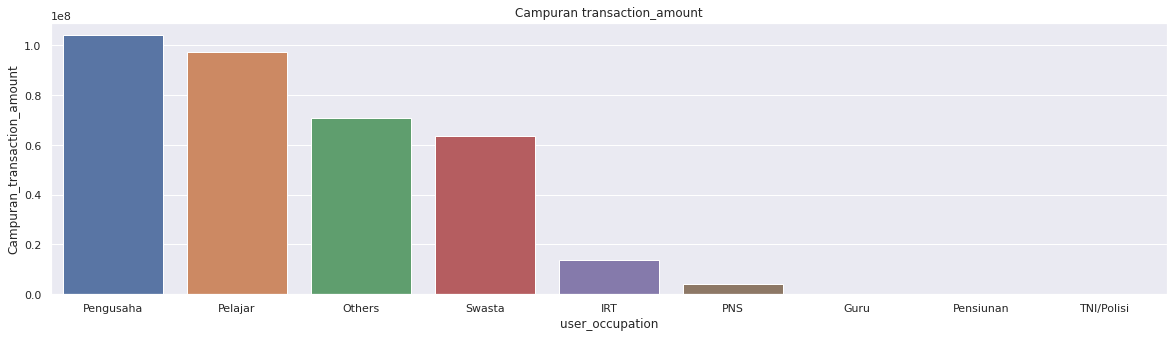

In [ ]:
plt.figure(figsize=(20, 5))
mo4=merge_1.groupby(['user_occupation'])['Campuran_transaction_amount'].sum()
mo4=mo4.reset_index()
sb.barplot(x='user_occupation',
           y='Campuran_transaction_amount',
           data=mo4,order=mo4.sort_values('Campuran_transaction_amount',ascending = False).user_occupation)

plt.title("Campuran transaction_amount")
plt.show()


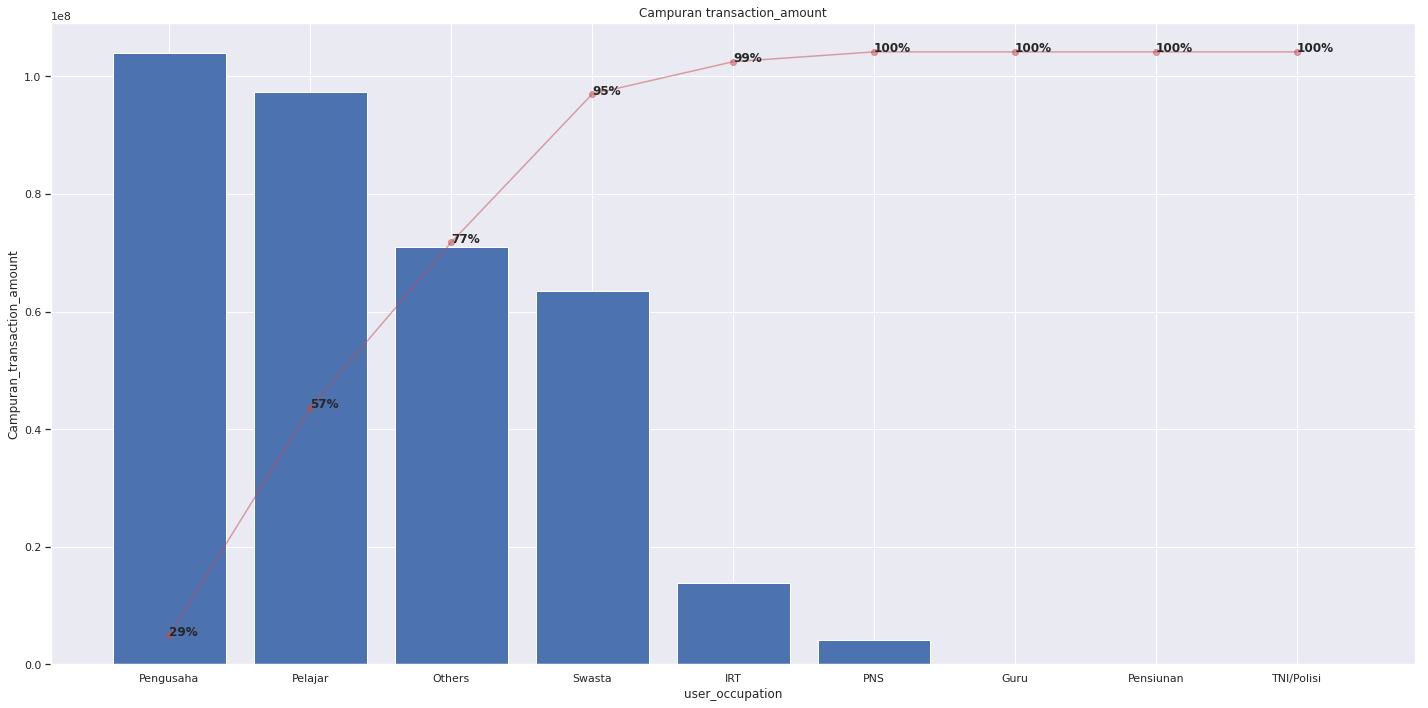

In [ ]:
def pareto_plot(mo4, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = mo4.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(mo4, x='user_occupation', y='Campuran_transaction_amount', title='Campuran transaction_amount')

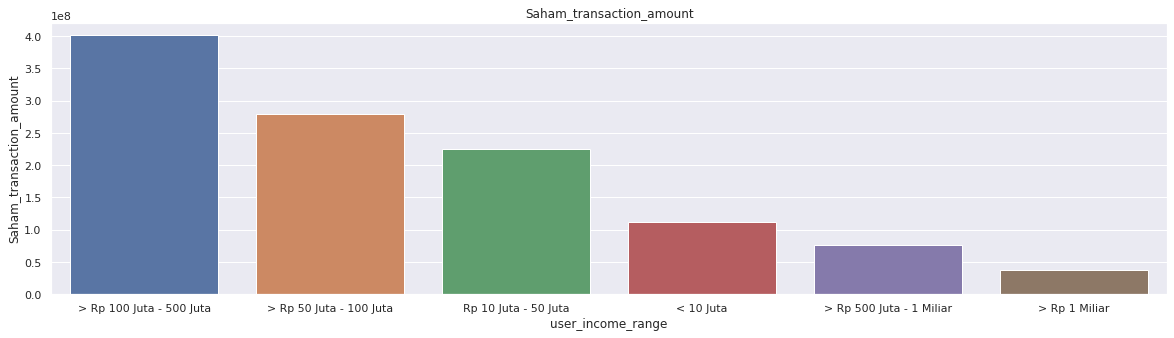

In [ ]:
plt.figure(figsize=(20, 5))
mi1=merge_1.groupby(['user_income_range'])['Saham_transaction_amount'].sum()
mi1=mi1.reset_index()
sb.barplot(x='user_income_range',
           y='Saham_transaction_amount',
           data=mi1,order=mi1.sort_values('Saham_transaction_amount',ascending = False).user_income_range)


plt.title("Saham_transaction_amount")
plt.show()

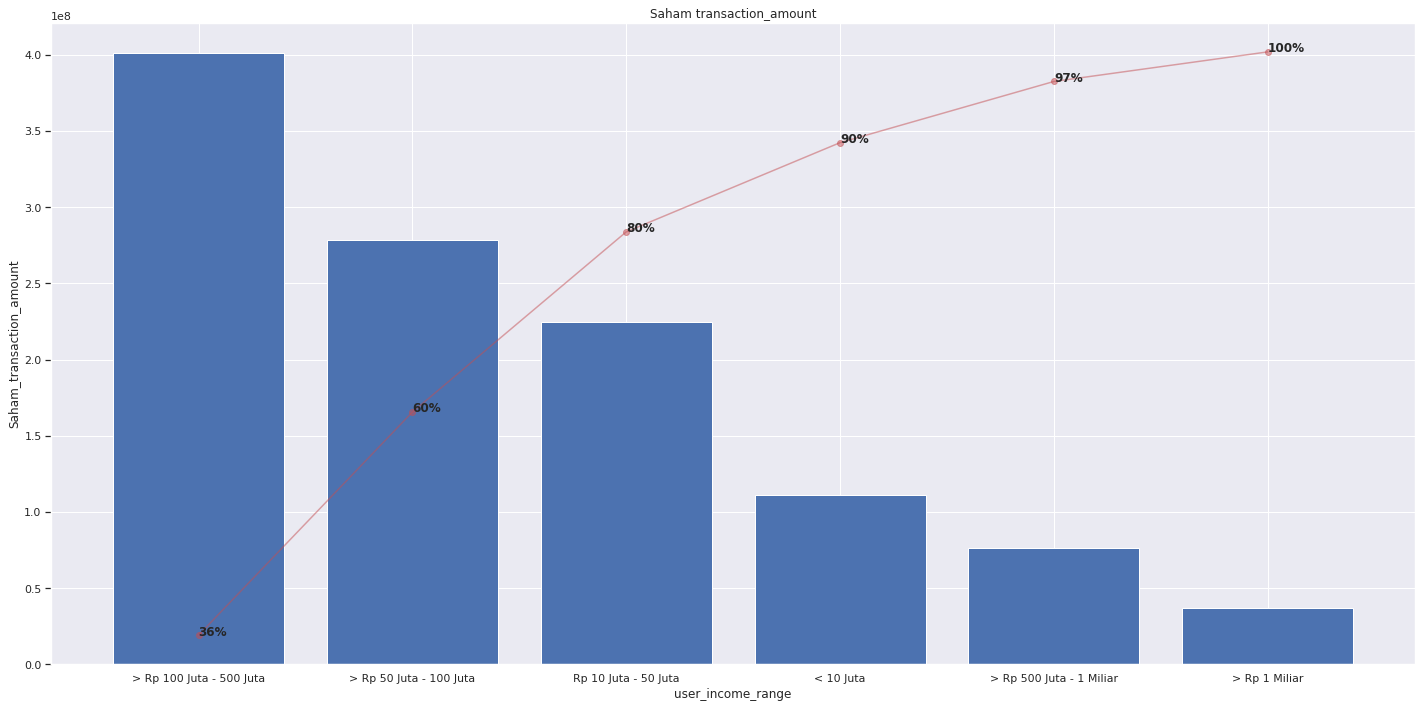

In [ ]:
def pareto_plot(mi1, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = mi1.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(mi1, x='user_income_range', y='Saham_transaction_amount', title='Saham transaction_amount')

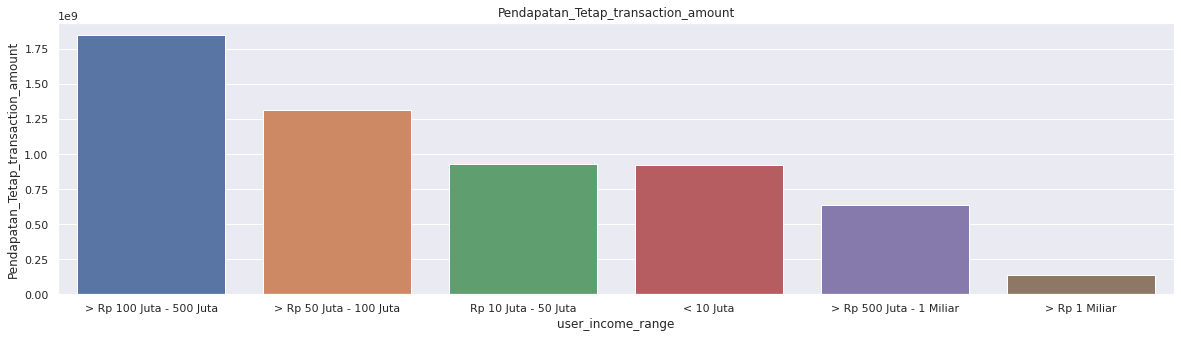

In [ ]:
plt.figure(figsize=(20, 5))
mi2=merge_1.groupby(['user_income_range'])['Pendapatan_Tetap_transaction_amount'].sum()
mi2=mi2.reset_index()
sb.barplot(x='user_income_range',
           y='Pendapatan_Tetap_transaction_amount',
           data=mi2,order=mi2.sort_values('Pendapatan_Tetap_transaction_amount',ascending = False).user_income_range)
plt.title("Pendapatan_Tetap_transaction_amount")
plt.show()

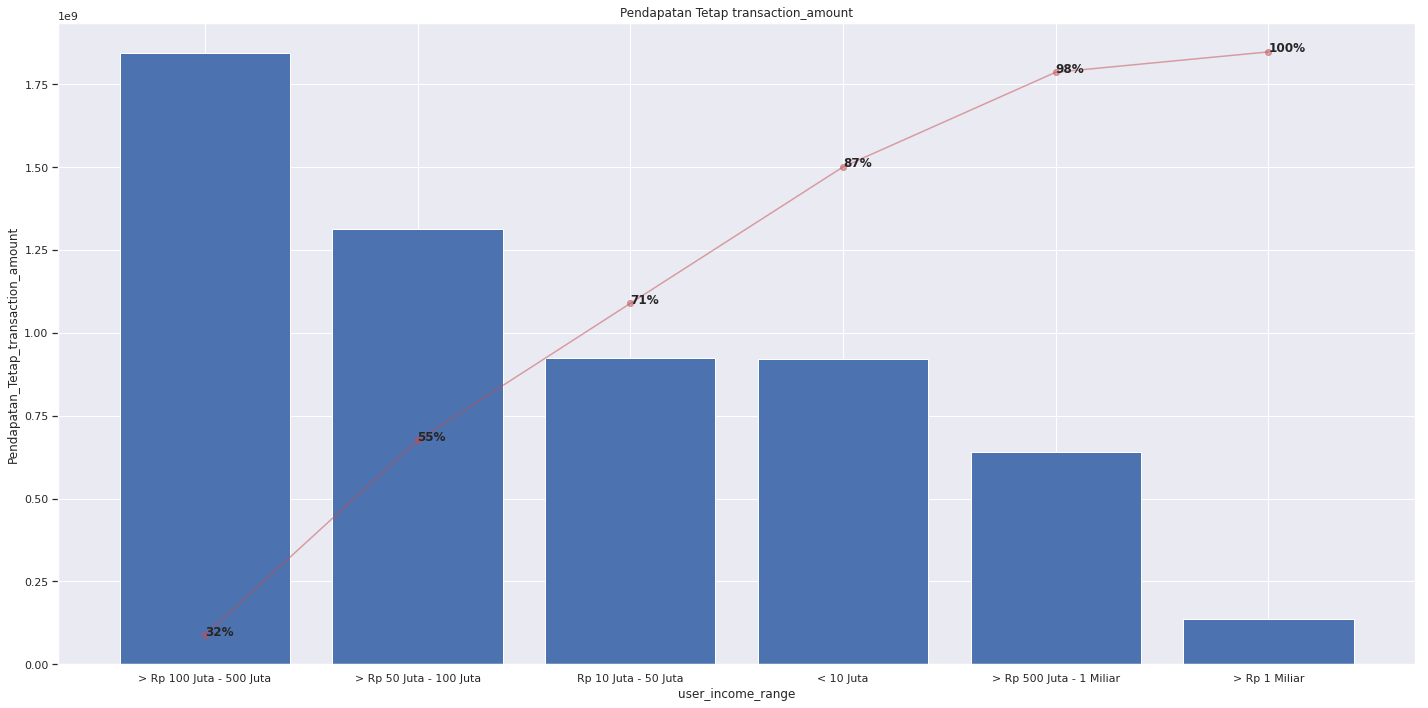

In [ ]:
def pareto_plot(mi2, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = mi2.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(mi2, x='user_income_range', y='Pendapatan_Tetap_transaction_amount', title='Pendapatan Tetap transaction_amount')



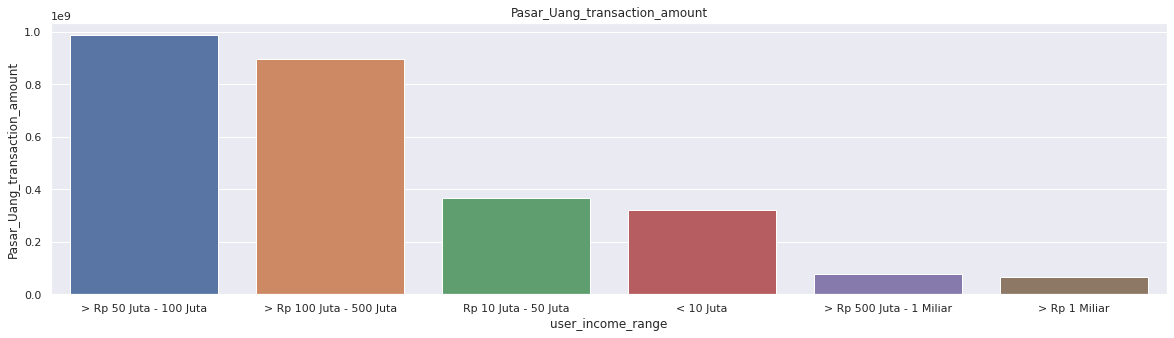

In [ ]:
plt.figure(figsize=(20, 5))
mi3=merge_1.groupby(['user_income_range'])['Pasar_Uang_transaction_amount'].sum()
mi3=mi3.reset_index()
sb.barplot(x='user_income_range',
           y='Pasar_Uang_transaction_amount',
           data=mi3,order=mi3.sort_values('Pasar_Uang_transaction_amount',ascending = False).user_income_range)

plt.title("Pasar_Uang_transaction_amount")
plt.show()

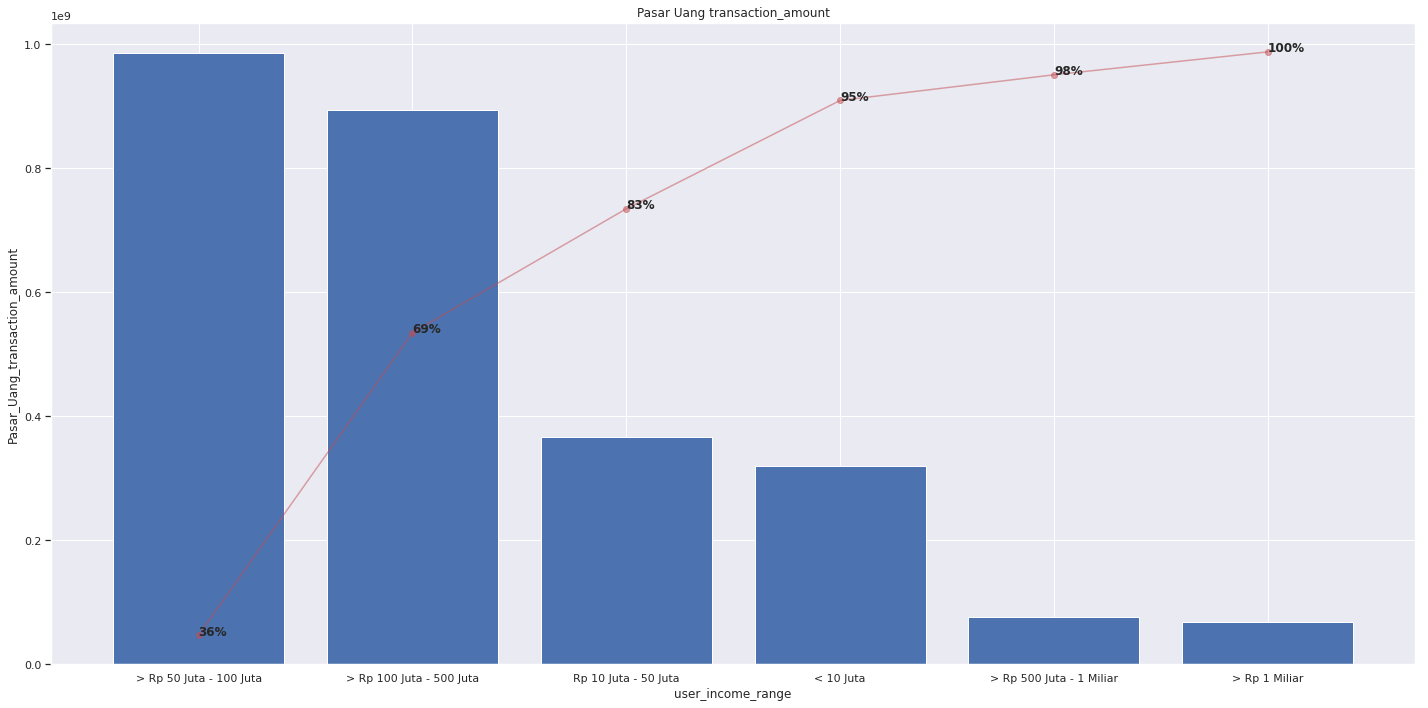

In [ ]:
def pareto_plot(mi3, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = mi3.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(mi3, x='user_income_range', y='Pasar_Uang_transaction_amount', title='Pasar Uang transaction_amount')



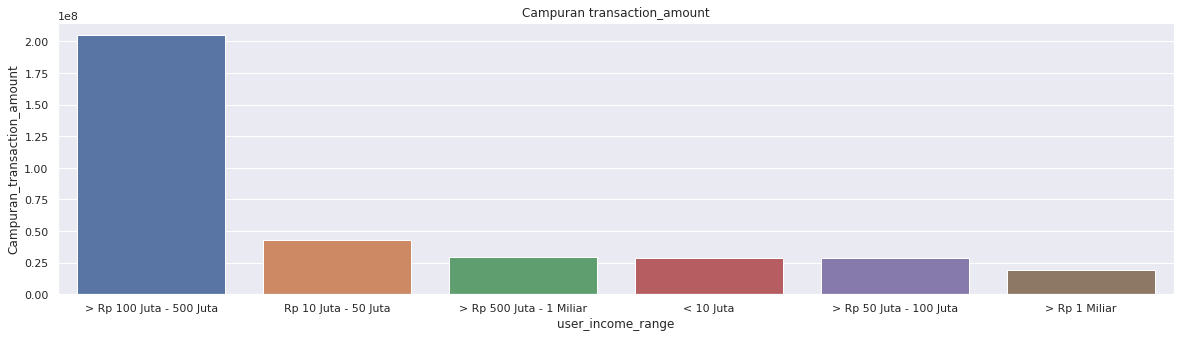

In [ ]:
plt.figure(figsize=(20, 5))
mi4=merge_1.groupby(['user_income_range'])['Campuran_transaction_amount'].sum()
mi4=mi4.reset_index()
sb.barplot(x='user_income_range',
           y='Campuran_transaction_amount',
           data=mi4,order=mi4.sort_values('Campuran_transaction_amount',ascending = False).user_income_range)
plt.title("Campuran transaction_amount")
plt.show()

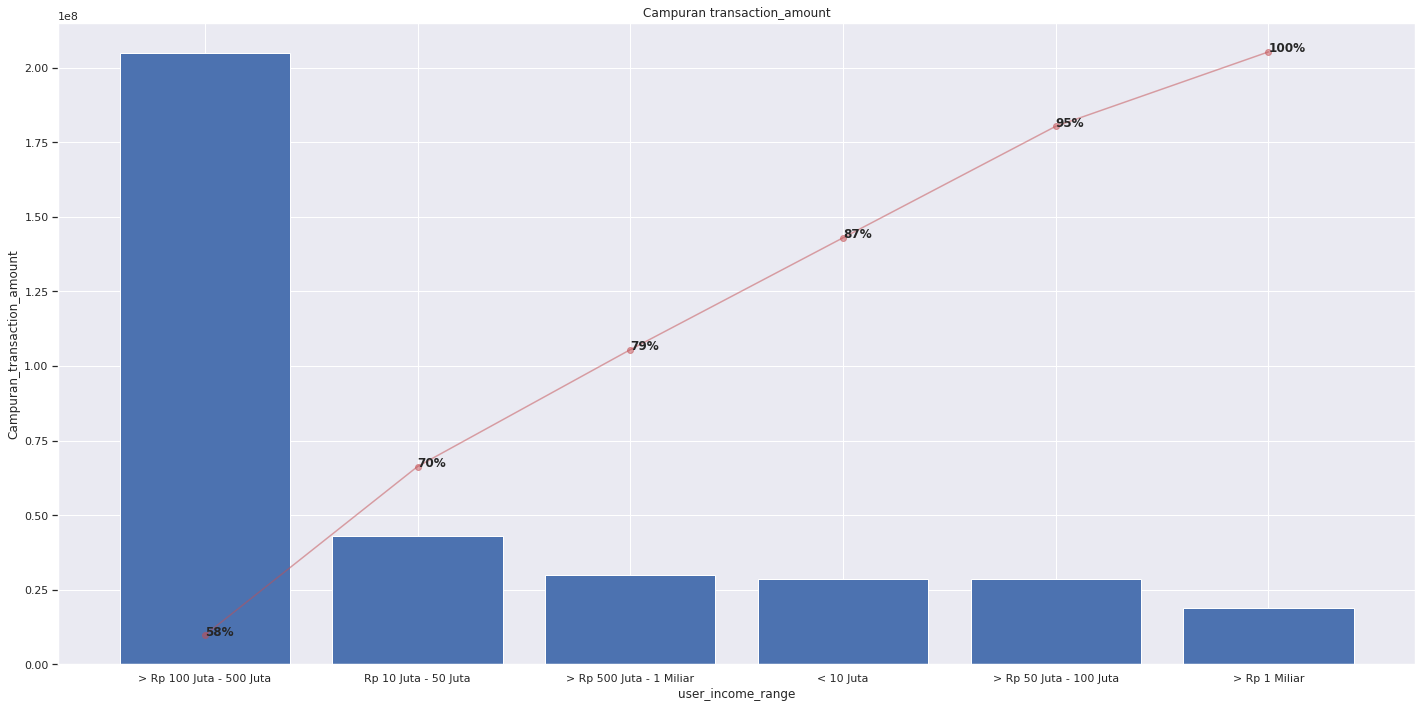

In [ ]:
def pareto_plot(mi4, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = mi4.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(mi4, x='user_income_range', y='Campuran_transaction_amount', title='Campuran transaction_amount')



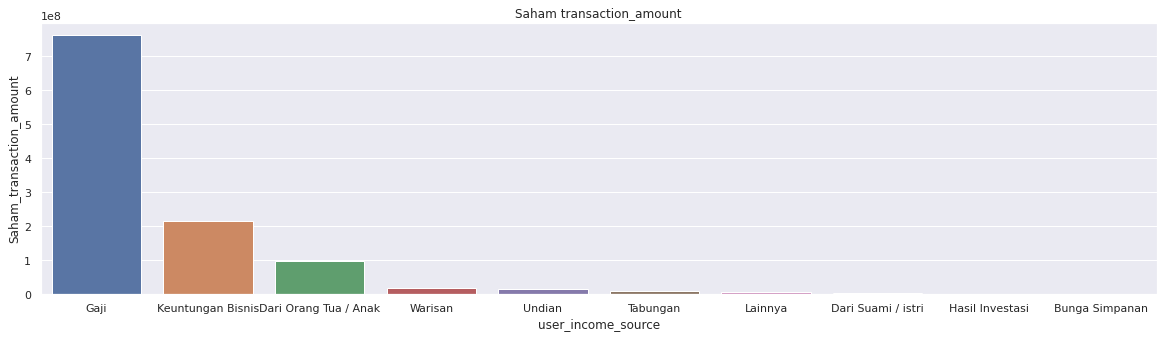

In [ ]:
plt.figure(figsize=(20, 5))
ms1=merge_1.groupby(['user_income_source'])['Saham_transaction_amount'].sum()
ms1=ms1.reset_index()
sb.barplot(x='user_income_source',
           y='Saham_transaction_amount',
           data=ms1,order=ms1.sort_values('Saham_transaction_amount',ascending = False).user_income_source)
plt.title("Saham transaction_amount")
plt.show()

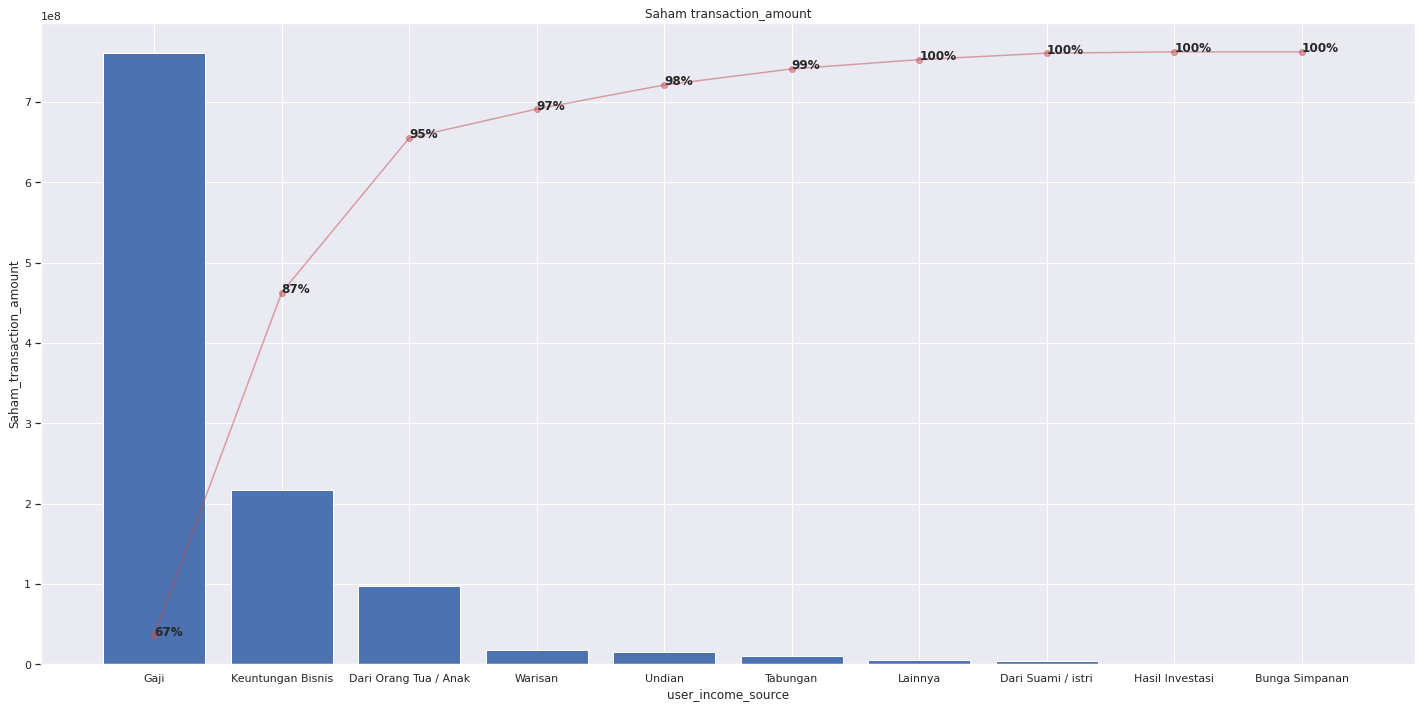

In [ ]:
def pareto_plot(ms1, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = ms1.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(ms1, x='user_income_source', y='Saham_transaction_amount', title='Saham transaction_amount')


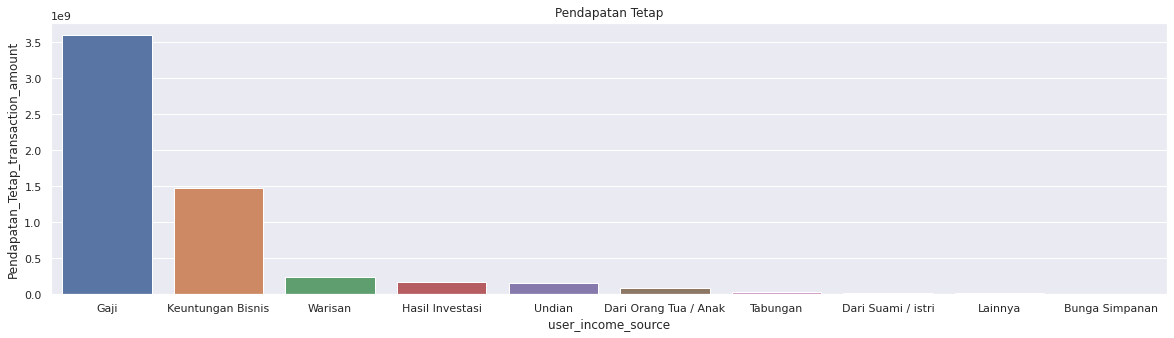

In [ ]:
plt.figure(figsize=(20, 5))
ms2=merge_1.groupby(['user_income_source'])['Pendapatan_Tetap_transaction_amount'].sum()
ms2=ms2.reset_index()
sb.barplot(x='user_income_source',
           y='Pendapatan_Tetap_transaction_amount',
           data=ms2,order=ms2.sort_values('Pendapatan_Tetap_transaction_amount',ascending = False).user_income_source)

plt.title("Pendapatan Tetap")
plt.show()

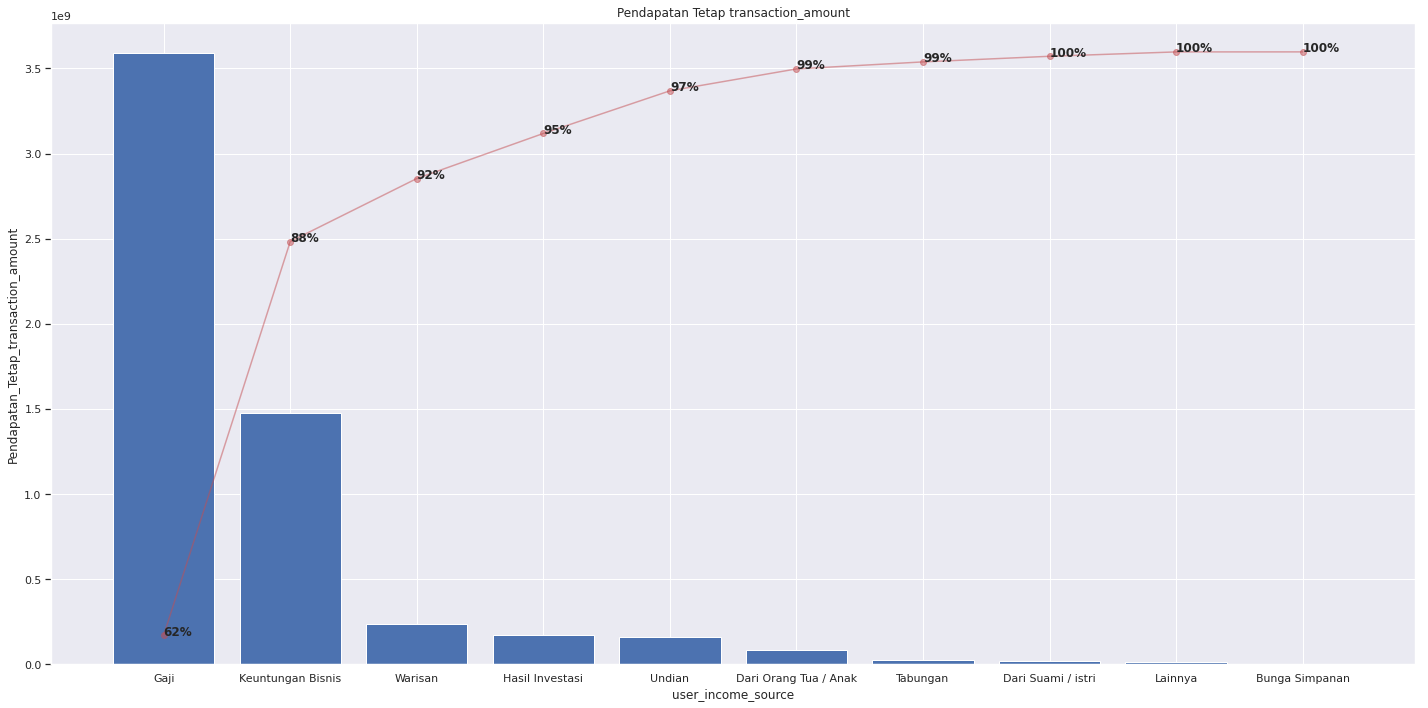

In [ ]:
def pareto_plot(ms2, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = ms2.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(ms2, x='user_income_source', y='Pendapatan_Tetap_transaction_amount', title='Pendapatan Tetap transaction_amount')



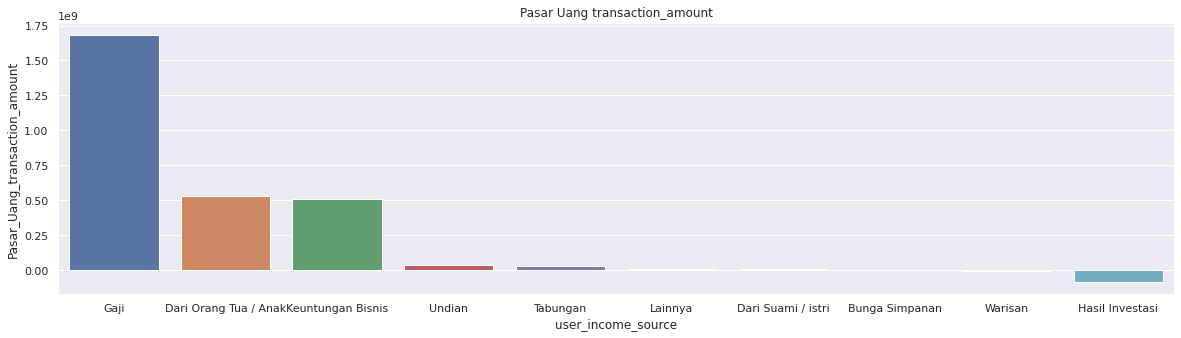

In [ ]:
plt.figure(figsize=(20, 5))
ms3=merge_1.groupby(['user_income_source'])['Pasar_Uang_transaction_amount'].sum()
ms3=ms3.reset_index()
sb.barplot(x='user_income_source',
           y='Pasar_Uang_transaction_amount',
           data=ms3,order=ms3.sort_values('Pasar_Uang_transaction_amount',ascending = False).user_income_source)

plt.title("Pasar Uang transaction_amount")
plt.show()

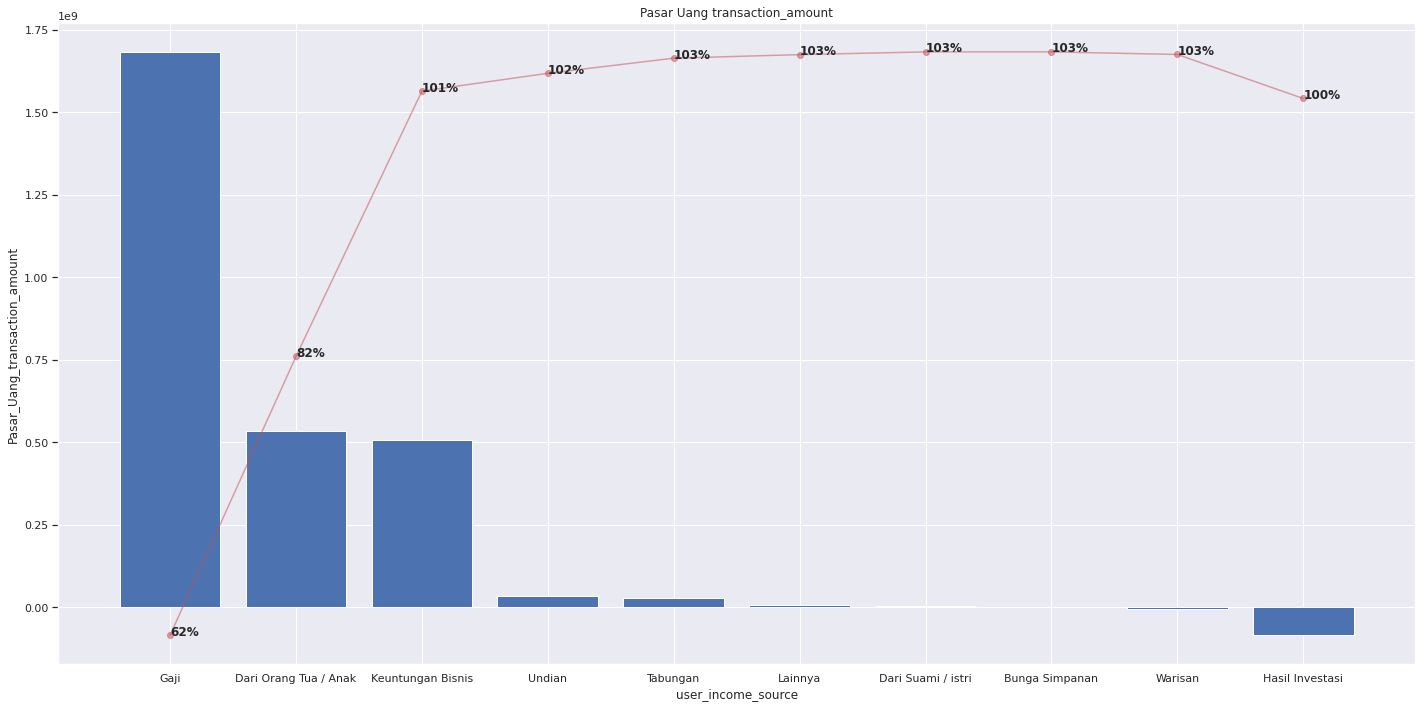

In [ ]:
def pareto_plot(ms3, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = ms3.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(ms3, x='user_income_source', y='Pasar_Uang_transaction_amount', title='Pasar Uang transaction_amount')



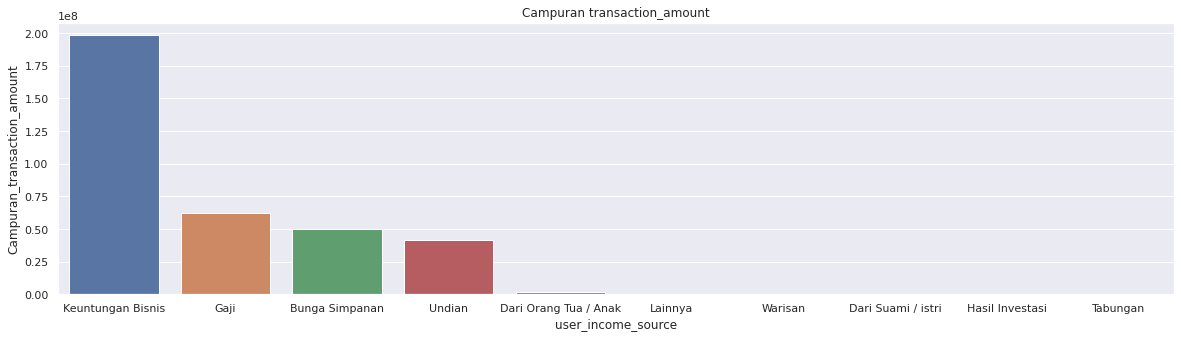

In [ ]:
plt.figure(figsize=(20, 5))
ms4=merge_1.groupby(['user_income_source'])['Campuran_transaction_amount'].sum()
ms4=ms4.reset_index()
sb.barplot(x='user_income_source',
           y='Campuran_transaction_amount',
          data=ms4,order=ms4.sort_values('Campuran_transaction_amount',ascending = False).user_income_source)

plt.title("Campuran transaction_amount")
plt.show()

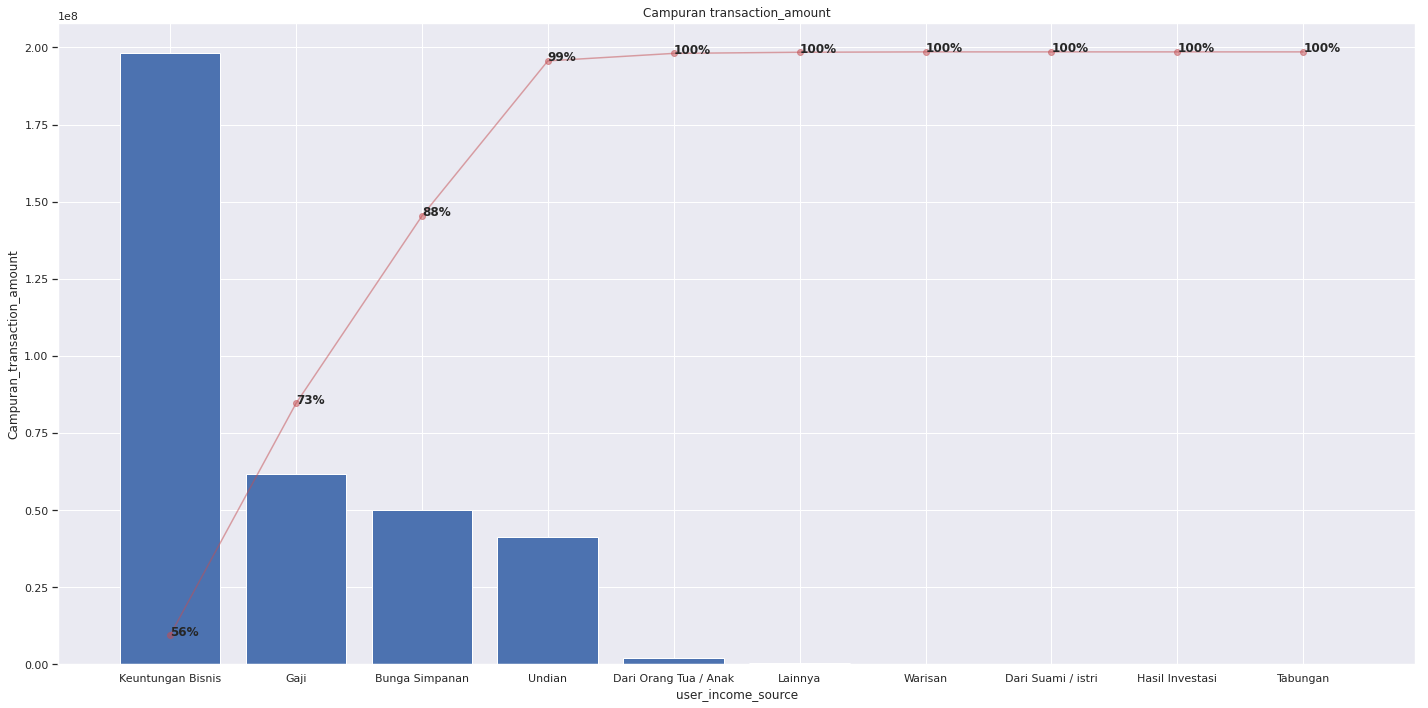

In [ ]:
def pareto_plot(ms4, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = ms4.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(ms4, x='user_income_source', y='Campuran_transaction_amount', title='Campuran transaction_amount')


#milestone 2

# K-Means

In [ ]:
merge_1.describe().round(2)

user_age    Saham_AUM  Saham_transaction_amount  Pasar_Uang_AUM  \
count  158811.00    158811.00                 158811.00    1.588110e+05   
mean       27.20    297497.81                   7110.49    6.955849e+05   
std         8.58   1770372.24                 271019.99    1.284331e+07   
min        17.00         0.00              -11766799.00    0.000000e+00   
25%        21.00         0.00                      0.00    0.000000e+00   
50%        25.00     10083.00                      0.00    1.001900e+04   
75%        31.00    100506.00                      0.00    1.001110e+05   
max        83.00  64454332.00               50000000.00    1.016171e+09   

       Pasar_Uang_invested_amount  Pasar_Uang_transaction_amount  \
count                1.588110e+05                   1.588110e+05   
mean                 6.940755e+05                   1.705964e+04   
std                  1.281471e+07                   1.301468e+06   
min                  0.000000e+00                  -1.850000e+08   
25%                  0.000000e+00                   0.000000e+00   
50%                  1.000000e+04                   0.000000e+00   
75%                  1.000000e+05                   0.000000e+00   
max                  1.012200e+09                   2.892000e+08   

       Pendapatan_Tetap_AUM  Pendapatan_Tetap_invested_amount  \
count          1.588110e+05                      1.588110e+05   
mean           1.193030e+06                      1.189113e+06   
std            1.921726e+07                      1.913287e+07   
min            0.000000e+00                      0.000000e+00   
25%            0.000000e+00                      0.000000e+00   
50%            2.501700e+04                      2.500000e+04   
75%            1.101590e+05                      1.100000e+05   
max            9.797670e+08                      9.700000e+08   

       Saham_invested_amount  Pendapatan_Tetap_transaction_amount  \
count              158811.00                         1.588110e+05   
mean               296057.59                         3.640097e+04   
std               1759649.37                         2.346995e+06   
min                     0.00                        -9.271240e+07   
25%                     0.00                         0.000000e+00   
50%                 10000.00                         0.000000e+00   
75%                100000.00                         0.000000e+00   
max              61840000.00                         4.000000e+08   

       Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  \
count  1.588110e+05              1.588110e+05                    158811.00   
mean   2.532126e+05              2.632041e+05                      2227.48   
std    4.573587e+06              4.815056e+06                    289253.59   
min    0.000000e+00              0.000000e+00                 -50000000.00   
25%    0.000000e+00              0.000000e+00                         0.00   
50%    0.000000e+00              0.000000e+00                         0.00   
75%    0.000000e+00              0.000000e+00                         0.00   
max    2.878238e+08              3.000000e+08                  50000000.00   

            week     month  profit_saham  profit_pendapatan_tetap  \
count  158811.00  158811.0     158811.00                158811.00   
mean       36.67       8.8       1440.22                  3916.44   
std         1.94       0.4      30240.93                 99208.32   
min        31.00       8.0   -1206213.00              -1379176.00   
25%        35.00       9.0          0.00                     0.00   
50%        37.00       9.0          0.00                     0.00   
75%        38.00       9.0        478.00                   160.00   
max        39.00       9.0    2614332.00               9766956.00   

       profit_pasar_uang  profit_campuran       profit  
count          158811.00        158811.00    158811.00  
mean             1509.47         -9991.52     -3125.39  
std            

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
from yellowbrick.cluster import SilhouetteVisualizer    

In [ ]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   user_gender                          158811 non-null  object        
 2   user_age                             158811 non-null  int64         
 3   user_occupation                      158811 non-null  object        
 4   user_income_range                    158811 non-null  object        
 5   user_income_source                   158811 non-null  object        
 6   date                                 158811 non-null  datetime64[ns]
 7   unique_value                         158811 non-null  object        
 8   Saham_AUM                            158811 non-null  float64       
 9   Saham_transaction_amount             158811 non-null  float64       
 

In [ ]:
merge_1['transaction']=(merge_1['Saham_transaction_amount']+merge_1['Pendapatan_Tetap_transaction_amount']+merge_1['Pasar_Uang_transaction_amount']+merge_1['Campuran_transaction_amount'])

In [ ]:
merge_1

user_id user_gender  user_age user_occupation  \
0       3816789      Female        53             IRT   
1       3816789      Female        53             IRT   
2       3816789      Female        53             IRT   
3       3816789      Female        53             IRT   
4       3816789      Female        53             IRT   
...         ...         ...       ...             ...   
158806  3881981      Female        49       Pengusaha   
158807  3881981      Female        49       Pengusaha   
158808  3881981      Female        49       Pengusaha   
158809  3881981      Female        49       Pengusaha   
158810  3881981      Female        49       Pengusaha   

               user_income_range user_income_source       date  \
0        > Rp 50 Juta - 100 Juta               Gaji 2021-08-17   
1        > Rp 50 Juta - 100 Juta               Gaji 2021-08-18   
2        > Rp 50 Juta - 100 Juta               Gaji 2021-08-19   
3        > Rp 50 Juta - 100 Juta               Gaji 2021-08-20   
4        > Rp 50 Juta - 100 Juta               Gaji 2021-08-23   
...                          ...                ...        ...   
158806  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis 2021-09-24   
158807  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis 2021-09-27   
158808  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis 2021-09-28   
158809  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis 2021-09-29   
158810  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis 2021-09-30   

              unique_value   Saham_AUM  Saham_transaction_amount  \
0       3816789 17-08-2021    189109.0                       0.0   
1       3816789 18-08-2021    188542.0                       0.0   
2       3816789 19-08-2021    185228.0                       0.0   
3       3816789 20-08-2021    184354.0                       0.0   
4       3816789 23-08-2021    186365.0                       0.0   
...                    ...         ...                       ...   
158806  3881981 24-09-2021   9900685.0                       0.0   
158807  3881981 27-09-2021   9911149.0                       0.0   
158808  3881981 28-09-2021  10018447.0                       0.0   
158809  3881981 29-09-2021  20161402.0                10000000.0   
158810  3881981 30-09-2021  20552649.0                       0.0   

        Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0              40012.0                     40000.0   
1              40022.0                     40000.0   
2              40028.0                     40000.0   
3              40034.0                     40000.0   
4              40047.0                     40000.0   
...                ...                         ...   
158806      10112541.0                  10100000.0   
158807      10116412.0                  10100000.0   
158808      10117871.0                  10100000.0   
158809      10119204.0                  10100000.0   
158810      10120409.0                  10100000.0   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 0.0              270084.0   
1                                 0.0              270399.0   
2                                 0.0              270426.0   
3                                 0.0              270175.0   
4                                 0.0              270315.0   
...                               ...                   ...   
158806                            0.0            40989215.0   
158807                            0.0            41010237.0   
158808                            0.0            41013869.0   
158809                            0.0            40998525.0   
158810                            0.0            40973968.0   

        Pendapatan_Tetap_invested_amount  Saham_invested_amount  \
0                               270000.0               190000.0   
1                               270000.0               190000.0   
2                               270000.0               190000.0   
3                               270000.

In [ ]:
df_clust = merge_1.copy()

In [ ]:
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   user_gender                          158811 non-null  object        
 2   user_age                             158811 non-null  int64         
 3   user_occupation                      158811 non-null  object        
 4   user_income_range                    158811 non-null  object        
 5   user_income_source                   158811 non-null  object        
 6   date                                 158811 non-null  datetime64[ns]
 7   unique_value                         158811 non-null  object        
 8   Saham_AUM                            158811 non-null  float64       
 9   Saham_transaction_amount             158811 non-null  float64       
 

In [ ]:
df_clust['user_id'] = df_clust['user_id'].astype(int)


In [ ]:
df_clust1 =pd.get_dummies(data=df_clust,columns=['user_occupation','user_income_range','user_income_source','user_gender'])
df_clust1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 51 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   user_id                                     158811 non-null  int64         
 1   user_age                                    158811 non-null  int64         
 2   date                                        158811 non-null  datetime64[ns]
 3   unique_value                                158811 non-null  object        
 4   Saham_AUM                                   158811 non-null  float64       
 5   Saham_transaction_amount                    158811 non-null  float64       
 6   Pasar_Uang_AUM                              158811 non-null  float64       
 7   Pasar_Uang_invested_amount                  158811 non-null  float64       
 8   Pasar_Uang_transaction_amount               158811 non-null  float64      

In [ ]:
df_clust1.drop(columns=['unique_value','date'], inplace=True)
df_clust1

user_id  user_age   Saham_AUM  Saham_transaction_amount  \
0       3816789        53    189109.0                       0.0   
1       3816789        53    188542.0                       0.0   
2       3816789        53    185228.0                       0.0   
3       3816789        53    184354.0                       0.0   
4       3816789        53    186365.0                       0.0   
...         ...       ...         ...                       ...   
158806  3881981        49   9900685.0                       0.0   
158807  3881981        49   9911149.0                       0.0   
158808  3881981        49  10018447.0                       0.0   
158809  3881981        49  20161402.0                10000000.0   
158810  3881981        49  20552649.0                       0.0   

        Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0              40012.0                     40000.0   
1              40022.0                     40000.0   
2              40028.0                     40000.0   
3              40034.0                     40000.0   
4              40047.0                     40000.0   
...                ...                         ...   
158806      10112541.0                  10100000.0   
158807      10116412.0                  10100000.0   
158808      10117871.0                  10100000.0   
158809      10119204.0                  10100000.0   
158810      10120409.0                  10100000.0   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 0.0              270084.0   
1                                 0.0              270399.0   
2                                 0.0              270426.0   
3                                 0.0              270175.0   
4                                 0.0              270315.0   
...                               ...                   ...   
158806                            0.0            40989215.0   
158807                            0.0            41010237.0   
158808                            0.0            41013869.0   
158809                            0.0            40998525.0   
158810                            0.0            40973968.0   

        Pendapatan_Tetap_invested_amount  Saham_invested_amount  \
0                               270000.0               190000.0   
1                               270000.0               190000.0   
2                               270000.0               190000.0   
3                               270000.0               190000.0   
4                               270000.0               190000.0   
...                                  ...                    ...   
158806                        41000000.0             10000000.0   
158807                        41000000.0             10000000.0   
158808                        41000000.0             10000000.0   
158809                        41000000.0             20000000.0   
158810                        41000000.0             20000000.0   

        Pendapatan_Tetap_transaction_amount  Campuran_AUM  \
0                                       0.0           0.0   
1                                       0.0           0.0   
2                                       0.0           0.0   
3                                       0.0           0.0   
4                                       0.0           0.0   
...                                     ...           ...   
158806                                  0.0           0.0   
158807                                  0.0           0.0   
158808                                  0.0           0.0   
158809                                  0.0           0.0   
158810                                  0.0           0.0   

        Campuran_invested_amount  Campuran_transaction_amount  week  month  \
0                            0.0                          0.0    33      8   
1                            0.0                          0.0    33      8   
2                        

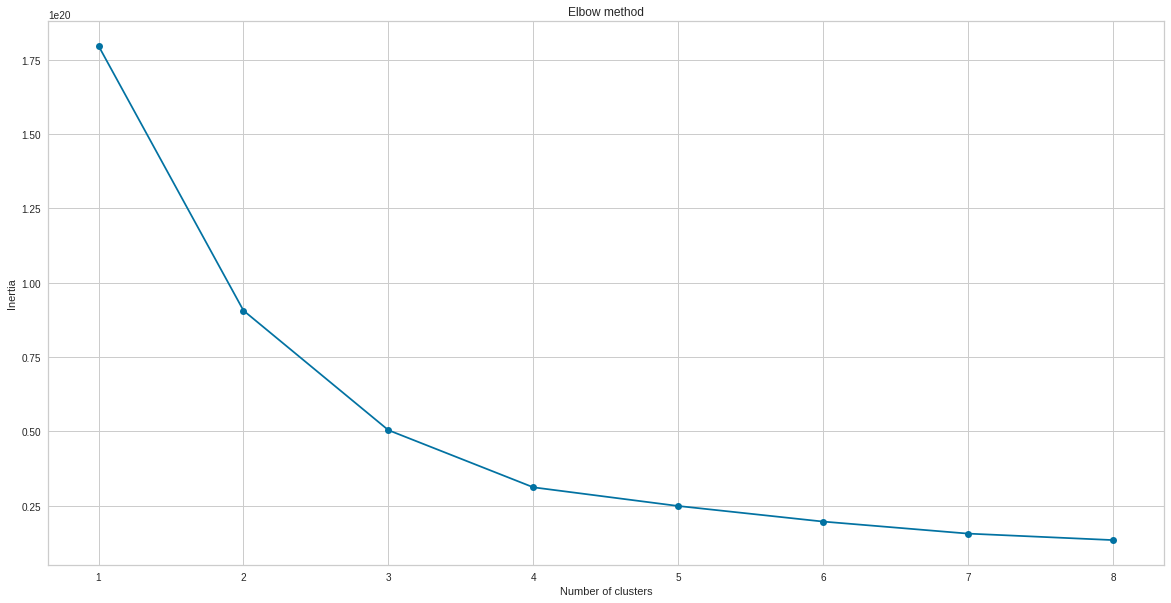

In [ ]:
inertias = []
fig = plt.figure(figsize=(20,10))

for i in range(1,9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_clust1)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,9), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(df_clust1)
df_clust1['Cluster']=kmeans.labels_


In [ ]:
df_clust1.describe()

user_id       user_age     Saham_AUM  Saham_transaction_amount  \
count  1.588110e+05  158811.000000  1.588110e+05              1.588110e+05   
mean   3.586427e+06      27.201774  2.974978e+05              7.110494e+03   
std    7.782985e+05       8.579667  1.770372e+06              2.710200e+05   
min    5.070100e+04      17.000000  0.000000e+00             -1.176680e+07   
25%    3.747364e+06      21.000000  0.000000e+00              0.000000e+00   
50%    3.823361e+06      25.000000  1.008300e+04              0.000000e+00   
75%    3.926861e+06      31.000000  1.005060e+05              0.000000e+00   
max    4.165830e+06      83.000000  6.445433e+07              5.000000e+07   

       Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
count    1.588110e+05                1.588110e+05   
mean     6.955849e+05                6.940755e+05   
std      1.284331e+07                1.281471e+07   
min      0.000000e+00                0.000000e+00   
25%      0.000000e+00                0.000000e+00   
50%      1.001900e+04                1.000000e+04   
75%      1.001110e+05                1.000000e+05   
max      1.016171e+09                1.012200e+09   

       Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
count                   1.588110e+05          1.588110e+05   
mean                    1.705964e+04          1.193030e+06   
std                     1.301468e+06          1.921726e+07   
min                    -1.850000e+08          0.000000e+00   
25%                     0.000000e+00          0.000000e+00   
50%                     0.000000e+00          2.501700e+04   
75%                     0.000000e+00          1.101590e+05   
max                     2.892000e+08          9.797670e+08   

       Pendapatan_Tetap_invested_amount  Saham_invested_amount  \
count                      1.588110e+05           1.588110e+05   
mean                       1.189113e+06           2.960576e+05   
std                        1.913287e+07           1.759649e+06   
min                        0.000000e+00           0.000000e+00   
25%                        0.000000e+00           0.000000e+00   
50%                        2.500000e+04           1.000000e+04   
75%                        1.100000e+05           1.000000e+05   
max                        9.700000e+08           6.184000e+07   

       Pendapatan_Tetap_transaction_amount  Campuran_AUM  \
count                         1.588110e+05  1.588110e+05   
mean                          3.640097e+04  2.532126e+05   
std                           2.346995e+06  4.573587e+06   
min                          -9.271240e+07  0.000000e+00   
25%                           0.000000e+00  0.000000e+00   
50%                           0.000000e+00  0.000000e+00   
75%                           0.000000e+00  0.000000e+00   
max                           4.000000e+08  2.878238e+08   

       Campuran_invested_amount  Campuran_transaction_amount           week  \
count              1.588110e+05                 1.588110e+05  158811.000000   
mean               2.632041e+05                 2.227484e+03      36.665886   
std                4.815056e+06                 2.892536e+05       1.937605   
min                0.000000e+00                -5.000000e+07      31.000000   
25%                0.000000e+00                 0.000000e+00      35.000000   
50%                0.000000e+00                 0.000000e+00      37.000000   
75%                0.000000e+00                 0.000000e+00      38.000000   
max                3.000000e+08                 5.000000e+07      39.000000   

               month  profit_saham  profit_pendapatan_tetap  \
count  158811.000000  1.588110e+05             1.588110e+05   
mean        8.804516  1.440224e+03             3.916442e+03   
std         0.396574  3.024093e+04             9.920832e+04   
min         8.000000 -1.206213e+06            -1.379176e+06   
25%         9.000000  0.000000e+00             0.000000e+00   
50%         9.000000  0.000000e+00            

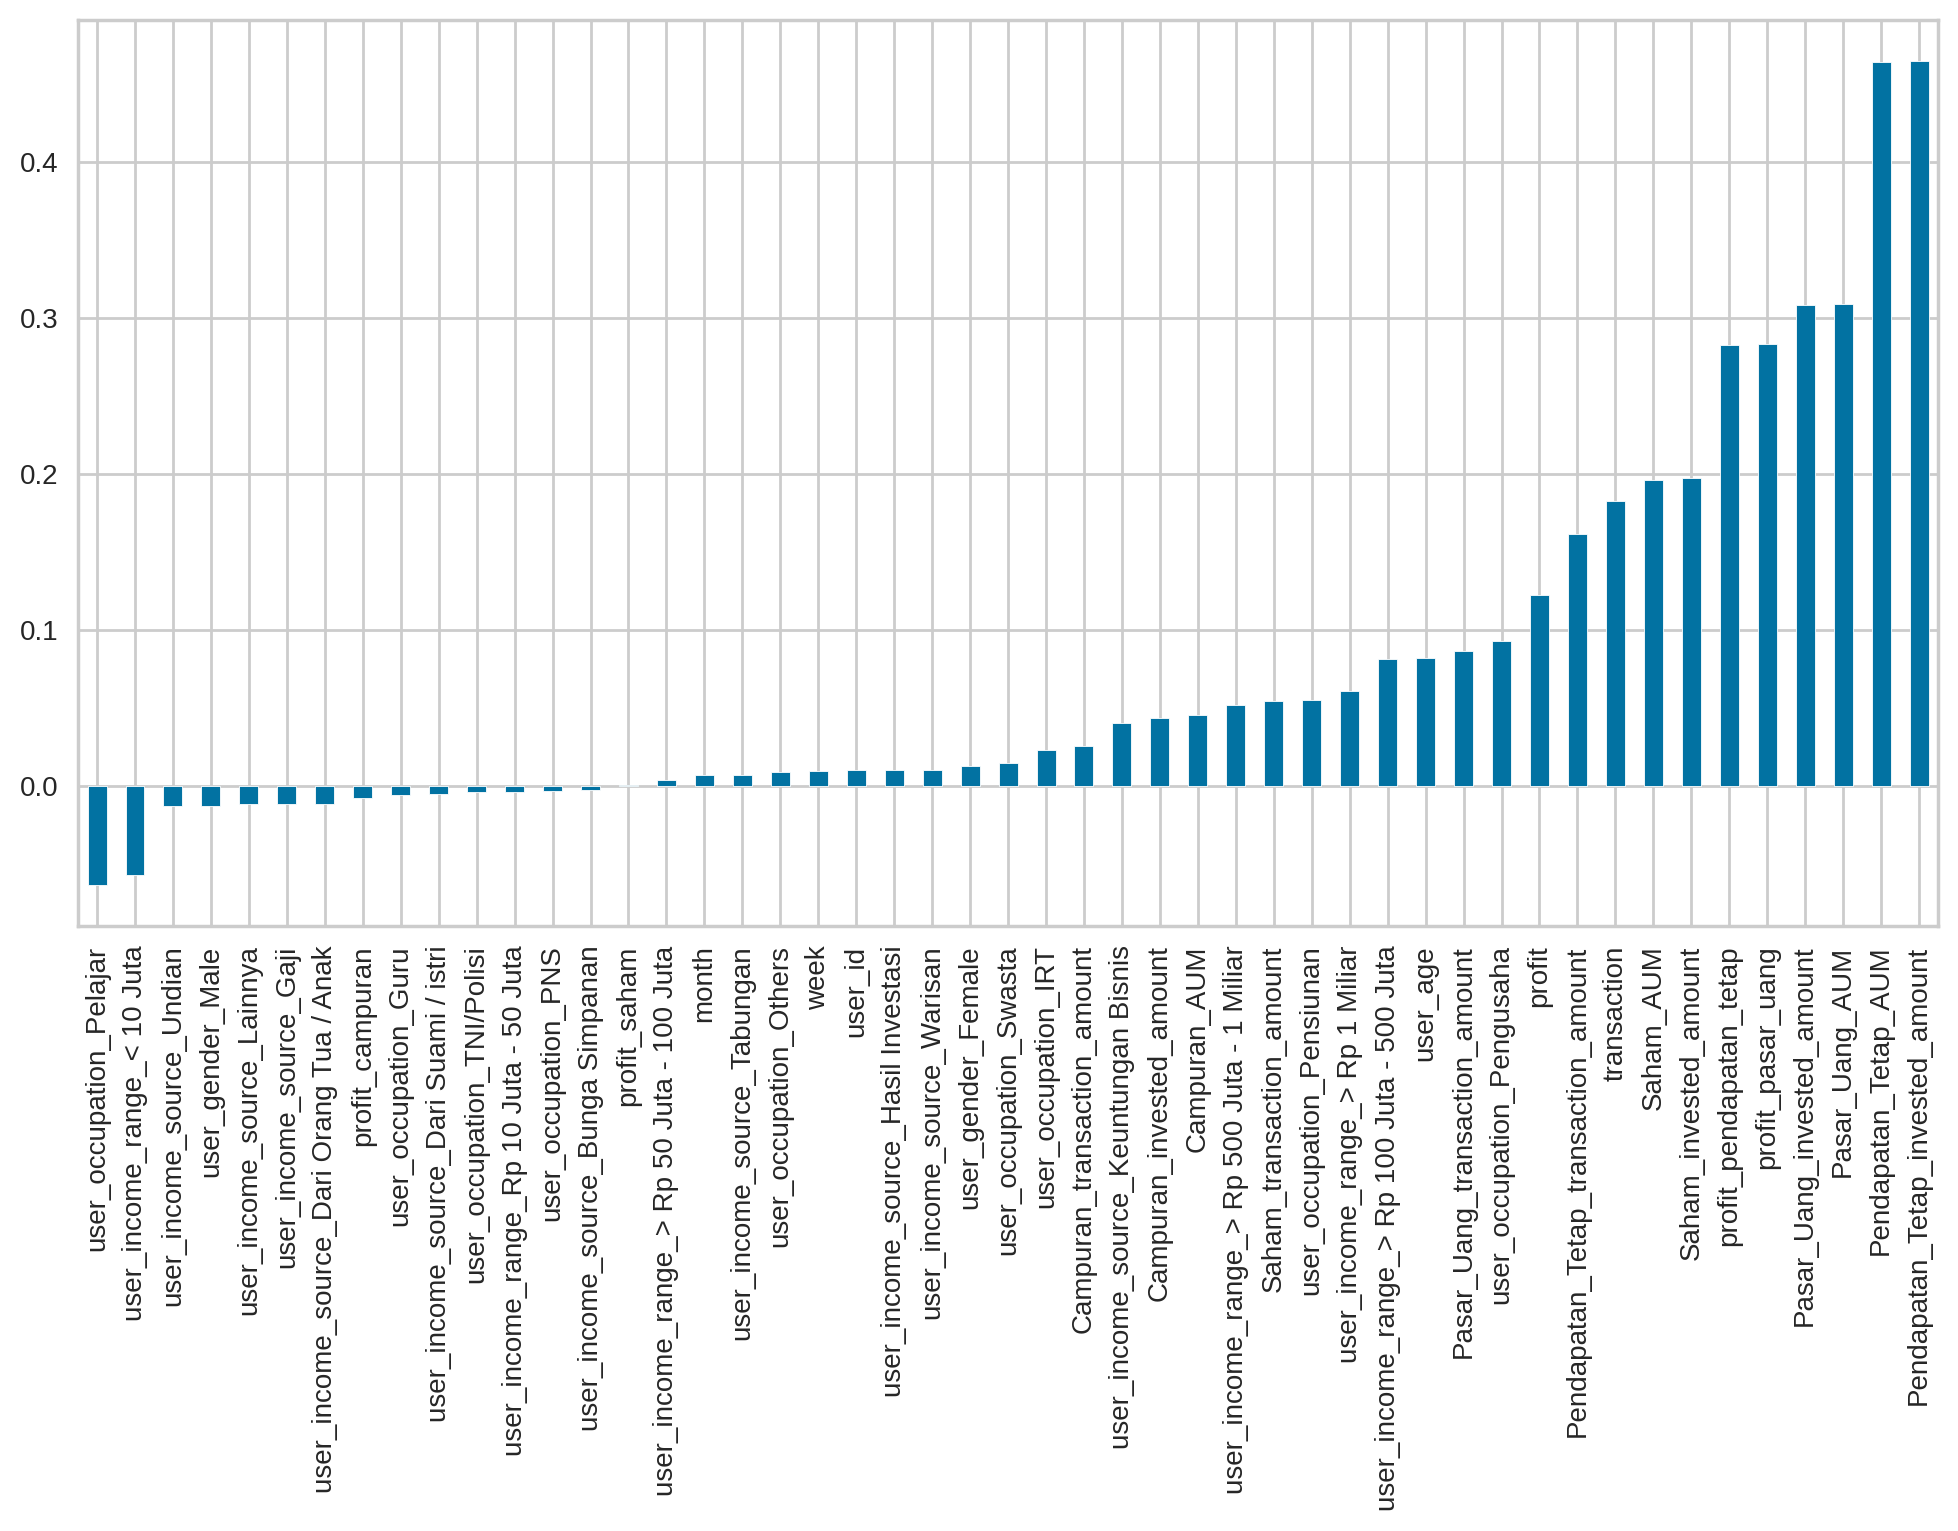

In [ ]:
#Correlation
plt.figure(figsize=(12,6),dpi=200)
df_clust1.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [ ]:
!gdown --id '15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l'
from silhoutte import silhoutte_analysis

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l
To: /content/silhoutte.py
100% 4.34k/4.34k [00:00<00:00, 6.38MB/s]


In [ ]:
avg = df_clust1.groupby(['Cluster'],as_index=False).mean()
avg.round(2)

Cluster     user_id  user_age   Saham_AUM  Saham_transaction_amount  \
0        0  3585859.40     27.15   272737.56                   6050.27   
1        1  3749418.86     29.96        0.00                      0.00   
2        2  3902455.00     30.00        0.00                      0.00   
3        3  3658427.46     36.80  5596036.47                 236446.37   
4        4  3832936.97     39.58  4221139.24                 155660.38   

   Pasar_Uang_AUM  Pasar_Uang_invested_amount  Pasar_Uang_transaction_amount  \
0    3.824523e+05                3.816554e+05                        8402.49   
1    0.000000e+00                0.000000e+00                           0.00   
2    9.799041e+08                9.777714e+08                    20657142.86   
3    2.718917e+07                2.713118e+07                     1006163.40   
4    1.077476e+08                1.074595e+08                     2642225.99   

   Pendapatan_Tetap_AUM  Pendapatan_Tetap_invested_amount  \
0          3.922668e+05                      3.912230e+05   
1          8.763147e+08                      8.721432e+08   
2          0.000000e+00                      0.000000e+00   
3          6.998113e+07                      6.978129e+07   
4          3.015198e+08                      3.006633e+08   

   Saham_invested_amount  Pendapatan_Tetap_transaction_amount  Campuran_AUM  \
0              271295.04                              7269.95     239523.34   
1                   0.00                          20000000.00          0.00   
2                   0.00                                 0.00          0.00   
3             5597006.54                           2624448.48    2386177.31   
4             4206981.13                          16696698.11    7475987.72   

   Campuran_invested_amount  Campuran_transaction_amount   week  month  \
0                 249397.17                      1726.65  36.66   8.80   
1                      0.00                         0.00  36.38   8.79   
2                      0.00                         0.00  37.19   9.00   
3                2400496.99                     91867.47  36.91   8.84   
4                7641509.43                    188679.25  37.02   8.82   

   profit_saham  profit_pendapatan_tetap  profit_pasar_uang  profit_campuran  \
0       1442.52                  1043.87             796.93         -9873.83   
1          0.00               4171516.54               0.00             0.00   
2          0.00                     0.00         2132664.14             0.00   
3       -970.07                199834.54           57994.92        -14319.67   
4      14158.10                856470.42          288113.40       -165521.72   

       profit  transaction  user_occupation_Guru  user_occupation_IRT  \
0    -6590.52     23449.36                  0.01                 0.05   
1  4171516.54  20000000.00                  0.00                 0.00   
2  2132664.14  20657142.86                  0.00                 1.00   
3   242539.71   3958925.72                  0.00                 0.09   
4   993220.20  19683263.73                  0.00                 0.19   

   user_occupation_Others  user_occupation_PNS  user_occupation_Pelajar  \
0                    0.10                 0.02                     0.56   
1                    0.00                 0.00                     0.00   
2                    0.00                 0.00                     0.00   
3                    0.17                 0.01                     0.15   
4                    0.00                 0.00                     0.00   

   user_occupation_Pengusaha  user_occupation_Pensiunan  \
0                       0.04                       0.00   
1                       0.00                       0.00   
2                       0.00                       0.00   
3                       0.27                       0.03   
4                       0.42                       0.00   

   user_occupation_Swasta  user_occupation_TNI/Polisi  \
0      

In [ ]:
   avg.to_csv("tes1.csv")

In [ ]:
Total_Revenue = df_clust1['transaction'].groupby(df_clust1['Cluster']).sum().reset_index()
Total_Revenue.round(2)

Cluster   transaction
0        0  3.704154e+09
1        1  1.120000e+09
2        2  4.338000e+08
3        3  2.628727e+09
4        4  2.086426e+09

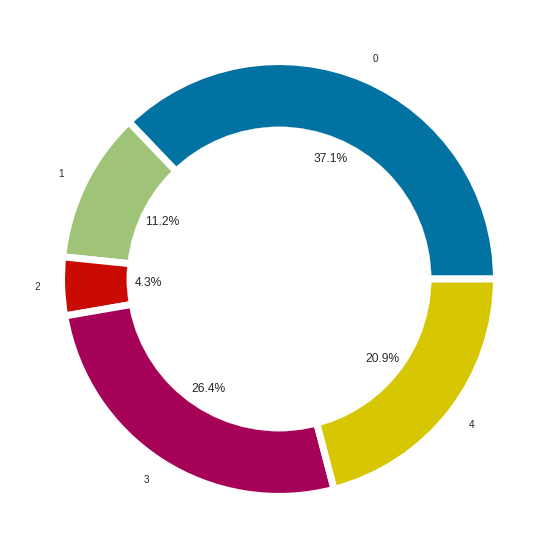

In [ ]:
#Revenue Chart
names = Total_Revenue['Cluster']
size = Total_Revenue['transaction']
plt.figure(figsize=(20, 10))
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names,
        autopct="%.1f%%",wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


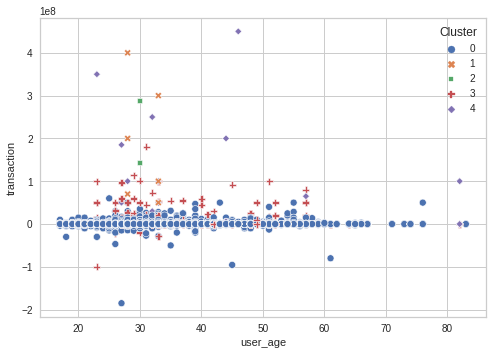

In [ ]:
sb.scatterplot(data=df_clust1, x='user_age', y='transaction',hue='Cluster',style='Cluster', palette='deep')

In [ ]:
df_clust1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 50 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   user_id                                     158811 non-null  int64  
 1   user_age                                    158811 non-null  int64  
 2   Saham_AUM                                   158811 non-null  float64
 3   Saham_transaction_amount                    158811 non-null  float64
 4   Pasar_Uang_AUM                              158811 non-null  float64
 5   Pasar_Uang_invested_amount                  158811 non-null  float64
 6   Pasar_Uang_transaction_amount               158811 non-null  float64
 7   Pendapatan_Tetap_AUM                        158811 non-null  float64
 8   Pendapatan_Tetap_invested_amount            158811 non-null  float64
 9   Saham_invested_amount                       158811 non-null  float64
 

#handling outlier

In [ ]:
dfout = df_clust1[df_clust1.Cluster == 1]
dfout

user_id  user_age  Saham_AUM  Saham_transaction_amount  \
107988  3764129        28        0.0                       0.0   
107989  3764129        28        0.0                       0.0   
107990  3764129        28        0.0                       0.0   
107991  3764129        28        0.0                       0.0   
107992  3764129        28        0.0                       0.0   
107993  3764129        28        0.0                       0.0   
107994  3764129        28        0.0                       0.0   
107995  3764129        28        0.0                       0.0   
107996  3764129        28        0.0                       0.0   
107997  3764129        28        0.0                       0.0   
107998  3764129        28        0.0                       0.0   
107999  3764129        28        0.0                       0.0   
108000  3764129        28        0.0                       0.0   
108001  3764129        28        0.0                       0.0   
108002  3764129        28        0.0                       0.0   
108003  3764129        28        0.0                       0.0   
108004  3764129        28        0.0                       0.0   
108005  3764129        28        0.0                       0.0   
108006  3764129        28        0.0                       0.0   
108007  3764129        28        0.0                       0.0   
108008  3764129        28        0.0                       0.0   
108009  3764129        28        0.0                       0.0   
108010  3764129        28        0.0                       0.0   
108011  3764129        28        0.0                       0.0   
108012  3764129        28        0.0                       0.0   
108013  3764129        28        0.0                       0.0   
108014  3764129        28        0.0                       0.0   
108015  3764129        28        0.0                       0.0   
108016  3764129        28        0.0                       0.0   
108017  3764129        28        0.0                       0.0   
108018  3764129        28        0.0                       0.0   
108019  3764129        28        0.0                       0.0   
108020  3764129        28        0.0                       0.0   
108021  3764129        28        0.0                       0.0   
132909  3726685        33        0.0                       0.0   
132910  3726685        33        0.0                       0.0   
132911  3726685        33        0.0                       0.0   
132912  3726685        33        0.0                       0.0   
132913  3726685        33        0.0                       0.0   
132914  3726685        33        0.0                       0.0   
132915  3726685        33        0.0                       0.0   
132916  3726685        33        0.0                       0.0   
132917  3726685        33        0.0                       0.0   
132918  3726685        33        0.0                       0.0   
132919  3726685        33        0.0                       0.0   
132920  3726685        33        0.0                       0.0   
132921  3726685        33        0.0                       0.0   
132922  3726685        33        0.0                       0.0   
132923  3726685        33        0.0                       0.0   
132924  3726685        33        0.0                       0.0   
132925  3726685        33        0.0                       0.0   
132926  3726685        33        0.0                       0.0   
132927  3726685        33        0.0                       0.0   
132928  3726685        33        0.0                       0.0   
132929  3726685        33        0.0                       0.0   
132930  3726685        33        0.0                       0.0   

        Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
107988             0.0                         0.0   
107989             0.0                         0.0   
107990             0.0                         0.0   
107991             0.0       

In [ ]:
# 3902455
# 3726685
# 3764129
df_filtered = df_clust1[df_clust1['user_id'] != 3902455]
df_filtered1= df_filtered[df_filtered['user_id'] != 3726685]
df_filtered2= df_filtered1[df_filtered1['user_id'] != 3764129]

df_clean=df_filtered2

In [ ]:
df_clean.drop(columns=['user_id'], inplace=True)
df_clean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


user_age   Saham_AUM  Saham_transaction_amount  Pasar_Uang_AUM  \
0             53    189109.0                       0.0         40012.0   
1             53    188542.0                       0.0         40022.0   
2             53    185228.0                       0.0         40028.0   
3             53    184354.0                       0.0         40034.0   
4             53    186365.0                       0.0         40047.0   
...          ...         ...                       ...             ...   
158806        49   9900685.0                       0.0      10112541.0   
158807        49   9911149.0                       0.0      10116412.0   
158808        49  10018447.0                       0.0      10117871.0   
158809        49  20161402.0                10000000.0      10119204.0   
158810        49  20552649.0                       0.0      10120409.0   

        Pasar_Uang_invested_amount  Pasar_Uang_transaction_amount  \
0                          40000.0                            0.0   
1                          40000.0                            0.0   
2                          40000.0                            0.0   
3                          40000.0                            0.0   
4                          40000.0                            0.0   
...                            ...                            ...   
158806                  10100000.0                            0.0   
158807                  10100000.0                            0.0   
158808                  10100000.0                            0.0   
158809                  10100000.0                            0.0   
158810                  10100000.0                            0.0   

        Pendapatan_Tetap_AUM  Pendapatan_Tetap_invested_amount  \
0                   270084.0                          270000.0   
1                   270399.0                          270000.0   
2                   270426.0                          270000.0   
3                   270175.0                          270000.0   
4                   270315.0                          270000.0   
...                      ...                               ...   
158806            40989215.0                        41000000.0   
158807            41010237.0                        41000000.0   
158808            41013869.0                        41000000.0   
158809            40998525.0                        41000000.0   
158810            40973968.0                        41000000.0   

        Saham_invested_amount  Pendapatan_Tetap_transaction_amount  \
0                    190000.0                                  0.0   
1                    190000.0                                  0.0   
2                    190000.0                                  0.0   
3                    190000.0                                  0.0   
4                    190000.0                                  0.0   
...                       ...                                  ...   
158806             10000000.0                                  0.0   
158807             10000000.0                                  0.0   
158808             10000000.0                                  0.0   
158809             20000000.0                                  0.0   
158810             20000000.0                                  0.0   

        Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  \
0                0.0                       0.0                          0.0   
1                0.0                       0.0                          0.0   
2                0.0                       0.0                          0.0   
3                0.0                       0.0                          0.0   
4                0.0                       0.0                          0.0   
...              ...                       ...                          ...   
158806           0.0                       0.0                          0.0   
158807           0.0    

In [ ]:
df_clean.describe()

user_age     Saham_AUM  Saham_transaction_amount  Pasar_Uang_AUM  \
count  158715.000000  1.587150e+05              1.587150e+05    1.587150e+05   
mean       27.199830  2.976778e+05              7.114794e+03    5.663520e+05   
std         8.581723  1.770892e+06              2.711019e+05    6.070891e+06   
min        17.000000  0.000000e+00             -1.176680e+07    0.000000e+00   
25%        21.000000  0.000000e+00              0.000000e+00    0.000000e+00   
50%        25.000000  1.008500e+04              0.000000e+00    1.001900e+04   
75%        31.000000  1.005265e+05              0.000000e+00    1.001110e+05   
max        83.000000  6.445433e+07              5.000000e+07    4.504239e+08   

       Pasar_Uang_invested_amount  Pasar_Uang_transaction_amount  \
count                1.587150e+05                   1.587150e+05   
mean                 5.651238e+05                   1.433676e+04   
std                  6.057211e+06                   1.017951e+06   
min                  0.000000e+00                  -1.850000e+08   
25%                  0.000000e+00                   0.000000e+00   
50%                  1.000000e+04                   0.000000e+00   
75%                  1.000000e+05                   0.000000e+00   
max                  4.500000e+08                   1.850760e+08   

       Pendapatan_Tetap_AUM  Pendapatan_Tetap_invested_amount  \
count          1.587150e+05                      1.587150e+05   
mean           8.728357e+05                      8.703980e+05   
std            9.613273e+06                      9.586089e+06   
min            0.000000e+00                      0.000000e+00   
25%            0.000000e+00                      0.000000e+00   
50%            2.500900e+04                      2.500000e+04   
75%            1.101290e+05                      1.100000e+05   
max            4.514819e+08                      4.500000e+08   

       Saham_invested_amount  Pendapatan_Tetap_transaction_amount  \
count           1.587150e+05                         1.587150e+05   
mean            2.962367e+05                         2.653734e+04   
std             1.760166e+06                         1.818806e+06   
min             0.000000e+00                        -9.271240e+07   
25%             0.000000e+00                         0.000000e+00   
50%             1.000000e+04                         0.000000e+00   
75%             1.000000e+05                         0.000000e+00   
max             6.184000e+07                         3.980000e+08   

       Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  \
count  1.587150e+05              1.587150e+05                 1.587150e+05   
mean   2.533657e+05              2.633633e+05                 2.228831e+03   
std    4.574966e+06              4.816507e+06                 2.893411e+05   
min    0.000000e+00              0.000000e+00                -5.000000e+07   
25%    0.000000e+00              0.000000e+00                 0.000000e+00   
50%    0.000000e+00              0.000000e+00                 0.000000e+00   
75%    0.000000e+00              0.000000e+00                 0.000000e+00   
max    2.878238e+08              3.000000e+08                 5.000000e+07   

                week          month  profit_saham  profit_pendapatan_tetap  \
count  158715.000000  158715.000000  1.587150e+05             1.587150e+05   
mean       36.666345       8.804593  1.441095e+03             2.437702e+03   
std         1.937392       0.396515  3.025006e+04             3.554920e+04   
min        31.000000       8.000000 -1.206213e+06            -1.379176e+06   
25%        35.000000       9.000000  0.000000e+00             0.000000e+00   
50%        37.000000       9.000000  0.000000e+00             0.000000e+00   
75%        38.000000       9.000000  4.790000e+02             1.600000e+02   
max        39.000000       9.000000  2.614332e+06             2.324246e+06   

       profit_pasar_uang  profit_campuran        profit   transa

In [ ]:
df_clean

user_age   Saham_AUM  Saham_transaction_amount  Pasar_Uang_AUM  \
0             53    189109.0                       0.0         40012.0   
1             53    188542.0                       0.0         40022.0   
2             53    185228.0                       0.0         40028.0   
3             53    184354.0                       0.0         40034.0   
4             53    186365.0                       0.0         40047.0   
...          ...         ...                       ...             ...   
158806        49   9900685.0                       0.0      10112541.0   
158807        49   9911149.0                       0.0      10116412.0   
158808        49  10018447.0                       0.0      10117871.0   
158809        49  20161402.0                10000000.0      10119204.0   
158810        49  20552649.0                       0.0      10120409.0   

        Pasar_Uang_invested_amount  Pasar_Uang_transaction_amount  \
0                          40000.0                            0.0   
1                          40000.0                            0.0   
2                          40000.0                            0.0   
3                          40000.0                            0.0   
4                          40000.0                            0.0   
...                            ...                            ...   
158806                  10100000.0                            0.0   
158807                  10100000.0                            0.0   
158808                  10100000.0                            0.0   
158809                  10100000.0                            0.0   
158810                  10100000.0                            0.0   

        Pendapatan_Tetap_AUM  Pendapatan_Tetap_invested_amount  \
0                   270084.0                          270000.0   
1                   270399.0                          270000.0   
2                   270426.0                          270000.0   
3                   270175.0                          270000.0   
4                   270315.0                          270000.0   
...                      ...                               ...   
158806            40989215.0                        41000000.0   
158807            41010237.0                        41000000.0   
158808            41013869.0                        41000000.0   
158809            40998525.0                        41000000.0   
158810            40973968.0                        41000000.0   

        Saham_invested_amount  Pendapatan_Tetap_transaction_amount  \
0                    190000.0                                  0.0   
1                    190000.0                                  0.0   
2                    190000.0                                  0.0   
3                    190000.0                                  0.0   
4                    190000.0                                  0.0   
...                       ...                                  ...   
158806             10000000.0                                  0.0   
158807             10000000.0                                  0.0   
158808             10000000.0                                  0.0   
158809             20000000.0                                  0.0   
158810             20000000.0                                  0.0   

        Campuran_AUM  Campuran_invested_amount  Campuran_transaction_amount  \
0                0.0                       0.0                          0.0   
1                0.0                       0.0                          0.0   
2                0.0                       0.0                          0.0   
3                0.0                       0.0                          0.0   
4                0.0                       0.0                          0.0   
...              ...                       ...                          ...   
158806           0.0                       0.0                          0.0   
158807           0.0    

#K-Means after outliers erased

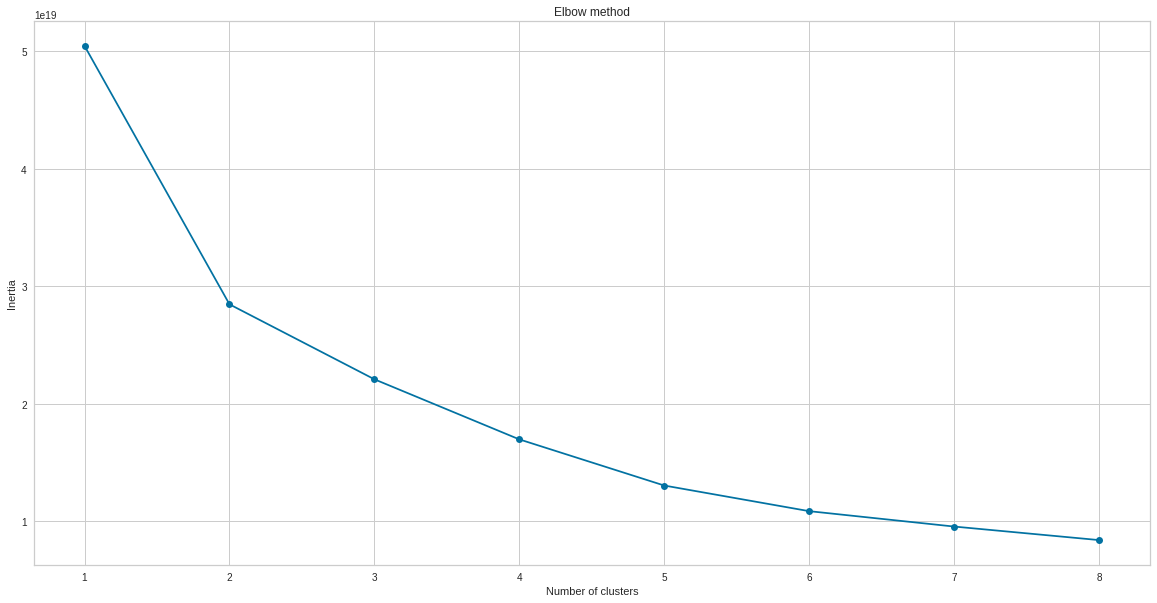

In [ ]:
inertias = []
fig = plt.figure(figsize=(20,10))

for i in range(1,9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_clean)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,9), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(df_clean)
df_clean['Cluster']=kmeans.labels_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
avg1 = df_clean.groupby(['Cluster'],as_index=False).mean()
avg1.round(2)

Cluster  user_age   Saham_AUM  Saham_transaction_amount  Pasar_Uang_AUM  \
0        0     27.14   261184.31                   5612.01    3.641159e+05   
1        1     27.97  4284326.21                  41095.89    2.211297e+08   
2        2     45.24  2442692.12                 108974.36    9.865403e+06   
3        3     37.45  7014303.16                 294410.65    1.968086e+07   

   Pasar_Uang_invested_amount  Pasar_Uang_transaction_amount  \
0                3.633582e+05                        7950.13   
1                2.205733e+08                     5426691.14   
2                9.844872e+06                      512820.51   
3                1.963883e+07                      741417.53   

   Pendapatan_Tetap_AUM  Pendapatan_Tetap_invested_amount  \
0          3.594125e+05                      3.584745e+05   
1          1.621557e+08                      1.616624e+08   
2          3.173054e+08                      3.164814e+08   
3          5.733668e+07                      5.716097e+07   

   Saham_invested_amount  Pendapatan_Tetap_transaction_amount  Campuran_AUM  \
0              259876.65                              6513.85     239784.99   
1             4246575.34                           5487638.70    7405089.11   
2             2447948.72                          16735104.33    5608823.86   
3             6988875.38                           1873528.97    1777953.25   

   Campuran_invested_amount  Campuran_transaction_amount   week  month  \
0                 249670.58                      1728.72  36.66   8.80   
1                7612102.74                         0.00  36.66   8.78   
2                5641025.64                    256410.26  37.90   9.00   
3                1789919.52                     77313.05  36.89   8.84   

   profit_saham  profit_pendapatan_tetap  profit_pasar_uang  profit_campuran  \
0       1307.65                   937.95             757.75         -9885.59   
1      37750.86                493347.23          556392.67       -207013.63   
2      -5256.60                823952.12           20530.76        -32201.78   
3      25427.78                175706.55           42031.19        -11966.27   

      profit  transaction  user_occupation_Guru  user_occupation_IRT  \
0   -6882.24     21804.71                  0.01                 0.05   
1  880477.14  10955425.73                  0.00                 0.00   
2  807024.49  17613309.46                  0.00                 0.27   
3  231199.26   2986670.20                  0.00                 0.11   

   user_occupation_Others  user_occupation_PNS  user_occupation_Pelajar  \
0                    0.10                 0.02                     0.56   
1                    0.00                 0.00                     0.26   
2                    0.00                 0.00                     0.18   
3                    0.18                 0.01                     0.14   

   user_occupation_Pengusaha  user_occupation_Pensiunan  \
0                       0.04                       0.00   
1                       0.21                       0.00   
2                       0.55                       0.00   
3                       0.22                       0.02   

   user_occupation_Swasta  user_occupation_TNI/Polisi  \
0                    0.23                         0.0   
1                    0.53                         0.0   
2                    0.00                         0.0   
3                    0.31                         0.0   

   user_income_range_< 10 Juta  user_income_range_> Rp 1 Miliar  \
0                         0.43                             0.00   
1                         0.00                             0.00   
2                         0.00                             0.00   
3                         0.06                             0.04   

   user_income_range_> Rp 100 Juta - 500 Juta  \
0                                        0.08   
1                                        0.85   
2              

In [ ]:
   avg1.to_csv("kmeans9.csv")

In [ ]:
Total_Revenue1 = df_clean['transaction'].groupby(df_clean['Cluster']).sum().reset_index()
Total_Revenue1.round(2)

Cluster   transaction
0        0  3.440239e+09
1        1  7.997461e+08
2        2  1.373838e+09
3        3  2.356483e+09

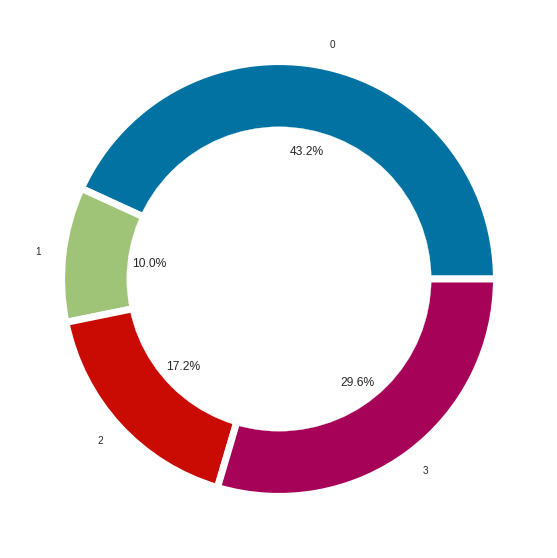

In [ ]:
#Revenue Chart
names = Total_Revenue1['Cluster']
size = Total_Revenue1['transaction']
plt.figure(figsize=(20, 10))
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names,
        autopct="%.1f%%",wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

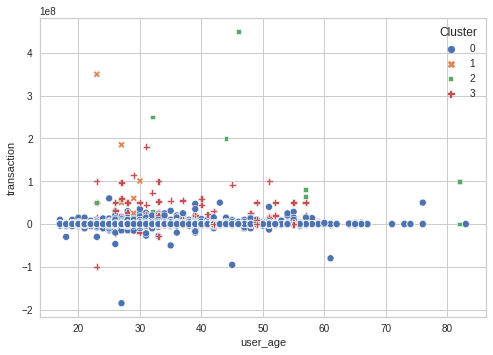

In [ ]:
sb.scatterplot(data=df_clean, x='user_age', y='transaction',hue='Cluster',style='Cluster', palette='deep')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats #<< Stats
import math
from statsmodels.stats.weightstats import ztest #<< Stats
from scipy.stats import chisquare #<< Stats

x = df_clean['user_age']
y = df_clean['transaction']

(r,p_value) = stats.pearsonr(x, y)
print('correlation: ',r)
print('p-value:', p_value.round(5))

correlation:  0.024450600047665735
p-value: 0.0


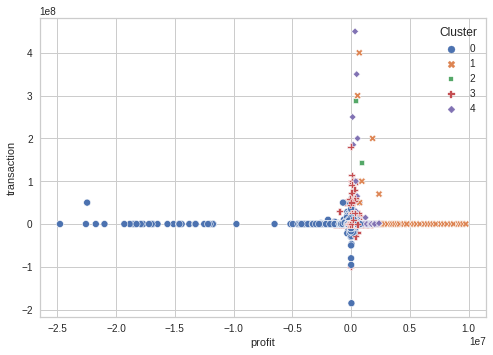

In [ ]:
sb.scatterplot(data=df_clust1, x='profit', y='transaction', hue='Cluster',style='Cluster',palette='deep')

In [ ]:
x = df_clean['profit']
y = df_clean['transaction']

(r,p_value) = stats.pearsonr(x, y)
print('correlation: ',r)
print('p-value:', p_value)

correlation:  -0.002503445626409577
p-value: 0.3185981977532634


#RFM

In [ ]:
#Importing Necessery Module
import datetime as dt
now = dt.datetime(2021,10,2)

#handling outliers

In [ ]:
# 3902455
# 3726685
# 3764129
dfr_filtered = merge_1[merge_1['user_id'] != 3902455]
dfr_filtered1= dfr_filtered[dfr_filtered['user_id'] != 3726685]
dfr_filtered2= dfr_filtered1[dfr_filtered1['user_id'] != 3764129]

merge_1=dfr_filtered2

In [ ]:
# Convert Integer value to string
merge_1['user_id'] = merge_1['user_id'].astype(str)

In [ ]:
merge_1

user_id user_gender  user_age user_occupation  \
0       3816789      Female        53             IRT   
1       3816789      Female        53             IRT   
2       3816789      Female        53             IRT   
3       3816789      Female        53             IRT   
4       3816789      Female        53             IRT   
...         ...         ...       ...             ...   
158806  3881981      Female        49       Pengusaha   
158807  3881981      Female        49       Pengusaha   
158808  3881981      Female        49       Pengusaha   
158809  3881981      Female        49       Pengusaha   
158810  3881981      Female        49       Pengusaha   

               user_income_range user_income_source       date  \
0        > Rp 50 Juta - 100 Juta               Gaji 2021-08-17   
1        > Rp 50 Juta - 100 Juta               Gaji 2021-08-18   
2        > Rp 50 Juta - 100 Juta               Gaji 2021-08-19   
3        > Rp 50 Juta - 100 Juta               Gaji 2021-08-20   
4        > Rp 50 Juta - 100 Juta               Gaji 2021-08-23   
...                          ...                ...        ...   
158806  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis 2021-09-24   
158807  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis 2021-09-27   
158808  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis 2021-09-28   
158809  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis 2021-09-29   
158810  > Rp 100 Juta - 500 Juta  Keuntungan Bisnis 2021-09-30   

              unique_value   Saham_AUM  Saham_transaction_amount  \
0       3816789 17-08-2021    189109.0                       0.0   
1       3816789 18-08-2021    188542.0                       0.0   
2       3816789 19-08-2021    185228.0                       0.0   
3       3816789 20-08-2021    184354.0                       0.0   
4       3816789 23-08-2021    186365.0                       0.0   
...                    ...         ...                       ...   
158806  3881981 24-09-2021   9900685.0                       0.0   
158807  3881981 27-09-2021   9911149.0                       0.0   
158808  3881981 28-09-2021  10018447.0                       0.0   
158809  3881981 29-09-2021  20161402.0                10000000.0   
158810  3881981 30-09-2021  20552649.0                       0.0   

        Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
0              40012.0                     40000.0   
1              40022.0                     40000.0   
2              40028.0                     40000.0   
3              40034.0                     40000.0   
4              40047.0                     40000.0   
...                ...                         ...   
158806      10112541.0                  10100000.0   
158807      10116412.0                  10100000.0   
158808      10117871.0                  10100000.0   
158809      10119204.0                  10100000.0   
158810      10120409.0                  10100000.0   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
0                                 0.0              270084.0   
1                                 0.0              270399.0   
2                                 0.0              270426.0   
3                                 0.0              270175.0   
4                                 0.0              270315.0   
...                               ...                   ...   
158806                            0.0            40989215.0   
158807                            0.0            41010237.0   
158808                            0.0            41013869.0   
158809                            0.0            40998525.0   
158810                            0.0            40973968.0   

        Pendapatan_Tetap_invested_amount  Saham_invested_amount  \
0                               270000.0               190000.0   
1                               270000.0               190000.0   
2                               270000.0               190000.0   
3                               270000.

In [ ]:
#Creating RFM
rfm = merge_1.groupby('user_id').agg({'date' :lambda day :(now - day.max()).days,
                                 'user_id' : lambda num : len(num),
                                 'transaction' : lambda transaction : transaction.sum()
                                 })
col_list = ['Recency','Frequency','Monetary']
rfm.columns = col_list
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8277 entries, 1004326 to 997938
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    8277 non-null   int64  
 1   Frequency  8277 non-null   int64  
 2   Monetary   8277 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 258.7+ KB


In [ ]:
#Creating Rank for RFM
rfm['R_rank'] = rfm['Recency'].rank(ascending=False)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=False)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=False)
#Normalize
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100
rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm.tail()

Recency  Frequency   Monetary  R_rank_norm  F_rank_norm  M_rank_norm
user_id                                                                      
988940         2         12        0.0        100.0    69.063555    67.941283
989618         2         30  2000000.0        100.0    22.978201    22.604809
990466         2         24  1500000.0        100.0    35.007676    34.438806
99245          2         11        0.0        100.0    72.864599    71.680561
997938         2         39   250000.0        100.0     4.556340     4.482300

In [ ]:
# Calculating RFM score
rfm['RFM_Score_Total'] = 0.15*rfm['R_rank_norm']+0.28 * \
	rfm['F_rank_norm']+0.57*rfm['M_rank_norm']
rfm['RFM_Score_Total'] *= 0.05
rfm = rfm.round(2)
rfm	

Recency  Frequency   Monetary  R_rank_norm  F_rank_norm  M_rank_norm  \
user_id                                                                         
1004326        2         31        0.0        100.0        19.91        19.59   
1005053        2          2        0.0        100.0        95.80        94.24   
1005165        2         21        0.0        100.0        43.06        42.36   
1018814        2         23 -1300000.0        100.0        36.86        36.26   
1023627        2         34        0.0        100.0        15.16        14.91   
...          ...        ...        ...          ...          ...          ...   
988940         2         12        0.0        100.0        69.06        67.94   
989618         2         30  2000000.0        100.0        22.98        22.60   
990466         2         24  1500000.0        100.0        35.01        34.44   
99245          2         11        0.0        100.0        72.86        71.68   
997938         2         39   250000.0        100.0         4.56         4.48   

         RFM_Score_Total  
user_id                   
1004326             1.59  
1005053             4.78  
1005165             2.56  
1018814             2.30  
1023627             1.39  
...                  ...  
988940              3.65  
989618              1.72  
990466              2.22  
99245               3.81  
997938              0.94  

[8277 rows x 7 columns]

In [ ]:
rfm['RFM_Score_Total'].describe()

count    8277.000000
mean        2.886947
std         1.231893
min         0.780000
25%         1.800000
50%         2.880000
75%         3.990000
max         4.950000
Name: RFM_Score_Total, dtype: float64

In [ ]:
rfm["CustomerSegmentation"] = np.where(rfm['RFM_Score_Total'] >
                                      4.5, "Sultan",
                                      (np.where(
                                        rfm['RFM_Score_Total'] > 3.5,
                                        "Crazy Rich",
                                        (np.where(
    rfm['RFM_Score_Total'] > 1.5,
                             "BPJS(Budget Pas Jiwa Sosialita)",
                              'Rakyat Jelata')))))

In [ ]:
rfm_groupby = rfm.groupby('CustomerSegmentation')['Recency', 'Frequency', 'Monetary'].agg(['count', 'mean', 'median', 'sum'])
rfm_groupby

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Recency                   Frequency  \
                                  count mean median   sum     count   
CustomerSegmentation                                                  
BPJS(Budget Pas Jiwa Sosialita)    3931  2.0    2.0  7862      3931   
Crazy Rich                         1852  2.0    2.0  3704      1852   
Rakyat Jelata                      1474  2.0    2.0  2948      1474   
Sultan                             1020  2.0    2.0  2040      1020   

                                                         Monetary  \
                                      mean median    sum    count   
CustomerSegmentation                                                
BPJS(Budget Pas Jiwa Sosialita)  21.741287   21.0  85465     3931   
Crazy Rich                        8.828834    9.0  16351     1852   
Rakyat Jelata                    37.130258   37.0  54730     1474   
Sultan                            2.220588    2.0   2265     1020   

                                                                    
                                         mean median           sum  
CustomerSegmentation                                                
BPJS(Budget Pas Jiwa Sosialita)  1.362418e+06    0.0  5.355664e+09  
Crazy Rich                       7.238598e+05    0.0  1.340588e+09  
Rakyat Jelata                    2.185760e+06    0.0  3.221810e+09  
Sultan                           5.396523e+04    0.0  5.504454e+07

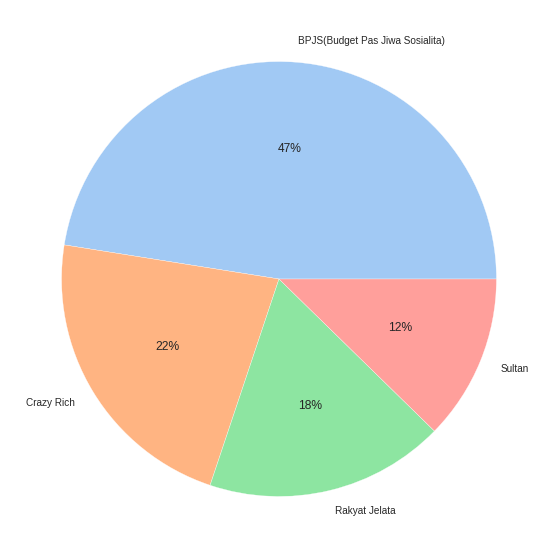

In [ ]:
# Visualizing the customer segments
plt.figure(figsize=(20, 10))
colors = sb.color_palette('pastel')[0:9]
plt.pie(rfm['CustomerSegmentation'].value_counts(),
		labels=rfm['CustomerSegmentation'].value_counts().index,
    colors=colors,
		autopct='%.0f%%')
plt.show()

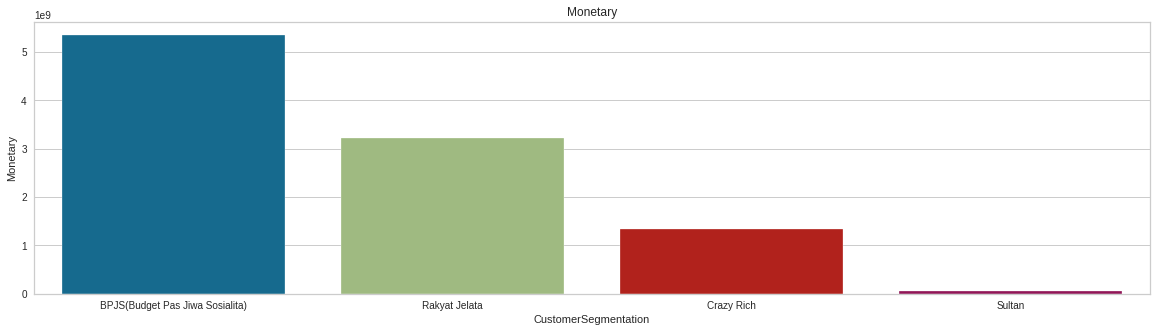

In [ ]:
plt.figure(figsize=(20, 5))
cs1=rfm.groupby(['CustomerSegmentation'])['Monetary'].sum()
cs1=cs1.reset_index()
sb.barplot(x='CustomerSegmentation',
           y='Monetary',
           data=cs1,order=cs1.sort_values('Monetary',ascending = False).CustomerSegmentation)

plt.title("Monetary")
plt.show()

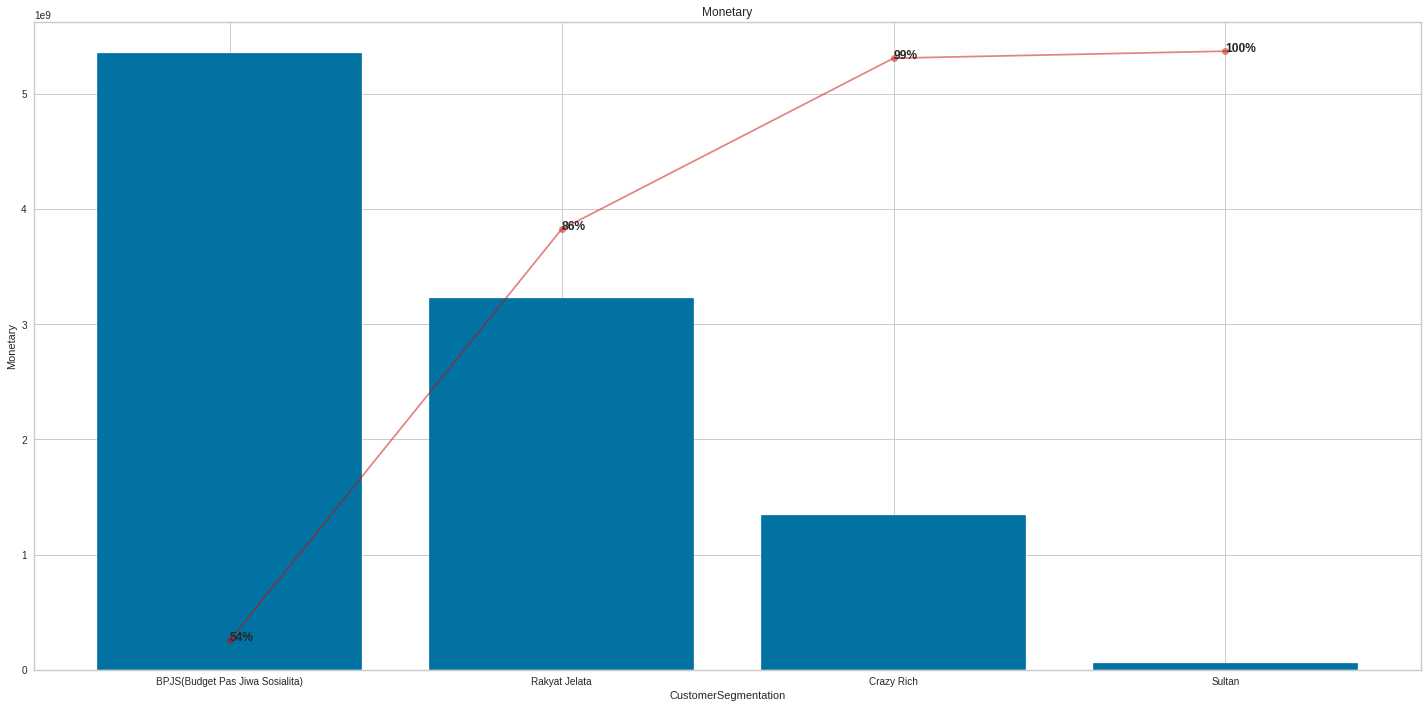

In [ ]:
def pareto_plot(cs1, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    
    xlabel = x
    ylabel = y
    tmp = cs1.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(cs1, x='CustomerSegmentation', y='Monetary', title='Monetary')


#Loss Periods

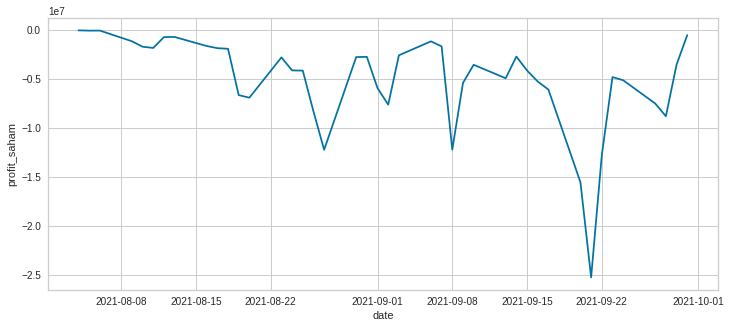

In [ ]:
df11 = pd.pivot_table(merge_1[(merge_1.profit_saham < 0)] , values=['profit_saham'], index=['date'], aggfunc='sum')
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))  
sb.lineplot(x='date',
            y='profit_saham', 
            data=df11);

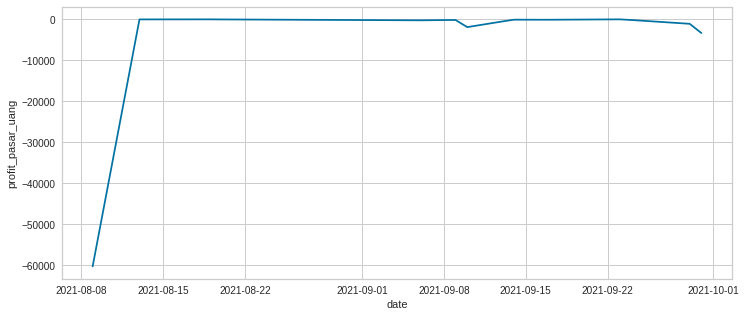

In [ ]:
df12 = pd.pivot_table(merge_1[(merge_1.profit_pasar_uang < 0)] , values=['profit_pasar_uang'], index=['date'], aggfunc='sum')
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))  
sb.lineplot(x='date',
            y='profit_pasar_uang', 
            data=df12);

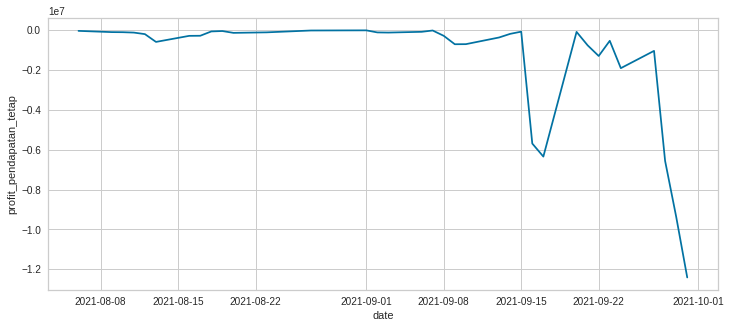

In [ ]:
df13 = pd.pivot_table(merge_1[(merge_1.profit_pendapatan_tetap < 0)] , values=['profit_pendapatan_tetap'], index=['date'], aggfunc='sum')
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))  
sb.lineplot(x='date',
            y='profit_pendapatan_tetap', 
            data=df13);

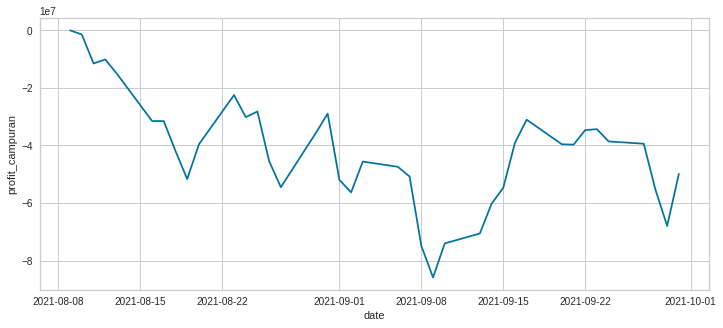

In [ ]:
df14 = pd.pivot_table(merge_1[(merge_1.profit_campuran < 0)] , values=['profit_campuran'], index=['date'], aggfunc='sum')
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))  
sb.lineplot(x='date',
            y='profit_campuran', 
            data=df14);

#Churn Model September 2021

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#outliers had erased

In [ ]:
merge_1.columns

Index(['user_id', 'user_gender', 'user_age', 'user_occupation',
       'user_income_range', 'user_income_source', 'date', 'unique_value',
       'Saham_AUM', 'Saham_transaction_amount', 'Pasar_Uang_AUM',
       'Pasar_Uang_invested_amount', 'Pasar_Uang_transaction_amount',
       'Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_invested_amount',
       'Saham_invested_amount', 'Pendapatan_Tetap_transaction_amount',
       'Campuran_AUM', 'Campuran_invested_amount',
       'Campuran_transaction_amount', 'week', 'month', 'profit_saham',
       'profit_pendapatan_tetap', 'profit_pasar_uang', 'profit_campuran',
       'profit', 'transaction'],
      dtype='object')

In [ ]:
sheet1_url = 'https://docs.google.com/spreadsheets/d/1UzvXHLxx8yNTS3_71fEqT50YSZmm9FH975J-jP9zWVE/edit#gid=289366647'
sheet1_url_trf = sheet1_url.replace('/edit#gid=','/export?format=csv&gid=')
d1 = pd.read_csv(sheet1_url_trf)
d1

user_id  flag_order_bond  bond_units_ordered
0       50701                1                  34
1       50961                1                  99
2       51883                0                   0
3       53759                0                   0
4       54759                1                  92
...       ...              ...                 ...
8479  4173878                0                   0
8480  4174045                0                   0
8481  4174169                0                   0
8482  4174486                0                   0
8483  4174772                0                   0

[8484 rows x 3 columns]

In [ ]:
# Convert Integer value to string
d1['user_id'] = d1['user_id'].astype(str)

In [ ]:
d1.fillna(0, inplace=True)

In [ ]:
jkse_url='https://docs.google.com/spreadsheets/d/1JXfvDnPOqdj2-BplGdfJtKOZlVcwcz-VcUrnu8H9KTU/edit#gid=103801788'
jkse_trf=jkse_url.replace('/edit#gid=', '/export?format=csv&gid=')
jkse=pd.read_csv(jkse_trf)

jkse['date'] = pd.to_datetime(jkse['date'])


jkse

date     Open     High      Low    Close  Adj_Close     Volume
0  2021-08-02  6098.01  6112.83  6048.10  6096.54    6096.54  216299000
1  2021-08-03  6108.00  6142.52  6105.11  6130.57    6130.57  226801300
2  2021-08-04  6142.48  6163.81  6112.72  6159.04    6159.04  271201100
3  2021-08-05  6174.61  6218.65  6173.57  6205.42    6205.42  268332500
4  2021-08-06  6223.83  6263.54  6190.86  6203.43    6203.43  245459900
..        ...      ...      ...      ...      ...        ...        ...
57 2021-10-25  6626.37  6673.52  6625.70  6625.70    6625.70  175632400
58 2021-10-26  6640.05  6680.12  6638.03  6656.94    6656.94  180194900
59 2021-10-27  6664.37  6670.81  6590.50  6602.21    6602.21  182503600
60 2021-10-28  6578.58  6600.25  6509.88  6524.08    6524.08  189347200
61 2021-10-29  6561.71  6596.77  6551.54  6591.35    6591.35  171512200

[62 rows x 7 columns]

#month 9

In [ ]:
df=merge_1.merge(jkse, how = 'inner', on='date')
df_new=df.merge(d1, how = 'inner', on='user_id')
df_new = df_new[df_new['month'] == 9] 

In [ ]:
df_new

user_id user_gender  user_age user_occupation  \
10      3816789      Female        53             IRT   
11      3816789      Female        53             IRT   
12      3816789      Female        53             IRT   
13      3816789      Female        53             IRT   
14      3816789      Female        53             IRT   
...         ...         ...       ...             ...   
156341  4104902        Male        48          Swasta   
156342  4143822        Male        49          Swasta   
156343  4126643      Female        49             IRT   
156344  4117819      Female        49          Swasta   
156345  3973310        Male        49             PNS   

               user_income_range  user_income_source       date  \
10       > Rp 50 Juta - 100 Juta                Gaji 2021-09-01   
11       > Rp 50 Juta - 100 Juta                Gaji 2021-09-02   
12       > Rp 50 Juta - 100 Juta                Gaji 2021-09-03   
13       > Rp 50 Juta - 100 Juta                Gaji 2021-09-06   
14       > Rp 50 Juta - 100 Juta                Gaji 2021-09-07   
...                          ...                 ...        ...   
156341                 < 10 Juta   Keuntungan Bisnis 2021-09-30   
156342      Rp 10 Juta - 50 Juta                Gaji 2021-09-30   
156343      Rp 10 Juta - 50 Juta  Dari Suami / istri 2021-09-30   
156344   > Rp 50 Juta - 100 Juta                Gaji 2021-09-30   
156345  > Rp 100 Juta - 500 Juta                Gaji 2021-09-30   

              unique_value  Saham_AUM  Saham_transaction_amount  \
10      3816789 01-09-2021   185205.0                       0.0   
11      3816789 02-09-2021   183977.0                       0.0   
12      3816789 03-09-2021   186481.0                       0.0   
13      3816789 06-09-2021   189985.0                       0.0   
14      3816789 07-09-2021   189241.0                       0.0   
...                    ...        ...                       ...   
156341  4104902 30-09-2021   134351.0                       0.0   
156342  4143822 30-09-2021    41625.0                       0.0   
156343  4126643 30-09-2021    93656.0                       0.0   
156344  4117819 30-09-2021   247518.0                       0.0   
156345  3973310 30-09-2021        0.0                       0.0   

        Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
10             40095.0                     40000.0   
11             40101.0                     40000.0   
12             40107.0                     40000.0   
13             40120.0                     40000.0   
14             40126.0                     40000.0   
...                ...                         ...   
156341             0.0                         0.0   
156342         10001.0                     10000.0   
156343         19994.0                     20000.0   
156344         40006.0                     40000.0   
156345       1000395.0                   1000000.0   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
10                                0.0              271605.0   
11                                0.0              271378.0   
12                                0.0              271402.0   
13                                0.0              271520.0   
14                                0.0              271663.0   
...                               ...                   ...   
156341                            0.0               69910.0   
156342                            0.0               49936.0   
156343                            0.0               89884.0   
156344                            0.0              219353.0   
156345                            0.0                   0.0   

        Pendapatan_Tetap_invested_amount  Saham_invested_amount  \
10                              270000.0               190000.0   
11                              270000.0               190000.0   
12                              270000.0               190000.0   
13                              270000.

In [ ]:
df_new=df_new.drop(['Open','Close','High','Low'], axis=1)
df_new.fillna(0, inplace=True)

df_new.round(2)


user_id user_gender  user_age user_occupation  \
10      3816789      Female        53             IRT   
11      3816789      Female        53             IRT   
12      3816789      Female        53             IRT   
13      3816789      Female        53             IRT   
14      3816789      Female        53             IRT   
...         ...         ...       ...             ...   
156341  4104902        Male        48          Swasta   
156342  4143822        Male        49          Swasta   
156343  4126643      Female        49             IRT   
156344  4117819      Female        49          Swasta   
156345  3973310        Male        49             PNS   

               user_income_range  user_income_source       date  \
10       > Rp 50 Juta - 100 Juta                Gaji 2021-09-01   
11       > Rp 50 Juta - 100 Juta                Gaji 2021-09-02   
12       > Rp 50 Juta - 100 Juta                Gaji 2021-09-03   
13       > Rp 50 Juta - 100 Juta                Gaji 2021-09-06   
14       > Rp 50 Juta - 100 Juta                Gaji 2021-09-07   
...                          ...                 ...        ...   
156341                 < 10 Juta   Keuntungan Bisnis 2021-09-30   
156342      Rp 10 Juta - 50 Juta                Gaji 2021-09-30   
156343      Rp 10 Juta - 50 Juta  Dari Suami / istri 2021-09-30   
156344   > Rp 50 Juta - 100 Juta                Gaji 2021-09-30   
156345  > Rp 100 Juta - 500 Juta                Gaji 2021-09-30   

              unique_value  Saham_AUM  Saham_transaction_amount  \
10      3816789 01-09-2021   185205.0                       0.0   
11      3816789 02-09-2021   183977.0                       0.0   
12      3816789 03-09-2021   186481.0                       0.0   
13      3816789 06-09-2021   189985.0                       0.0   
14      3816789 07-09-2021   189241.0                       0.0   
...                    ...        ...                       ...   
156341  4104902 30-09-2021   134351.0                       0.0   
156342  4143822 30-09-2021    41625.0                       0.0   
156343  4126643 30-09-2021    93656.0                       0.0   
156344  4117819 30-09-2021   247518.0                       0.0   
156345  3973310 30-09-2021        0.0                       0.0   

        Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
10             40095.0                     40000.0   
11             40101.0                     40000.0   
12             40107.0                     40000.0   
13             40120.0                     40000.0   
14             40126.0                     40000.0   
...                ...                         ...   
156341             0.0                         0.0   
156342         10001.0                     10000.0   
156343         19994.0                     20000.0   
156344         40006.0                     40000.0   
156345       1000395.0                   1000000.0   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
10                                0.0              271605.0   
11                                0.0              271378.0   
12                                0.0              271402.0   
13                                0.0              271520.0   
14                                0.0              271663.0   
...                               ...                   ...   
156341                            0.0               69910.0   
156342                            0.0               49936.0   
156343                            0.0               89884.0   
156344                            0.0              219353.0   
156345                            0.0                   0.0   

        Pendapatan_Tetap_invested_amount  Saham_invested_amount  \
10                              270000.0               190000.0   
11                              270000.0               190000.0   
12                              270000.0               190000.0   
13                              270000.

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127766 entries, 10 to 156345
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              127766 non-null  object        
 1   user_gender                          127766 non-null  object        
 2   user_age                             127766 non-null  int64         
 3   user_occupation                      127766 non-null  object        
 4   user_income_range                    127766 non-null  object        
 5   user_income_source                   127766 non-null  object        
 6   date                                 127766 non-null  datetime64[ns]
 7   unique_value                         127766 non-null  object        
 8   Saham_AUM                            127766 non-null  float64       
 9   Saham_transaction_amount             127766 non-null  float64       


                 user_id
flag_order_bond         
0                   4809
1                   3468


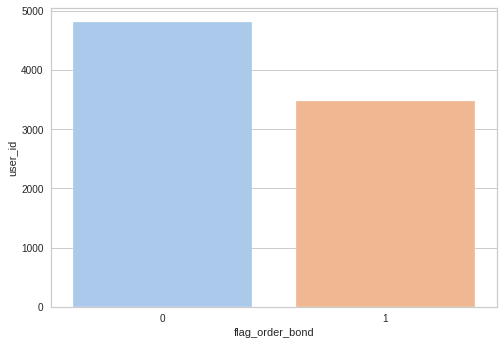

In [ ]:
grouped = df_new.groupby('flag_order_bond').agg('nunique')['user_id']
grouped = pd.DataFrame(grouped)
print(grouped)
# grouped
sns.barplot(x=grouped.index, y='user_id', data=grouped, palette='pastel')

In [ ]:
numerical_column = ['user_age','Saham_AUM','Saham_transaction_amount','Saham_invested_amount','Campuran_AUM','Campuran_transaction_amount','Campuran_invested_amount','Pasar_Uang_AUM','Pasar_Uang_transaction_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_AUM','Pendapatan_Tetap_transaction_amount','Pendapatan_Tetap_invested_amount']
binary_categorical_column=['user_gender']
polytomous_categorical_column = ['user_occupation','user_income_range','user_income_source']
all_categorical_column = binary_categorical_column+polytomous_categorical_column

In [ ]:
# Dummy variable 
df_new =pd.get_dummies(data=df_new,columns=['user_occupation','user_income_range','user_income_source','user_gender'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127766 entries, 10 to 156345
Data columns (total 55 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   user_id                                     127766 non-null  object        
 1   user_age                                    127766 non-null  int64         
 2   date                                        127766 non-null  datetime64[ns]
 3   unique_value                                127766 non-null  object        
 4   Saham_AUM                                   127766 non-null  float64       
 5   Saham_transaction_amount                    127766 non-null  float64       
 6   Pasar_Uang_AUM                              127766 non-null  float64       
 7   Pasar_Uang_invested_amount                  127766 non-null  float64       
 8   Pasar_Uang_transaction_amount               127766 non-null  float64     

In [ ]:
# Ambil semua kolom yang tipenya sudah numerik
corr_column = df_new.select_dtypes(include=[np.number]).columns.to_list()
corr_column = list(set(corr_column) - set(['flag_order_bond']))
corr_column

['user_income_source_Tabungan',
 'month',
 'user_income_source_Dari Suami / istri',
 'user_income_source_Dari Orang Tua / Anak',
 'user_gender_Male',
 'Saham_invested_amount',
 'Pendapatan_Tetap_AUM',
 'profit',
 'user_age',
 'week',
 'profit_pasar_uang',
 'Pasar_Uang_AUM',
 'profit_campuran',
 'Pasar_Uang_invested_amount',
 'user_income_range_< 10 Juta',
 'Saham_AUM',
 'user_occupation_Pengusaha',
 'user_income_source_Bunga Simpanan',
 'user_occupation_IRT',
 'profit_pendapatan_tetap',
 'user_occupation_Swasta',
 'user_income_source_Undian',
 'user_occupation_Pelajar',
 'Pendapatan_Tetap_invested_amount',
 'Campuran_invested_amount',
 'user_occupation_TNI/Polisi',
 'user_occupation_Guru',
 'user_gender_Female',
 'Pendapatan_Tetap_transaction_amount',
 'user_income_range_> Rp 1 Miliar',
 'Saham_transaction_amount',
 'Volume',
 'user_income_source_Lainnya',
 'user_occupation_PNS',
 'user_occupation_Pensiunan',
 'transaction',
 'Pasar_Uang_transaction_amount',
 'profit_saham',
 'user_occ

In [ ]:
len(corr_column)

51

In [ ]:
df_new[corr_column]

user_income_source_Tabungan  month  \
10                                0      9   
11                                0      9   
12                                0      9   
13                                0      9   
14                                0      9   
...                             ...    ...   
156341                            0      9   
156342                            0      9   
156343                            0      9   
156344                            0      9   
156345                            0      9   

        user_income_source_Dari Suami / istri  \
10                                          0   
11                                          0   
12                                          0   
13                                          0   
14                                          0   
...                                       ...   
156341                                      0   
156342                                      0   
156343                                      1   
156344                                      0   
156345                                      0   

        user_income_source_Dari Orang Tua / Anak  user_gender_Male  \
10                                             0                 0   
11                                             0                 0   
12                                             0                 0   
13                                             0                 0   
14                                             0                 0   
...                                          ...               ...   
156341                                         0                 1   
156342                                         0                 1   
156343                                         0                 0   
156344                                         0                 0   
156345                                         0                 1   

        Saham_invested_amount  Pendapatan_Tetap_AUM  profit  user_age  week  \
10                   190000.0              271605.0 -3095.0        53    35   
11                   190000.0              271378.0 -4544.0        53    35   
12                   190000.0              271402.0 -2010.0        53    35   
13                   190000.0              271520.0  1625.0        53    36   
14                   190000.0              271663.0  1030.0        53    36   
...                       ...                   ...     ...       ...   ...   
156341               130000.0               69910.0  4261.0        48    39   
156342                40000.0               49936.0  1562.0        49    39   
156343                90000.0               89884.0  3534.0        49    39   
156344               240000.0              219353.0  6877.0        49    39   
156345                    0.0                   0.0   395.0        49    39   

        profit_pasar_uang  Pasar_Uang_AUM  profit_campuran  \
10                   95.0         40095.0              0.0   
11                  101.0         40101.0              0.0   
12                  107.0         40107.0              0.0   
13                  120.0         40120.0              0.0   
14                  126.0         40126.0              0.0   
...                   ...             ...              ...   
156341                0.0             0.0              0.0   
156342                1.0         10001.0              0.0   
156343               -6.0         19994.0              0.0   
156344                6.0         40006.0              0.0   
156345              395.0       1000395.0              0.0   

        Pasar_Uang_invested_amount  user_income_range_< 10 Juta  Saham_AUM  \
10                         40000.0                            0   185205.0   
11                         40000.0                            0   183977.0   
12                         40000.0                            0   186481.0   
13                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


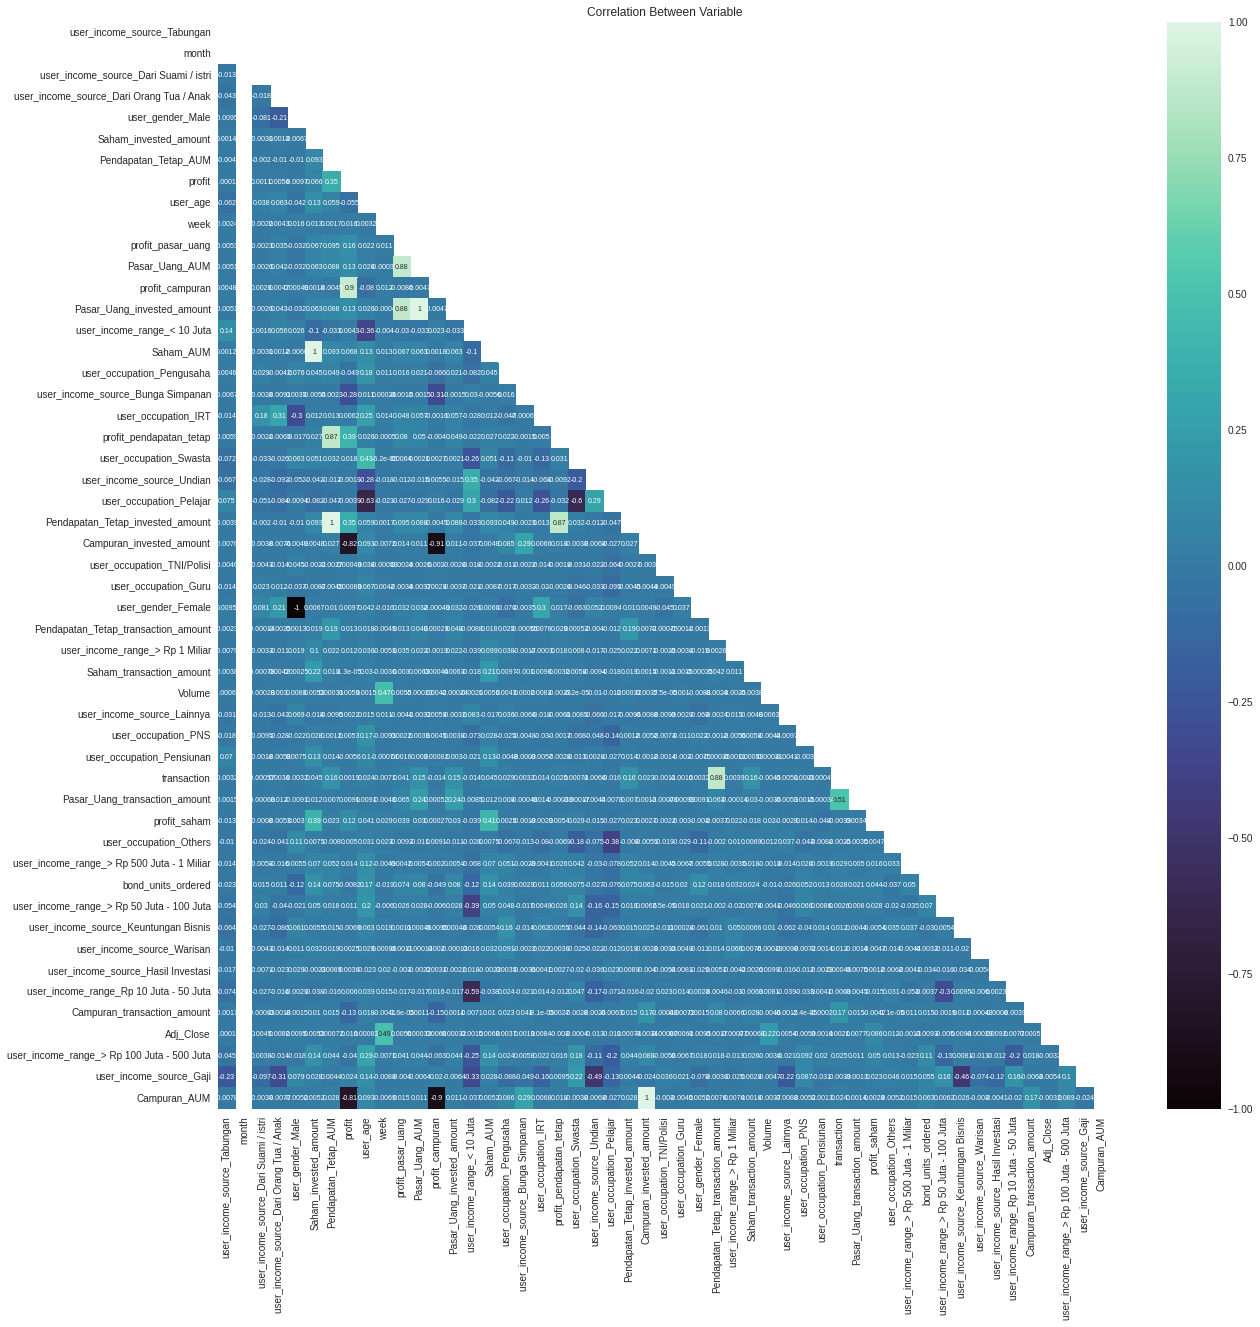

In [ ]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    df_new[corr_column].corr(), dtype=np.bool))

sns.heatmap(df_new[corr_column].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":7})

plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = df_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7, and add into to_drop list
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


['Pasar_Uang_invested_amount',
 'Pendapatan_Tetap_invested_amount',
 'Saham_invested_amount',
 'Campuran_invested_amount',
 'profit_pendapatan_tetap',
 'profit_pasar_uang',
 'profit_campuran',
 'profit',
 'transaction',
 'bond_units_ordered',
 'user_gender_Male']

In [ ]:
to_keep = list(set(corr_column) - set(to_drop))
to_keep

['user_income_source_Tabungan',
 'month',
 'user_income_source_Dari Suami / istri',
 'user_income_source_Dari Orang Tua / Anak',
 'Pendapatan_Tetap_AUM',
 'user_age',
 'week',
 'Pasar_Uang_AUM',
 'user_income_range_< 10 Juta',
 'Saham_AUM',
 'user_occupation_Pengusaha',
 'user_income_source_Bunga Simpanan',
 'user_occupation_IRT',
 'user_occupation_Swasta',
 'user_income_source_Undian',
 'user_occupation_Pelajar',
 'user_occupation_TNI/Polisi',
 'user_occupation_Guru',
 'user_gender_Female',
 'Pendapatan_Tetap_transaction_amount',
 'user_income_range_> Rp 1 Miliar',
 'Saham_transaction_amount',
 'Volume',
 'user_income_source_Lainnya',
 'user_occupation_PNS',
 'user_occupation_Pensiunan',
 'Pasar_Uang_transaction_amount',
 'profit_saham',
 'user_occupation_Others',
 'user_income_range_> Rp 500 Juta - 1 Miliar',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'user_income_source_Keuntungan Bisnis',
 'user_income_source_Warisan',
 'user_income_source_Hasil Investasi',
 'user_income_range_

In [ ]:
len(to_keep)

40

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


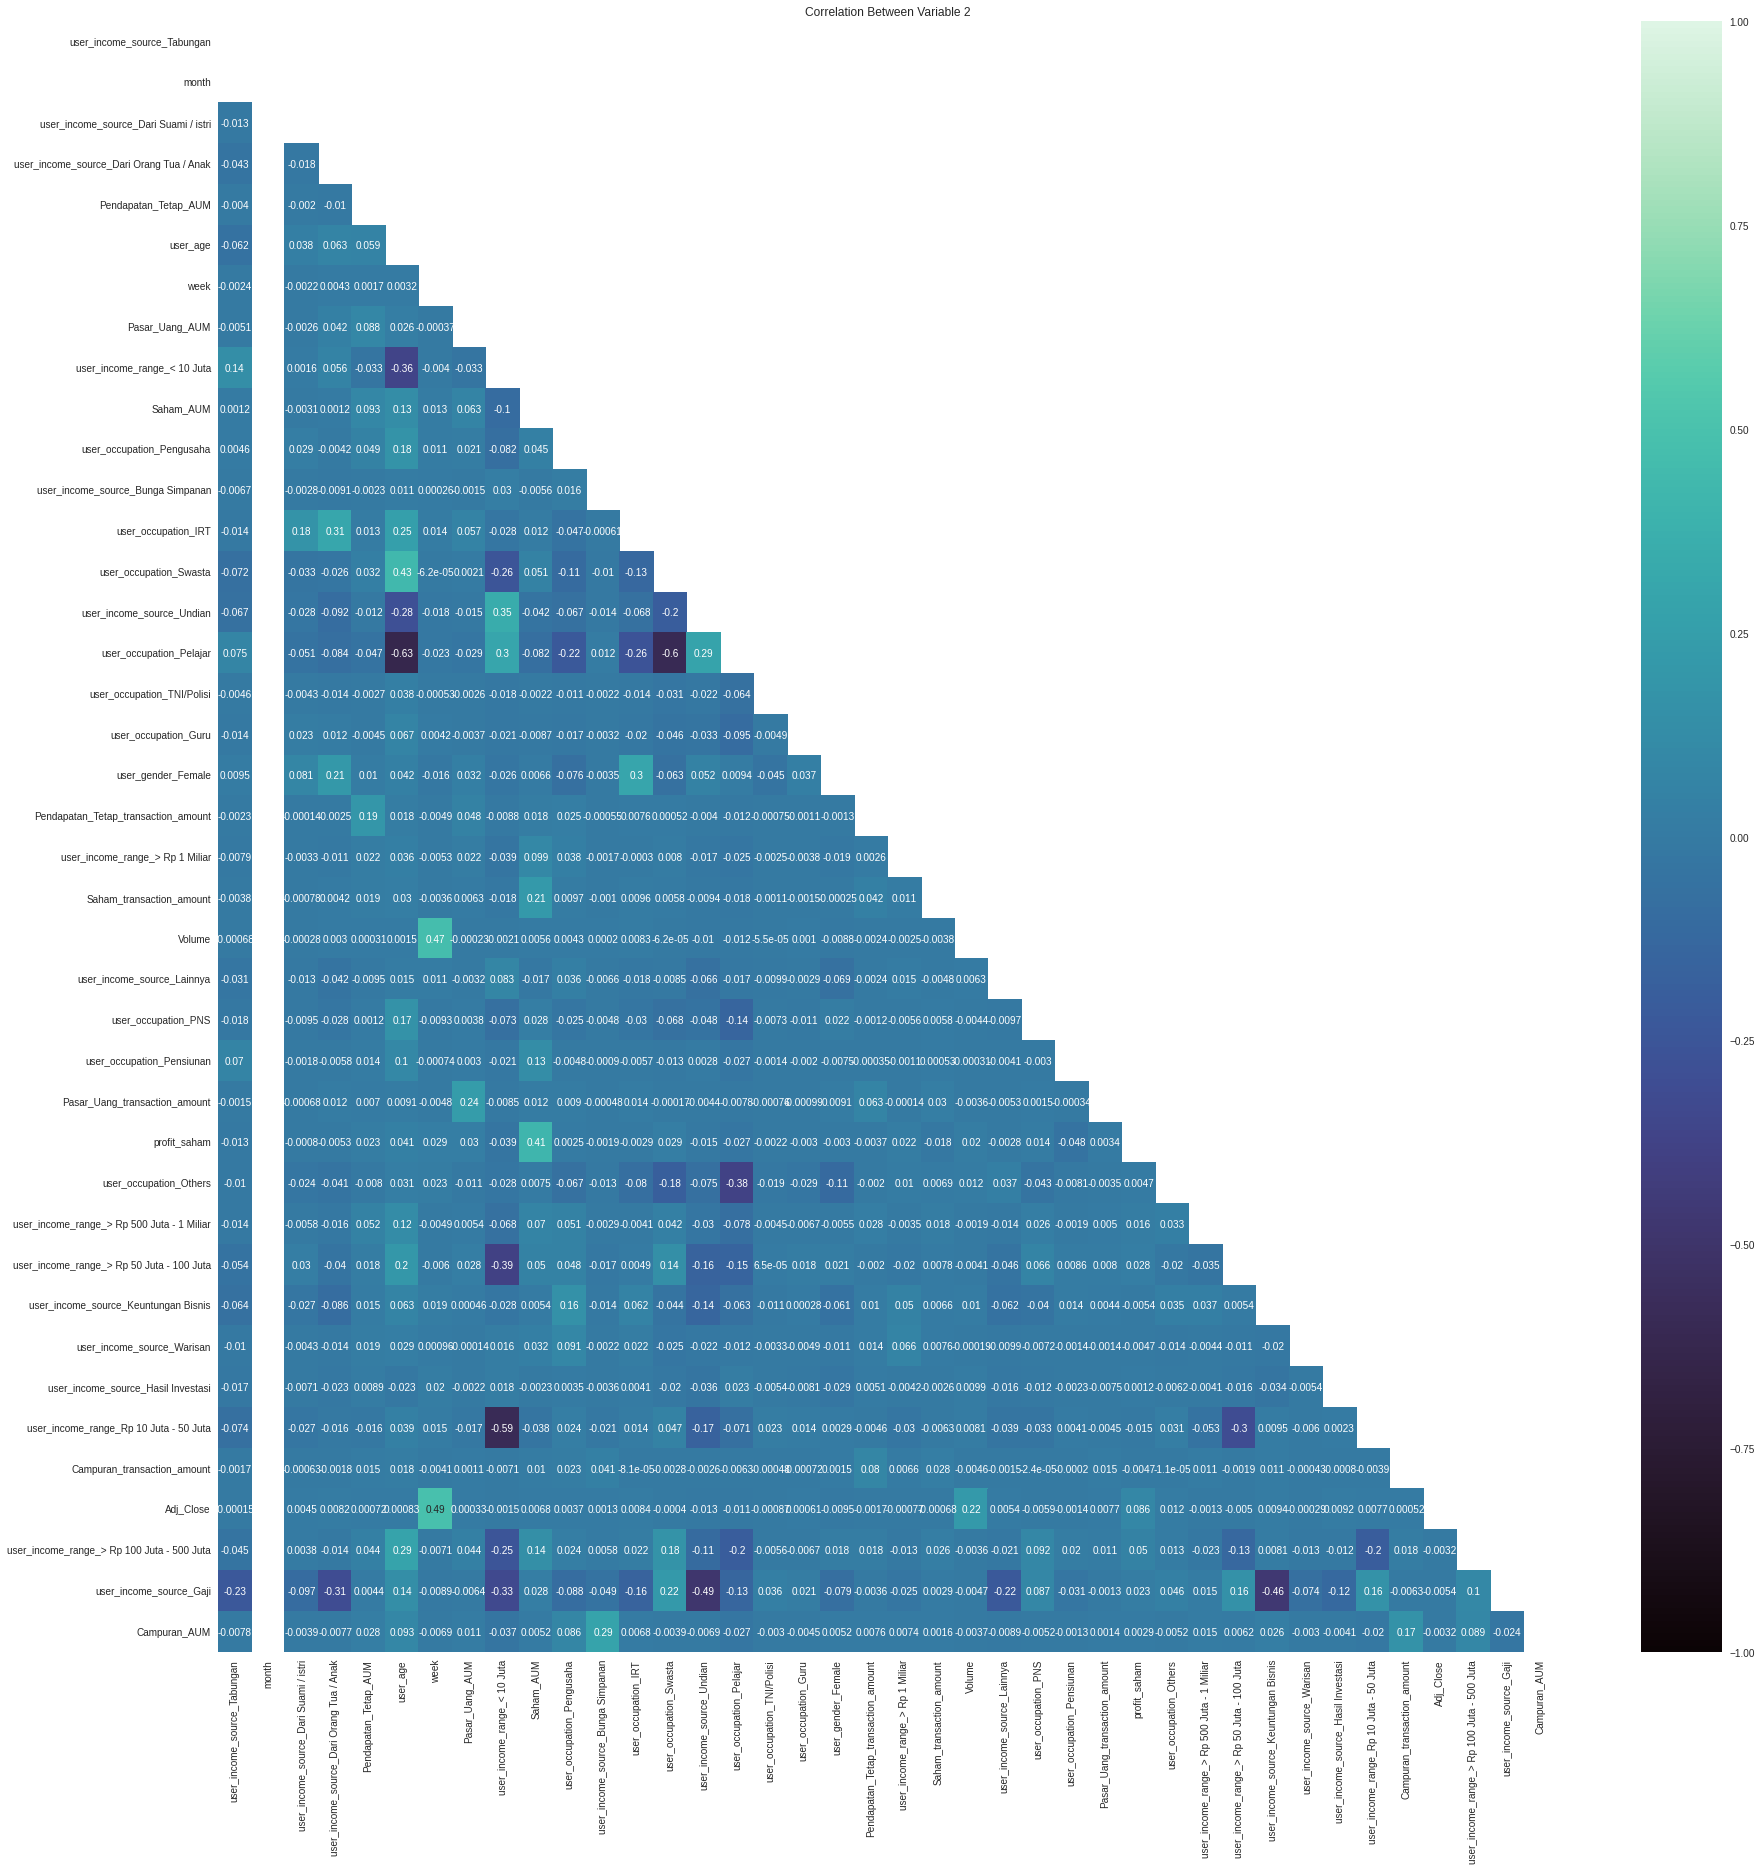

In [ ]:
corr_column_new = to_keep

fig = plt.figure(figsize=(30,30))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable 2')

mask = np.triu(np.ones_like(
    df_new[corr_column_new].corr(), dtype=np.bool))
sns.heatmap(df_new[corr_column_new].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

# **Logistic Regression**

In [ ]:
# Separate flag_order_bond from other variables
to_keep_vars = list(set(to_keep) - set(['flag_order_bond']))
to_keep_vars

['user_income_source_Tabungan',
 'month',
 'user_income_source_Dari Suami / istri',
 'user_income_source_Dari Orang Tua / Anak',
 'Pendapatan_Tetap_AUM',
 'user_age',
 'week',
 'Pasar_Uang_AUM',
 'user_income_range_< 10 Juta',
 'Saham_AUM',
 'user_occupation_Pengusaha',
 'user_income_source_Bunga Simpanan',
 'user_occupation_IRT',
 'user_occupation_Swasta',
 'user_income_source_Undian',
 'user_occupation_Pelajar',
 'user_occupation_TNI/Polisi',
 'user_occupation_Guru',
 'user_gender_Female',
 'Pendapatan_Tetap_transaction_amount',
 'user_income_range_> Rp 1 Miliar',
 'Saham_transaction_amount',
 'Volume',
 'user_income_source_Lainnya',
 'user_occupation_PNS',
 'user_occupation_Pensiunan',
 'Pasar_Uang_transaction_amount',
 'profit_saham',
 'user_occupation_Others',
 'user_income_range_> Rp 500 Juta - 1 Miliar',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'user_income_source_Keuntungan Bisnis',
 'user_income_source_Warisan',
 'user_income_source_Hasil Investasi',
 'user_income_range_

In [ ]:
from sklearn.model_selection import train_test_split

# Define the whole data
x = df_new[to_keep_vars]
y = df_new[['flag_order_bond']]

# Split into training and test dataset
x_training, x_test, y_training, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
# Check split result
for d1 in [x_training, x_test, y_training, y_test]:
  print(d1.shape)

(102212, 40)
(25554, 40)
(102212, 1)
(25554, 1)


In [ ]:
125076/(125076+31270)

0.7999948831437964

In [ ]:
# Check class balance in each datasets
for d1 in [y_training,y_test]:
  df2 = d1.value_counts()
  print(df2)

flag_order_bond
0                  59165
1                  43047
dtype: int64
flag_order_bond
0                  14775
1                  10779
dtype: int64


In [ ]:
# class_weight='balanced' untuk memastikan hasil logistic regression-nya tidak condong untuk memprediksi No sebanyak-banyaknya
# max_iter=500 untuk memastikan hasil paling bagus/hasilnya "convergent". Kalau misal ketemu error convergent, naikkan max_iter-nya dr 100 (default) ke 500.
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(x_training, y_training)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=500)

#confusion matrix

In [ ]:
# confusion_matrix(flag_order_bond actual, flag_order_bond prediksi)
confusion_matrix(y_training, model.predict(x_training))

array([[53345,  5820],
       [29982, 13065]])

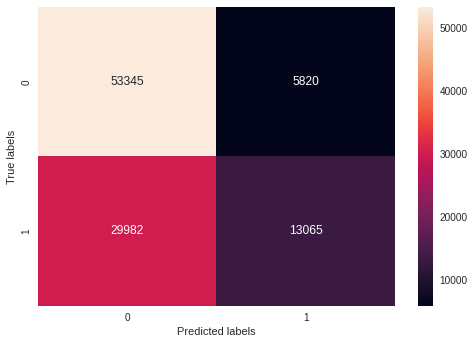

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_training, model.predict(x_training)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_training, model.predict(x_training), target_names=['Not flag_order_bond','flag_order_bond']))

                     precision    recall  f1-score   support

Not flag_order_bond       0.64      0.90      0.75     59165
    flag_order_bond       0.69      0.30      0.42     43047

           accuracy                           0.65    102212
          macro avg       0.67      0.60      0.59    102212
       weighted avg       0.66      0.65      0.61    102212



# Check performance on the test set






In [ ]:
model.score(x_test, y_test)

0.6490568991155984

In [ ]:
confusion_matrix(y_test, model.predict(x_test))

array([[13260,  1515],
       [ 7453,  3326]])

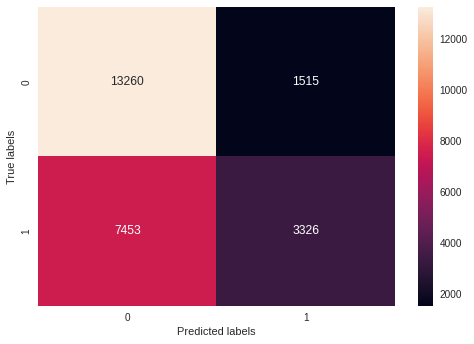

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [ ]:
print(classification_report(y_test, model.predict(x_test), target_names=['Not flag_order_bond','flag_order_bond']))

                     precision    recall  f1-score   support

Not flag_order_bond       0.64      0.90      0.75     14775
    flag_order_bond       0.69      0.31      0.43     10779

           accuracy                           0.65     25554
          macro avg       0.66      0.60      0.59     25554
       weighted avg       0.66      0.65      0.61     25554



# Benefit-Cost Analysis


In [ ]:
df_new

user_id  user_age       date        unique_value  Saham_AUM  \
10      3816789        53 2021-09-01  3816789 01-09-2021   185205.0   
11      3816789        53 2021-09-02  3816789 02-09-2021   183977.0   
12      3816789        53 2021-09-03  3816789 03-09-2021   186481.0   
13      3816789        53 2021-09-06  3816789 06-09-2021   189985.0   
14      3816789        53 2021-09-07  3816789 07-09-2021   189241.0   
...         ...       ...        ...                 ...        ...   
156341  4104902        48 2021-09-30  4104902 30-09-2021   134351.0   
156342  4143822        49 2021-09-30  4143822 30-09-2021    41625.0   
156343  4126643        49 2021-09-30  4126643 30-09-2021    93656.0   
156344  4117819        49 2021-09-30  4117819 30-09-2021   247518.0   
156345  3973310        49 2021-09-30  3973310 30-09-2021        0.0   

        Saham_transaction_amount  Pasar_Uang_AUM  Pasar_Uang_invested_amount  \
10                           0.0         40095.0                     40000.0   
11                           0.0         40101.0                     40000.0   
12                           0.0         40107.0                     40000.0   
13                           0.0         40120.0                     40000.0   
14                           0.0         40126.0                     40000.0   
...                          ...             ...                         ...   
156341                       0.0             0.0                         0.0   
156342                       0.0         10001.0                     10000.0   
156343                       0.0         19994.0                     20000.0   
156344                       0.0         40006.0                     40000.0   
156345                       0.0       1000395.0                   1000000.0   

        Pasar_Uang_transaction_amount  Pendapatan_Tetap_AUM  \
10                                0.0              271605.0   
11                                0.0              271378.0   
12                                0.0              271402.0   
13                                0.0              271520.0   
14                                0.0              271663.0   
...                               ...                   ...   
156341                            0.0               69910.0   
156342                            0.0               49936.0   
156343                            0.0               89884.0   
156344                            0.0              219353.0   
156345                            0.0                   0.0   

        Pendapatan_Tetap_invested_amount  Saham_invested_amount  \
10                              270000.0               190000.0   
11                              270000.0               190000.0   
12                              270000.0               190000.0   
13                              270000.0               190000.0   
14                              270000.0               190000.0   
...                                  ...                    ...   
156341                           70000.0               130000.0   
156342                           50000.0                40000.0   
156343                           90000.0                90000.0   
156344                          220000.0               240000.0   
156345                               0.0                    0.0   

        Pendapatan_Tetap_transaction_amount  Campuran_AUM  \
10                                      0.0           0.0   
11                                      0.0           0.0   
12                                      0.0           0.0   
13                                      0.0           0.0   
14                                      0.0           0.0   
...                                     ...           ...   
156341                                  0.0           0.0   
156342                                  0.0           0.0   
156343                                  0.0           0.0   
156344                

In [ ]:
y

flag_order_bond
10                    0
11                    0
12                    0
13                    0
14                    0
...                 ...
156341                1
156342                0
156343                1
156344                1
156345                1

[127766 rows x 1 columns]

In [ ]:
predicted_prob = model.predict_proba(x)
predicted_prob = pd.DataFrame(predicted_prob[:,1], columns = ['predicted_score'])
predicted_prob

predicted_score
0              0.479902
1              0.483710
2              0.486000
3              0.485712
4              0.483883
...                 ...
127761         0.462675
127762         0.453946
127763         0.460941
127764         0.481543
127765         0.510795

[127766 rows x 1 columns]

In [ ]:
# Get 30% threshold
pct30_threshold = predicted_prob['predicted_score'].quantile(0.7) 

# Get top 30% customers
pct30_customer = predicted_prob[predicted_prob['predicted_score'] > pct30_threshold]

# Merge with actual flag_order_bond outcome 
pct30_customer = pct30_customer.merge(y, left_index = True, right_index = True)
pct30_customer

predicted_score  flag_order_bond
10             0.481941                0
11             0.483794                0
12             0.481748                0
13             0.494031                0
14             0.493434                0
...                 ...              ...
127737         0.706354                1
127743         0.791355                1
127760         0.479086                1
127764         0.481543                1
127765         0.510795                1

[28680 rows x 2 columns]

In [ ]:
pct30_customer['flag_order_bond'].value_counts()

0    16551
1    12129
Name: flag_order_bond, dtype: int64